## Velocity, Acceleration, Jerk and Snap? 
#### _Predicting Hidden Signals of Market Change from Higher Order Motion Derivatives in Physics: Using Optimized Multivariate-Multi Step MLPs, LSTMs and CNNs to Predict Goggle Trends Online Interestingness Score_
Brian Griner

### Introduction
This is a collaborative work in progress to explore how concepts in the physical world like velocity, jerk and other higher order derivatives of motion used in physics might help us identify early signals of  marketplace activity that are eventually revealed in patterns of change in the interestingness metric at different periods.
### Data
Interestingness metric measured monthly from the end of 2009 to mid 2019.
### Methodology
*   **MODELS:** Multivariate multi step sequence models (specifically Multi Layer Perceptrons, Long Short Term Memory networks and Convolutional Neural Networks) are developed on training and validation samples. 
*   **TUNING:** Model hyper parameters are optimized using a full factorial experimental design with 2 to 3 levels for each hyper parameter.  
Callbacks  are used for early stopping of training when the mean squared error of the validation sample does not improve over a specified number of training epochs. The _patience_ of the early stopping callback (number of completed epoches before training is terminated) is also tested as a hyper parameter in the experimental design. Additional tuning methods tested include: input and reccurrent dropout, weight and kernel regularization.
*   **TESTING:** Model performance is tested using the Test sample after hyper parameter tuning.  The best model from the tuning phase is used to predict the last 12 months of the Interesting metric. Several performance metrics are calculated on the Mean Squared Error of the difference between the predicted and actual prices in the Test sample. (TOM TO ADD DETAILS ON METRICS HERE) 
### Results
This is part of a larger study of which this analysis is only one part. To be continued...
### Insights & Discussion
TBD


**1. Load data from local device using colab import files upload method**

In [0]:
# import colab files method and upload data
from google.colab import files
files.upload()

Saving Data.txt to Data.txt


{'Data.txt': b'DATE\tDEPENDENT VARIABLE\tFIRST\tSECOND\tTHIRD\tFOURTH\r\n2009-11\t25\t2.25\t2.15\t2.14\t1.76\r\n2009-12\t22\t1.92\t1.72\t1.62\t1.53\r\n2010-01\t23\t2.01\t2.05\t2.29\t2.63\r\n2010-02\t29\t2.22\t2.21\t2.16\t1.86\r\n2010-03\t53\t2.76\t2.68\t2.63\t2.63\r\n2010-04\t65\t2.80\t2.63\t2.54\t2.50\r\n2010-05\t63\t2.71\t2.66\t2.78\t2.99\r\n2010-06\t57\t2.62\t2.63\t2.69\t2.63\r\n2010-07\t53\t2.57\t2.60\t2.61\t2.57\r\n2010-08\t52\t2.57\t2.59\t2.58\t2.56\r\n2010-09\t48\t2.50\t2.50\t2.49\t2.48\r\n2010-10\t46\t2.48\t2.50\t2.51\t2.54\r\n2010-11\t42\t2.40\t2.41\t2.40\t2.37\r\n2010-12\t41\t2.40\t2.42\t2.43\t2.45\r\n2011-01\t45\t2.49\t2.50\t2.48\t2.45\r\n2011-02\t100\t3.27\t3.24\t3.21\t3.20\r\n2011-03\t65\t2.65\t2.46\t2.29\t2.16\r\n2011-04\t42\t2.31\t2.41\t2.70\t3.15\r\n2011-05\t46\t2.51\t2.62\t2.63\t2.36\r\n2011-06\t50\t2.57\t2.55\t2.41\t2.26\r\n2011-07\t40\t2.32\t2.30\t2.31\t2.44\r\n2011-08\t39\t2.36\t2.42\t2.50\t2.58\r\n2011-09\t29\t2.07\t2.08\t2.02\t1.89\r\n2011-10\t29\t2.15\t2.24\t2.31

### Check TF version and install 2.0 if needed

In [0]:
# install TF 2.0
!pip install -q tensorflow==2.0.0-rc1

from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
# check tf version
print(tf.__version__)

     |████████████████████████████████| 86.3MB 41kB/s 
     |████████████████████████████████| 501kB 45.3MB/s 
     |████████████████████████████████| 4.3MB 33.6MB/s 
2.0.0-rc1


## **Read Interestingness Dataset**

Index(['DATE', 'DEPENDENT VARIABLE', 'FIRST', 'SECOND', 'THIRD', 'FOURTH'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, 2009-11 to 2019-06
Data columns (total 6 columns):
DATE                  116 non-null object
DEPENDENT VARIABLE    116 non-null int64
FIRST                 116 non-null float64
SECOND                116 non-null float64
THIRD                 116 non-null float64
FOURTH                116 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 6.3+ KB
None
N size: 116
            DATE  DEPENDENT VARIABLE  FIRST  SECOND  THIRD  FOURTH
DATE                                                              
2009-11  2009-11                  25   2.25    2.15   2.14    1.76
2009-12  2009-12                  22   1.92    1.72   1.62    1.53
2010-01  2010-01                  23   2.01    2.05   2.29    2.63
2010-02  2010-02                  29   2.22    2.21   2.16    1.86
2010-03  2010-03                  53   2.76    2.68   2.63    2

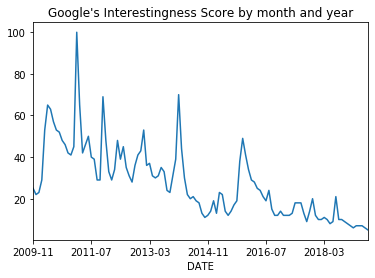

In [0]:
# DATASET - Data.txt 

# import libs
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# set numeric format
pd.options.display.float_format = '{:,.2f}'.format

# create data objects 
iscore = pd.read_csv('Data.txt',sep='\t')  # ,index_col='DATE')  # ,usecols=range(0,10))
pd.to_datetime(iscore['DATE'], format='%Y-%m')

# Set index
iscore.set_index('DATE', inplace=True, drop=False)

# check columns & dtypes
print(iscore.columns)
print(iscore.info())
print(f'N size: {len(iscore)}') 
print(iscore.head())
print(iscore.tail())
print(iscore.describe())

# plot iscore
iscore['DEPENDENT VARIABLE'].plot(title="Google's Interestingness Score by month and year")
plt.show()

Number months: 27


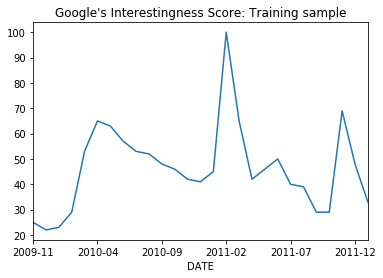

In [0]:
# Subset data around first few peak scores
peak_iscore1b = iscore['2009-11': '2012-01']
# number of months
print(f'Number months: {len(peak_iscore1b)}')
# plot peak periods
peak_iscore1b['DEPENDENT VARIABLE'].plot(title="Google's Interestingness Score: Training sample")

Historical events in February of 2011 include: Nicki Manaj number 1 on Billboard 200, Arab Spring begins, Maya Angelou wins Presidential Metal of Freedom, Kobe Bryant named MVP in NBA All-Star Game where West beats East, Natalie Portman and Colin Firth win Academy Awards for The King's Speech.

[February 2011 - Historical Events On This Day](https://www.onthisday.com/events/date/2011/february)

Historical events in December of 2011 include: Game show host Alex Trebec heart attack, Baseball legend Barry Bonds sentenced to house arrest for drug use, French president Jacque Chirac convicted of diverting public funds.

[December 2011 - Historical Events On This Day](https://www.onthisday.com/events/date/2011/december)

Training + Validation sample: number months: 16
                    count  mean   std   min   25%   50%   75%   max
DEPENDENT VARIABLE  16.00 25.56 10.48 12.00 18.50 24.00 30.25 49.00
FIRST               16.00  2.02  0.31  1.51  1.85  2.01  2.14  2.60
SECOND              16.00  2.02  0.28  1.48  1.82  2.04  2.19  2.52
THIRD               16.00  2.01  0.31  1.37  1.82  2.03  2.18  2.55
FOURTH              16.00  1.99  0.38  1.27  1.81  1.98  2.13  2.75
AxesSubplot(0.125,0.125;0.775x0.755)


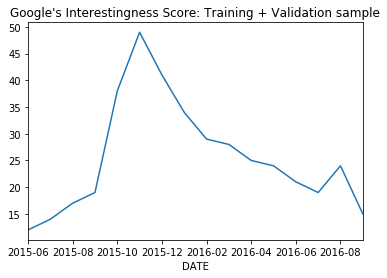

In [0]:
# Subset data around last large peak score
iscore_train_val = iscore['2015-06': '2016-09']
# iscore_val = iscore['2017-11': '2018-06']
# number of months 
print(f'Training + Validation sample: number months: {len(iscore_train_val)}')
# descriptives
print(iscore_train_val.describe().T)
# plot validation sample
print(iscore_train_val['DEPENDENT VARIABLE'].plot(title="Google's Interestingness Score: Training + Validation sample"))

Historical events in December of 2015 include: Trump proposes US muslim ban, Angela Merkel named Time's Person of the Year, Star Wars: The Force Awakens premiere.

[December 2015 - Historical Events On This Day](https://www.onthisday.com/events/date/2015/december)

Training + Validation sample: number months: 104
                    count  mean   std  min   25%   50%   75%    max
DEPENDENT VARIABLE 104.00 30.07 16.88 8.00 16.50 28.50 41.00 100.00
FIRST              104.00  2.08  0.42 1.25  1.83  2.12  2.38   3.27
SECOND             104.00  2.08  0.41 1.26  1.75  2.15  2.40   3.24
THIRD              104.00  2.09  0.42 1.32  1.76  2.12  2.42   3.21
FOURTH             104.00  2.08  0.50 0.82  1.76  2.06  2.45   3.20
AxesSubplot(0.125,0.125;0.775x0.755)


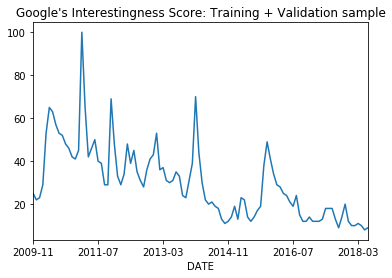

In [0]:
# training + validation sample
iscore_train_val = iscore['2009-11': '2018-06']
# iscore_val = iscore['2017-11': '2018-06']
# number of months 
print(f'Training + Validation sample: number months: {len(iscore_train_val)}')
# descriptives
print(iscore_train_val.describe().T)
# plot validation sample
print(iscore_train_val['DEPENDENT VARIABLE'].plot(title="Google's Interestingness Score: Training + Validation sample"))

Test sample number months: 12
                    count  mean  std  min  25%  50%  75%   max
DEPENDENT VARIABLE  12.00  8.58 4.21 5.00 6.75 7.00 9.25 21.00
FIRST               12.00  1.33 0.32 1.03 1.17 1.28 1.36  2.26
SECOND              12.00  1.34 0.34 0.86 1.17 1.27 1.38  2.20
THIRD               12.00  1.34 0.46 0.59 1.12 1.24 1.41  2.35
FOURTH              12.00  1.34 0.77 0.20 0.99 1.25 1.64  3.23
DescribeResult(nobs=12, minmax=(array([5]), array([21])), mean=array([8.58333333]), variance=array([17.71969697]), skewness=array([2.32127308]), kurtosis=array([4.59837932]))
DescribeResult(nobs=12, minmax=(array([1.03, 0.86, 0.59, 0.2 ]), array([2.26, 2.2 , 2.35, 3.23])), mean=array([1.3325, 1.345 , 1.3425, 1.345 ]), variance=array([0.09971136, 0.11799091, 0.21431136, 0.58542727]), skewness=array([2.26520243, 1.28418209, 0.84943205, 0.97066412]), kurtosis=array([4.50898871, 1.4380625 , 0.49591114, 1.35540753]))
AxesSubplot(0.125,0.125;0.775x0.755)


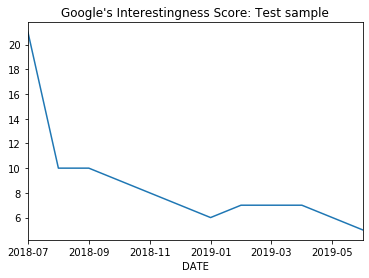

In [0]:
from scipy import stats
# test sample
iscore_test = iscore['2018-07': '2019-06']
# test sample number of months
print(f'Test sample number months: {len(iscore_test)}')
# descriptives
print(iscore_test.describe().T)

# convert to array and check
# training_set[['label']].to_numpy()
# iscore_test_ar = iscore_test.to_numpy()
# stats.describe(iscore_test_ar)

y_test_ar = iscore_test[['DEPENDENT VARIABLE']].to_numpy()
print(stats.describe(y_test_ar))
X_test_ar = iscore_test[['FIRST','SECOND','THIRD','FOURTH']]
print(stats.describe(X_test_ar))

# plot test sample
print(iscore_test['DEPENDENT VARIABLE'].plot(title="Google's Interestingness Score: Test sample"))

Historical events in September of 2018 include: Senator John McCain and Aretha Franklin memorial services, NFL player Colin Kaepernick new face of Nike, Brazilian president Jair Bolsonaro stabbed at campaign rally, Nicki Minaj and Cardi B fist fight, Dokovic wins US Men's Tenis Open championship, UN Secretary General Kofi Annan funeral, Pope Francis meeting with church leaders to discuss sexual abuse, Singer Rihanna appointed as an ambassador for Barbados, Indian Prime Minister Narendra Modi launches Modicare as world's largest free healthcare program for 500 million people, Comedian Bill Cosby sentenced to 3-10 years for sexual assault, Trump bans Iran from speaking at UN General Assembly, Elon Musk accused of securities fraud.

[September 2018 - Historical Events On This Day](https://www.onthisday.com/events/date/2018/september)

## Interestingness: Multivariate - Multi step LSTM
### with Early Stopping Callbacks, Dropout, L1L2 Regularization, Test sample validation

Number of input time steps: 3
Number of output time steps: 2
Number Model of Features: 4
N size: df_train, df_val, df_test =  96 8 12
df_test descriptives
                    count  mean  std  min  25%  50%  75%   max
FIRST               12.00  1.33 0.32 1.03 1.17 1.28 1.36  2.26
SECOND              12.00  1.34 0.34 0.86 1.17 1.27 1.38  2.20
THIRD               12.00  1.34 0.46 0.59 1.12 1.24 1.41  2.35
FOURTH              12.00  1.34 0.77 0.20 0.99 1.25 1.64  3.23
DEPENDENT VARIABLE  12.00  8.58 4.21 5.00 6.75 7.00 9.25 21.00


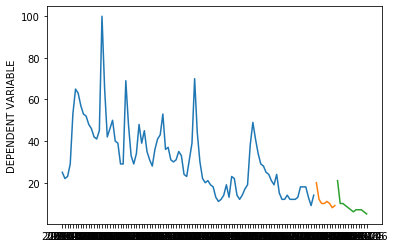

Training + Validation df N size: 116
train_df N size: 96
val_df N size: 8
test_df N size: 12
df_ar
DescribeResult(nobs=116, minmax=(array([1.03, 0.86, 0.59, 0.2 , 5.  ]), array([  3.27,   3.24,   3.21,   3.23, 100.  ])), mean=array([ 2.00646552,  2.00827586,  2.01017241,  2.00732759, 27.84482759]), variance=array([2.22163921e-01, 2.10181349e-01, 2.31893883e-01, 3.29544970e-01,
       3.00045277e+02]), skewness=array([-0.00737649, -0.10668086, -0.2243031 , -0.25835772,  1.06985962]), kurtosis=array([-0.63291545, -0.47115139, -0.35787631,  0.19172126,  1.51133578]))
test_ar
DescribeResult(nobs=12, minmax=(array([1.03, 0.86, 0.59, 0.2 , 5.  ]), array([ 2.26,  2.2 ,  2.35,  3.23, 21.  ])), mean=array([1.3325    , 1.345     , 1.3425    , 1.345     , 8.58333333]), variance=array([ 0.09971136,  0.11799091,  0.21431136,  0.58542727, 17.71969697]), skewness=array([2.26520243, 1.28418209, 0.84943205, 0.97066412, 2.32127308]), kurtosis=array([4.50898871, 1.4380625 , 0.49591114, 1.35540753, 4.5983

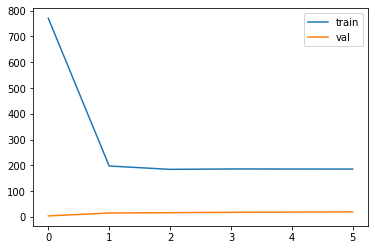

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(9.659711, 38.041195), mean=22.06224, variance=45.35093, skewness=0.04911061376333237, kurtosis=-1.0236067268561932)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(9.659711, 16.549553), mean=11.831223, variance=7.222051, skewness=1.1777294874191284, kurtosis=-0.37954762413682275)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


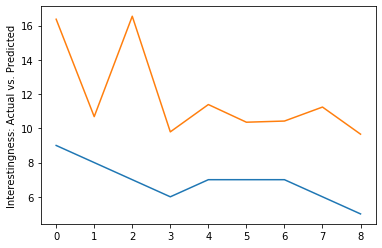

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(9.659711, 38.041195), mean=22.06224, variance=45.35093, skewness=0.04911061376333237, kurtosis=-1.0236067268561932)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


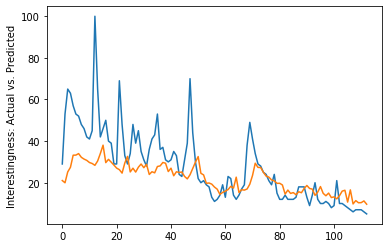

Number of nodes in the hidden layer: 150
Number of epoches: 50
Dropout proportion: 0.0
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 5.361
TEST: Mean Squared Error: 28.743
TEST: Mean Absolute Error: 4.942
TEST: Median Absolute Error: 4.391
TEST: Explained Variance: -2.568
TEST: R^2: -22.757
Number of nodes in the hidden layer: 150
Number of epoches: 50
Dropout proportion: 0.0
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 14.663
Training + Validation: Mean Squared Error: 214.991
Training + Validation: Mean Absolute Error: 9.527
Training + Validation: Median Absolute Error: 5.243
Training + Validation: Explained Variance: 0.409
Training + Validation: R^2: 0.295
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 21.04
2010-03  LSTM  2010-03                 19.97
2010-04  LSTM  2010-04 

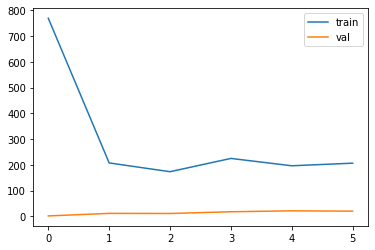

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(10.426394, 31.833242), mean=20.252989, variance=26.135746, skewness=-0.022412734106183052, kurtosis=-1.045890557643865)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(10.426394, 16.736792), mean=12.3812275, variance=5.360111, skewness=1.232826590538025, kurtosis=-0.25098574066683677)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


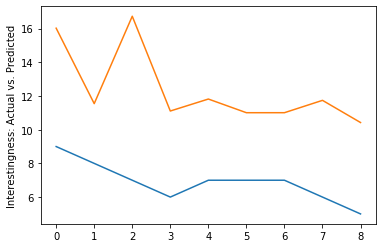

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(10.426394, 31.833242), mean=20.252989, variance=26.135746, skewness=-0.022412734106183052, kurtosis=-1.045890557643865)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


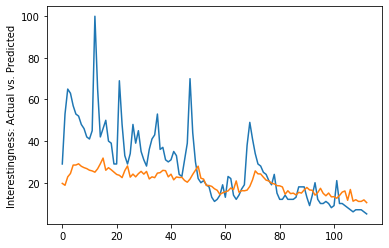

Number of nodes in the hidden layer: 150
Number of epoches: 50
Dropout proportion: 0.05
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 5.780
TEST: Mean Squared Error: 33.412
TEST: Mean Absolute Error: 5.492
TEST: Median Absolute Error: 5.110
TEST: Explained Variance: -1.683
TEST: R^2: -26.616
Number of nodes in the hidden layer: 150
Number of epoches: 50
Dropout proportion: 0.05
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 16.149
Training + Validation: Mean Squared Error: 260.796
Training + Validation: Mean Absolute Error: 10.816
Training + Validation: Median Absolute Error: 5.954
Training + Validation: Explained Variance: 0.339
Training + Validation: R^2: 0.144
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 19.67
2010-03  LSTM  2010-03                 18.76
2010-04  LSTM  2010-

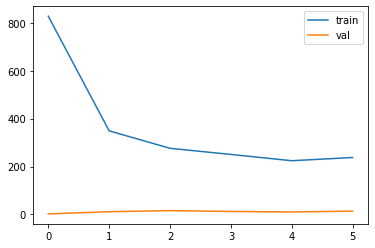

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(10.362839, 26.961666), mean=18.052128, variance=15.622405, skewness=-0.032301563769578934, kurtosis=-1.0423289245109235)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(10.362839, 16.022982), mean=12.048713, variance=3.904183, skewness=1.250356912612915, kurtosis=-0.04231587512195478)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


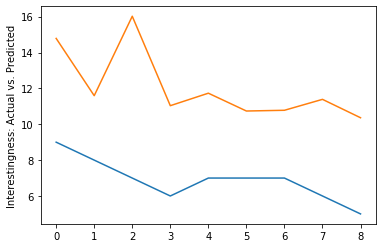

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(10.362839, 26.961666), mean=18.052128, variance=15.622405, skewness=-0.032301563769578934, kurtosis=-1.0423289245109235)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


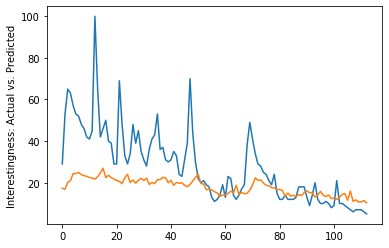

Number of nodes in the hidden layer: 150
Number of epoches: 50
Dropout proportion: 0.15
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 5.391
TEST: Mean Squared Error: 29.067
TEST: Mean Absolute Error: 5.160
TEST: Median Absolute Error: 5.035
TEST: Explained Variance: -1.020
TEST: R^2: -23.025
Number of nodes in the hidden layer: 150
Number of epoches: 50
Dropout proportion: 0.15
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 17.872
Training + Validation: Mean Squared Error: 319.402
Training + Validation: Mean Absolute Error: 12.237
Training + Validation: Median Absolute Error: 6.659
Training + Validation: Explained Variance: 0.274
Training + Validation: R^2: -0.048
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 17.36
2010-03  LSTM  2010-03                 16.86
2010-04  LSTM  2010

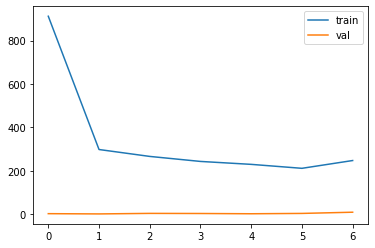

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(10.228781, 24.182987), mean=16.482018, variance=10.9551935, skewness=-0.016207585111260414, kurtosis=-1.0265700292964581)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(10.228781, 14.695327), mean=11.541292, variance=2.7805648, skewness=1.191206455230713, kurtosis=-0.2775396712797771)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


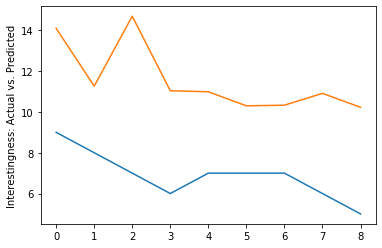

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(10.228781, 24.182987), mean=16.482018, variance=10.9551935, skewness=-0.016207585111260414, kurtosis=-1.0265700292964581)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


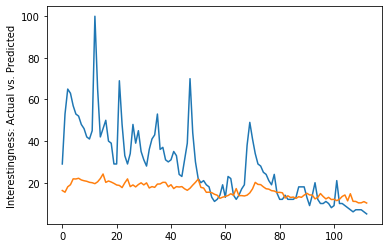

Number of nodes in the hidden layer: 150
Number of epoches: 50
Dropout proportion: 0.25
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 4.839
TEST: Mean Squared Error: 23.415
TEST: Mean Absolute Error: 4.652
TEST: Median Absolute Error: 4.912
TEST: Explained Variance: -0.463
TEST: R^2: -18.353
Number of nodes in the hidden layer: 150
Number of epoches: 50
Dropout proportion: 0.25
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 19.106
Training + Validation: Mean Squared Error: 365.021
Training + Validation: Mean Absolute Error: 13.224
Training + Validation: Median Absolute Error: 7.771
Training + Validation: Explained Variance: 0.235
Training + Validation: R^2: -0.198
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 16.24
2010-03  LSTM  2010-03                 15.43
2010-04  LSTM  2010

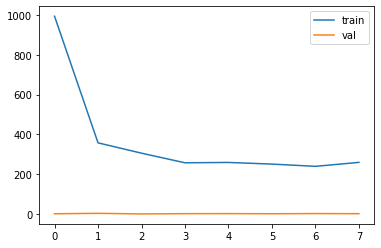

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(9.152544, 17.588194), mean=13.12207, variance=3.8746212, skewness=-0.057366739958524704, kurtosis=-1.023675693231871)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(9.152544, 13.282527), mean=10.343261, variance=1.8304174, skewness=1.3197920322418213, kurtosis=0.4880218979701221)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


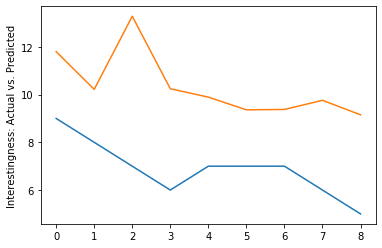

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(9.152544, 17.588194), mean=13.12207, variance=3.8746212, skewness=-0.057366739958524704, kurtosis=-1.023675693231871)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


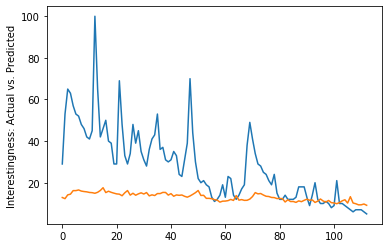

Number of nodes in the hidden layer: 150
Number of epoches: 50
Dropout proportion: 0.35
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 3.670
TEST: Mean Squared Error: 13.469
TEST: Mean Absolute Error: 3.454
TEST: Median Absolute Error: 2.894
TEST: Explained Variance: -0.270
TEST: R^2: -10.133
Number of nodes in the hidden layer: 150
Number of epoches: 50
Dropout proportion: 0.35
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 21.928
Training + Validation: Mean Squared Error: 480.818
Training + Validation: Mean Absolute Error: 15.680
Training + Validation: Median Absolute Error: 11.087
Training + Validation: Explained Variance: 0.145
Training + Validation: R^2: -0.578
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 12.88
2010-03  LSTM  2010-03                 12.34
2010-04  LSTM  201

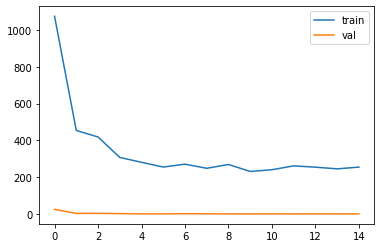

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(9.021509, 15.943402), mean=12.148968, variance=2.8985424, skewness=0.015739217400550842, kurtosis=-1.1097293320713695)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(9.021509, 11.229919), mean=9.725911, variance=0.66904616, skewness=0.8080164194107056, kurtosis=-0.8928980963696791)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


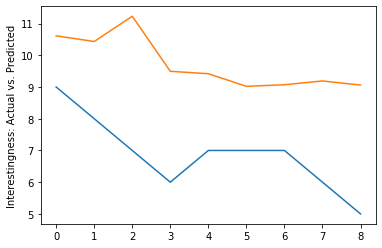

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(9.021509, 15.943402), mean=12.148968, variance=2.8985424, skewness=0.015739217400550842, kurtosis=-1.1097293320713695)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


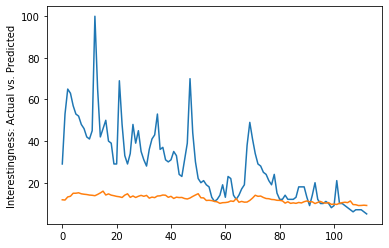

Number of nodes in the hidden layer: 150
Number of epoches: 50
Dropout proportion: 0.5
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 2.973
TEST: Mean Squared Error: 8.836
TEST: Mean Absolute Error: 2.837
TEST: Median Absolute Error: 2.434
TEST: Explained Variance: 0.349
TEST: R^2: -6.303
Number of nodes in the hidden layer: 150
Number of epoches: 50
Dropout proportion: 0.5
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 22.685
Training + Validation: Mean Squared Error: 514.604
Training + Validation: Mean Absolute Error: 16.388
Training + Validation: Median Absolute Error: 12.098
Training + Validation: Explained Variance: 0.132
Training + Validation: R^2: -0.689
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 11.79
2010-03  LSTM  2010-03                 11.67
2010-04  LSTM  2010-04 

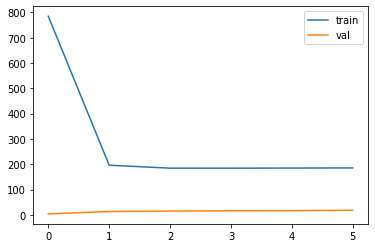

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(9.188464, 38.110794), mean=22.081675, variance=46.483852, skewness=0.04161003232002258, kurtosis=-1.026574196920978)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(9.188464, 16.96382), mean=11.723146, variance=7.925819, skewness=1.1255441904067993, kurtosis=-0.35319107009778383)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


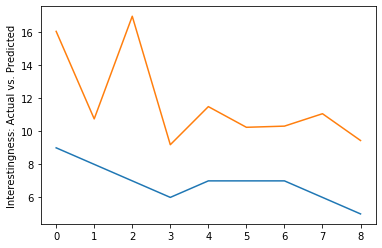

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(9.188464, 38.110794), mean=22.081675, variance=46.483852, skewness=0.04161003232002258, kurtosis=-1.026574196920978)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


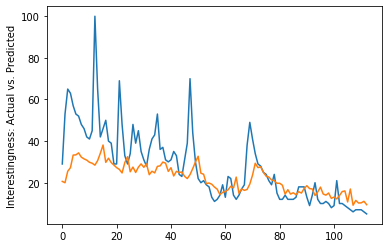

Number of nodes in the hidden layer: 150
Number of epoches: 100
Dropout proportion: 0.0
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 5.310
TEST: Mean Squared Error: 28.196
TEST: Mean Absolute Error: 4.834
TEST: Median Absolute Error: 4.443
TEST: Explained Variance: -2.989
TEST: R^2: -22.305
Number of nodes in the hidden layer: 150
Number of epoches: 100
Dropout proportion: 0.0
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 14.616
Training + Validation: Mean Squared Error: 213.632
Training + Validation: Mean Absolute Error: 9.468
Training + Validation: Median Absolute Error: 5.064
Training + Validation: Explained Variance: 0.413
Training + Validation: R^2: 0.299
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 20.62
2010-03  LSTM  2010-03                 19.99
2010-04  LSTM  2010-0

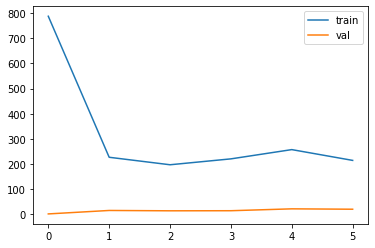

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(10.404309, 31.630922), mean=20.03095, variance=25.566744, skewness=-0.006104398053139448, kurtosis=-1.0299334097383885)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(10.404309, 17.104115), mean=12.340951, variance=5.859305, skewness=1.2240831851959229, kurtosis=-0.15124115412670758)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


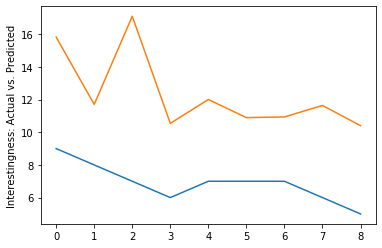

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(10.404309, 31.630922), mean=20.03095, variance=25.566744, skewness=-0.006104398053139448, kurtosis=-1.0299334097383885)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


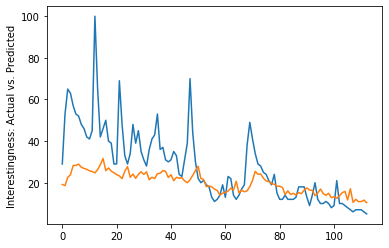

Number of nodes in the hidden layer: 150
Number of epoches: 100
Dropout proportion: 0.05
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 5.772
TEST: Mean Squared Error: 33.319
TEST: Mean Absolute Error: 5.452
TEST: Median Absolute Error: 5.007
TEST: Explained Variance: -1.971
TEST: R^2: -26.539
Number of nodes in the hidden layer: 150
Number of epoches: 100
Dropout proportion: 0.05
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 16.310
Training + Validation: Mean Squared Error: 266.012
Training + Validation: Mean Absolute Error: 10.933
Training + Validation: Median Absolute Error: 5.908
Training + Validation: Explained Variance: 0.334
Training + Validation: R^2: 0.127
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 19.14
2010-03  LSTM  2010-03                 18.57
2010-04  LSTM  201

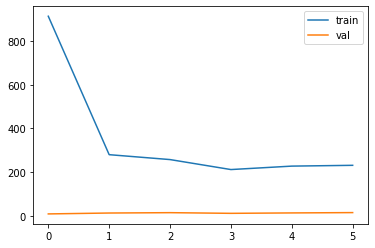

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(10.304644, 27.647642), mean=18.402126, variance=16.416952, skewness=-0.04348558187484741, kurtosis=-1.0105329609149087)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(10.304644, 17.509565), mean=12.340232, variance=5.594509, skewness=1.3939670324325562, kurtosis=0.5612611983088973)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


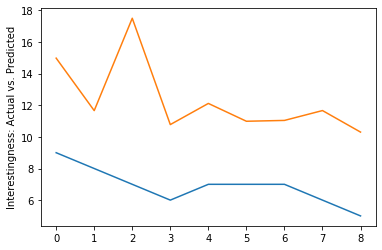

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(10.304644, 27.647642), mean=18.402126, variance=16.416952, skewness=-0.04348558187484741, kurtosis=-1.0105329609149087)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


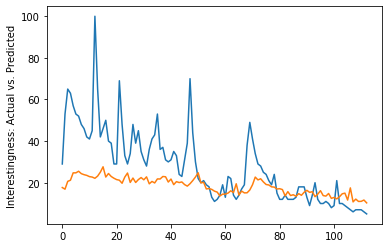

Number of nodes in the hidden layer: 150
Number of epoches: 100
Dropout proportion: 0.15
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 5.786
TEST: Mean Squared Error: 33.474
TEST: Mean Absolute Error: 5.451
TEST: Median Absolute Error: 5.119
TEST: Explained Variance: -2.105
TEST: R^2: -26.667
Number of nodes in the hidden layer: 150
Number of epoches: 100
Dropout proportion: 0.15
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 17.670
Training + Validation: Mean Squared Error: 312.214
Training + Validation: Mean Absolute Error: 12.074
Training + Validation: Median Absolute Error: 6.368
Training + Validation: Explained Variance: 0.276
Training + Validation: R^2: -0.024
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 17.67
2010-03  LSTM  2010-03                 16.88
2010-04  LSTM  20

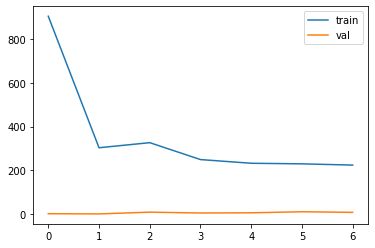

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(9.954744, 23.454576), mean=16.150679, variance=10.174119, skewness=-0.030230047181248665, kurtosis=-1.0207487272671913)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(9.954744, 15.229263), mean=11.4410515, variance=3.301912, skewness=1.2826093435287476, kurtosis=0.15865084392587292)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


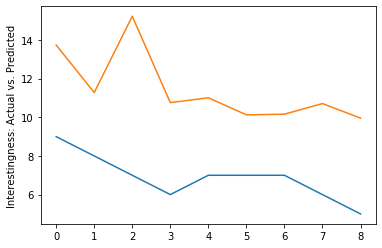

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(9.954744, 23.454576), mean=16.150679, variance=10.174119, skewness=-0.030230047181248665, kurtosis=-1.0207487272671913)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


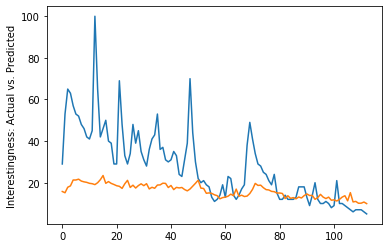

Number of nodes in the hidden layer: 150
Number of epoches: 100
Dropout proportion: 0.25
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 4.786
TEST: Mean Squared Error: 22.908
TEST: Mean Absolute Error: 4.552
TEST: Median Absolute Error: 4.711
TEST: Explained Variance: -0.806
TEST: R^2: -17.934
Number of nodes in the hidden layer: 150
Number of epoches: 100
Dropout proportion: 0.25
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 19.370
Training + Validation: Mean Squared Error: 375.183
Training + Validation: Mean Absolute Error: 13.448
Training + Validation: Median Absolute Error: 8.229
Training + Validation: Explained Variance: 0.227
Training + Validation: R^2: -0.231
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 15.77
2010-03  LSTM  2010-03                 15.18
2010-04  LSTM  20

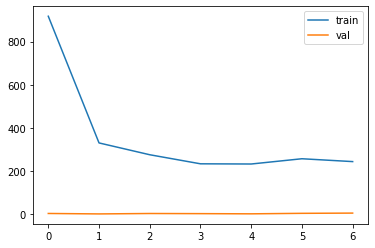

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(9.998816, 18.614693), mean=14.025666, variance=4.165322, skewness=-0.08688001334667206, kurtosis=-1.0079164269842862)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(9.998816, 13.713221), mean=11.064527, variance=1.8054793, skewness=1.1687513589859009, kurtosis=-0.18649911264317742)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


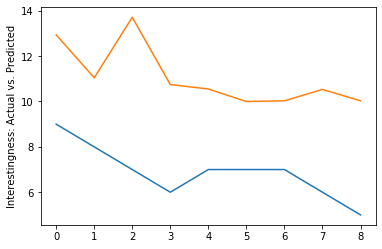

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(9.998816, 18.614693), mean=14.025666, variance=4.165322, skewness=-0.08688001334667206, kurtosis=-1.0079164269842862)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


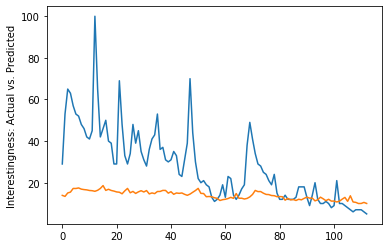

Number of nodes in the hidden layer: 150
Number of epoches: 100
Dropout proportion: 0.35
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 4.333
TEST: Mean Squared Error: 18.774
TEST: Mean Absolute Error: 4.176
TEST: Median Absolute Error: 3.936
TEST: Explained Variance: -0.106
TEST: R^2: -14.518
Number of nodes in the hidden layer: 150
Number of epoches: 100
Dropout proportion: 0.35
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 21.286
Training + Validation: Mean Squared Error: 453.093
Training + Validation: Mean Absolute Error: 15.105
Training + Validation: Median Absolute Error: 10.240
Training + Validation: Explained Variance: 0.151
Training + Validation: R^2: -0.487
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 13.91
2010-03  LSTM  2010-03                 13.42
2010-04  LSTM  2

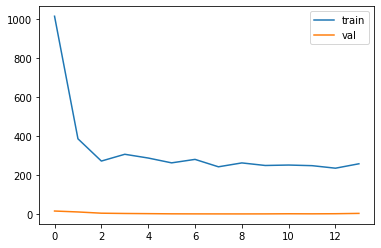

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(10.216283, 16.77802), mean=13.220071, variance=2.5041397, skewness=-0.005058149341493845, kurtosis=-1.0871090798084861)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(10.216283, 12.987342), mean=11.027906, variance=0.8890141, skewness=1.1317737102508545, kurtosis=0.006125975237051495)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


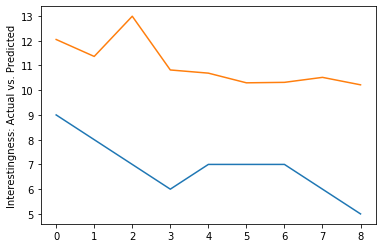

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(10.216283, 16.77802), mean=13.220071, variance=2.5041397, skewness=-0.005058149341493845, kurtosis=-1.0871090798084861)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


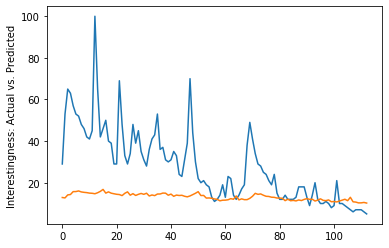

Number of nodes in the hidden layer: 150
Number of epoches: 100
Dropout proportion: 0.5
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 4.252
TEST: Mean Squared Error: 18.083
TEST: Mean Absolute Error: 4.139
TEST: Median Absolute Error: 3.688
TEST: Explained Variance: 0.214
TEST: R^2: -13.946
Number of nodes in the hidden layer: 150
Number of epoches: 100
Dropout proportion: 0.5
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 22.029
Training + Validation: Mean Squared Error: 485.297
Training + Validation: Mean Absolute Error: 15.767
Training + Validation: Median Absolute Error: 11.025
Training + Validation: Explained Variance: 0.121
Training + Validation: R^2: -0.592
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 12.89
2010-03  LSTM  2010-03                 12.69
2010-04  LSTM  2010

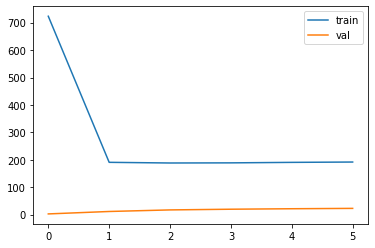

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(10.04925, 35.64208), mean=21.731638, variance=36.5481, skewness=-0.0018058567075058818, kurtosis=-1.0187243261432508)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(10.04925, 17.388742), mean=12.389843, variance=7.1880116, skewness=1.1317338943481445, kurtosis=-0.3510436246616355)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


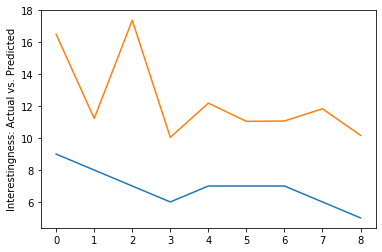

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(10.04925, 35.64208), mean=21.731638, variance=36.5481, skewness=-0.0018058567075058818, kurtosis=-1.0187243261432508)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


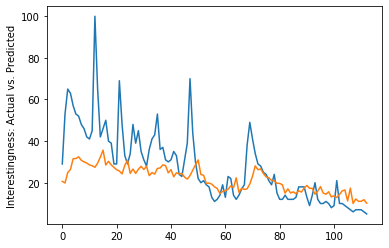

Number of nodes in the hidden layer: 200
Number of epoches: 50
Dropout proportion: 0.0
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 5.887
TEST: Mean Squared Error: 34.661
TEST: Mean Absolute Error: 5.501
TEST: Median Absolute Error: 5.175
TEST: Explained Variance: -2.637
TEST: R^2: -27.649
Number of nodes in the hidden layer: 200
Number of epoches: 50
Dropout proportion: 0.0
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 15.069
Training + Validation: Mean Squared Error: 227.062
Training + Validation: Mean Absolute Error: 9.957
Training + Validation: Median Absolute Error: 5.672
Training + Validation: Explained Variance: 0.382
Training + Validation: R^2: 0.255
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 20.61
2010-03  LSTM  2010-03                 19.89
2010-04  LSTM  2010-04 

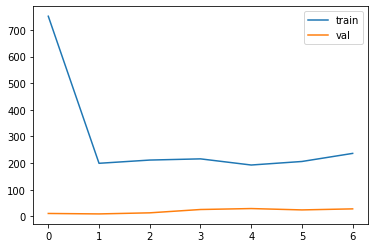

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(11.426577, 30.625645), mean=20.278444, variance=20.910307, skewness=-0.04291728511452675, kurtosis=-1.0307891692090925)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(11.426577, 17.006784), mean=13.188593, variance=4.625351, skewness=1.2092528343200684, kurtosis=-0.343893858065059)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


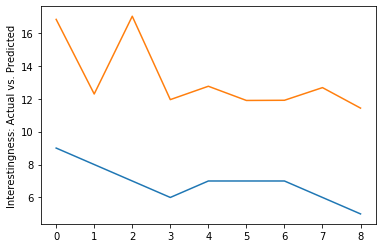

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(11.426577, 30.625645), mean=20.278444, variance=20.910307, skewness=-0.04291728511452675, kurtosis=-1.0307891692090925)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


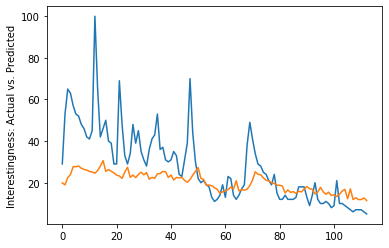

Number of nodes in the hidden layer: 200
Number of epoches: 50
Dropout proportion: 0.05
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 6.513
TEST: Mean Squared Error: 42.421
TEST: Mean Absolute Error: 6.300
TEST: Median Absolute Error: 5.943
TEST: Explained Variance: -1.261
TEST: R^2: -34.062
Number of nodes in the hidden layer: 200
Number of epoches: 50
Dropout proportion: 0.05
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 16.418
Training + Validation: Mean Squared Error: 269.546
Training + Validation: Mean Absolute Error: 11.160
Training + Validation: Median Absolute Error: 6.381
Training + Validation: Explained Variance: 0.309
Training + Validation: R^2: 0.116
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 19.88
2010-03  LSTM  2010-03                 18.96
2010-04  LSTM  2010-

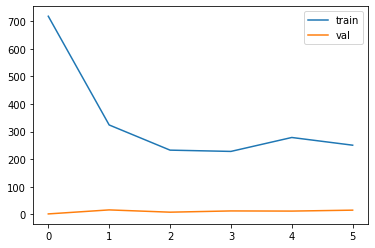

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(10.774163, 25.26037), mean=17.539995, variance=12.098159, skewness=-0.0677625760436058, kurtosis=-1.0440048083512352)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(10.774163, 15.852943), mean=12.27042, variance=3.4390464, skewness=1.1640914678573608, kurtosis=-0.24559735303115682)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


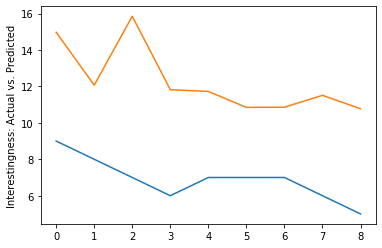

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(10.774163, 25.26037), mean=17.539995, variance=12.098159, skewness=-0.0677625760436058, kurtosis=-1.0440048083512352)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


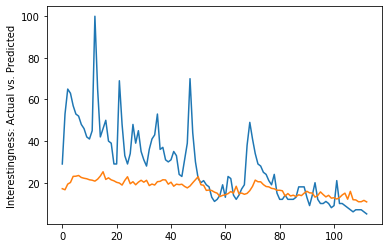

Number of nodes in the hidden layer: 200
Number of epoches: 50
Dropout proportion: 0.15
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 5.580
TEST: Mean Squared Error: 31.137
TEST: Mean Absolute Error: 5.382
TEST: Median Absolute Error: 5.511
TEST: Explained Variance: -0.799
TEST: R^2: -24.736
Number of nodes in the hidden layer: 200
Number of epoches: 50
Dropout proportion: 0.15
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 18.399
Training + Validation: Mean Squared Error: 338.540
Training + Validation: Mean Absolute Error: 12.707
Training + Validation: Median Absolute Error: 6.922
Training + Validation: Explained Variance: 0.246
Training + Validation: R^2: -0.111
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 17.13
2010-03  LSTM  2010-03                 16.61
2010-04  LSTM  2010

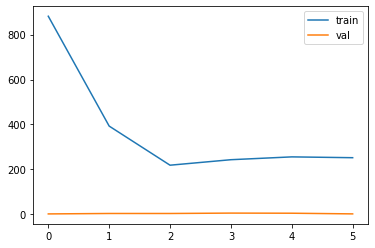

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(8.848172, 19.432474), mean=13.914043, variance=6.05476, skewness=-0.06603574007749557, kurtosis=-1.017694699608392)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(8.848172, 14.246678), mean=10.427615, variance=2.9399045, skewness=1.369218349456787, kurtosis=0.7471651449605634)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


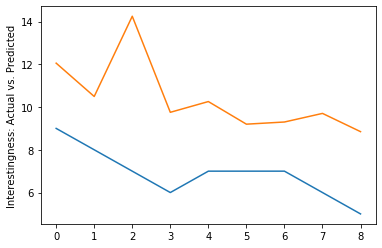

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(8.848172, 19.432474), mean=13.914043, variance=6.05476, skewness=-0.06603574007749557, kurtosis=-1.017694699608392)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


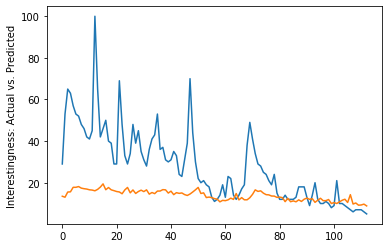

Number of nodes in the hidden layer: 200
Number of epoches: 50
Dropout proportion: 0.25
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 3.820
TEST: Mean Squared Error: 14.596
TEST: Mean Absolute Error: 3.539
TEST: Median Absolute Error: 3.256
TEST: Explained Variance: -0.714
TEST: R^2: -11.064
Number of nodes in the hidden layer: 200
Number of epoches: 50
Dropout proportion: 0.25
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 21.162
Training + Validation: Mean Squared Error: 447.810
Training + Validation: Mean Absolute Error: 14.997
Training + Validation: Median Absolute Error: 10.438
Training + Validation: Explained Variance: 0.178
Training + Validation: R^2: -0.469
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 13.49
2010-03  LSTM  2010-03                 13.03
2010-04  LSTM  201

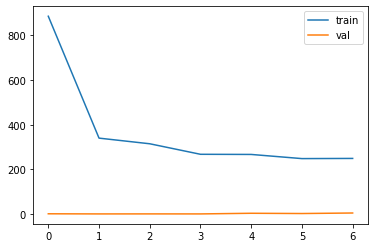

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(10.03997, 17.74805), mean=13.770848, variance=3.3583949, skewness=-0.12493889778852463, kurtosis=-1.0287451659916225)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(10.03997, 13.486608), mean=11.043827, variance=1.3882987, skewness=1.24424409866333, kurtosis=0.11525948323586288)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


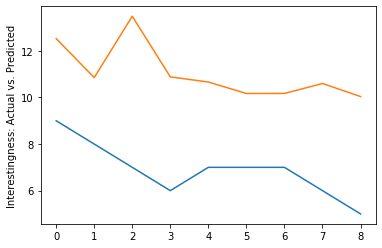

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(10.03997, 17.74805), mean=13.770848, variance=3.3583949, skewness=-0.12493889778852463, kurtosis=-1.0287451659916225)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


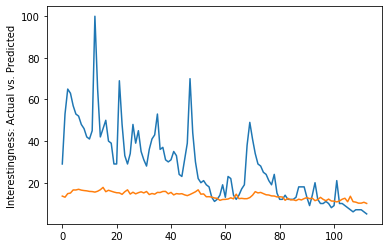

Number of nodes in the hidden layer: 200
Number of epoches: 50
Dropout proportion: 0.35
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 4.302
TEST: Mean Squared Error: 18.510
TEST: Mean Absolute Error: 4.155
TEST: Median Absolute Error: 3.662
TEST: Explained Variance: -0.030
TEST: R^2: -14.299
Number of nodes in the hidden layer: 200
Number of epoches: 50
Dropout proportion: 0.35
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 21.553
Training + Validation: Mean Squared Error: 464.519
Training + Validation: Mean Absolute Error: 15.333
Training + Validation: Median Absolute Error: 10.239
Training + Validation: Explained Variance: 0.137
Training + Validation: R^2: -0.524
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 13.56
2010-03  LSTM  2010-03                 13.03
2010-04  LSTM  201

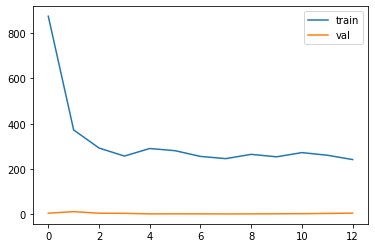

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(10.253806, 17.85901), mean=13.851089, variance=3.3737297, skewness=-0.03786986321210861, kurtosis=-1.0915367207793822)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(10.253806, 12.787267), mean=11.1303215, variance=0.82633203, skewness=0.8843255043029785, kurtosis=-0.6855933245803358)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


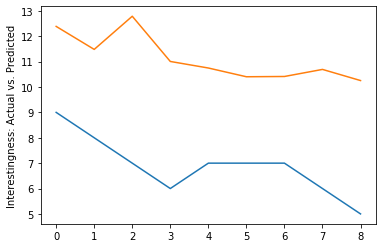

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(10.253806, 17.85901), mean=13.851089, variance=3.3737297, skewness=-0.03786986321210861, kurtosis=-1.0915367207793822)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


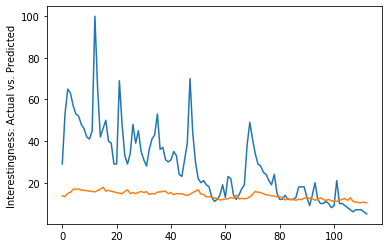

Number of nodes in the hidden layer: 200
Number of epoches: 50
Dropout proportion: 0.5
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 4.334
TEST: Mean Squared Error: 18.783
TEST: Mean Absolute Error: 4.241
TEST: Median Absolute Error: 3.748
TEST: Explained Variance: 0.344
TEST: R^2: -14.525
Number of nodes in the hidden layer: 200
Number of epoches: 50
Dropout proportion: 0.5
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 21.463
Training + Validation: Mean Squared Error: 460.653
Training + Validation: Mean Absolute Error: 15.258
Training + Validation: Median Absolute Error: 10.317
Training + Validation: Explained Variance: 0.142
Training + Validation: R^2: -0.512
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 13.64
2010-03  LSTM  2010-03                 13.33
2010-04  LSTM  2010-0

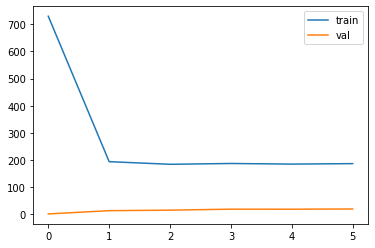

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(9.683008, 38.07633), mean=22.03079, variance=44.712135, skewness=0.06402590870857239, kurtosis=-1.0082792919587242)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(9.683008, 16.7647), mean=11.938724, variance=7.39595, skewness=1.1493175029754639, kurtosis=-0.39882611515834565)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


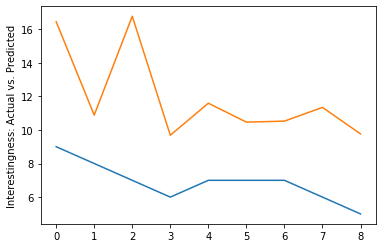

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(9.683008, 38.07633), mean=22.03079, variance=44.712135, skewness=0.06402590870857239, kurtosis=-1.0082792919587242)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


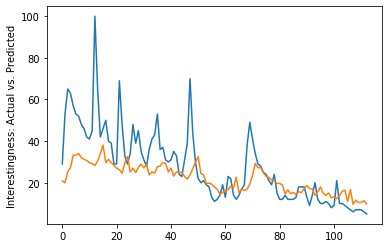

Number of nodes in the hidden layer: 200
Number of epoches: 100
Dropout proportion: 0.0
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 5.470
TEST: Mean Squared Error: 29.917
TEST: Mean Absolute Error: 5.050
TEST: Median Absolute Error: 4.590
TEST: Explained Variance: -2.650
TEST: R^2: -23.727
Number of nodes in the hidden layer: 200
Number of epoches: 100
Dropout proportion: 0.0
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 14.697
Training + Validation: Mean Squared Error: 216.008
Training + Validation: Mean Absolute Error: 9.561
Training + Validation: Median Absolute Error: 5.341
Training + Validation: Explained Variance: 0.407
Training + Validation: R^2: 0.291
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 20.85
2010-03  LSTM  2010-03                 19.96
2010-04  LSTM  2010-0

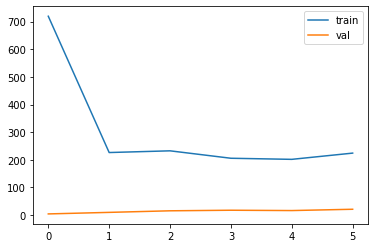

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(10.461717, 32.5066), mean=20.371153, variance=27.411976, skewness=-0.002229799749329686, kurtosis=-1.0219343469139015)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(10.461717, 16.29124), mean=12.293964, variance=5.1481123, skewness=1.2098002433776855, kurtosis=-0.34841935099161825)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


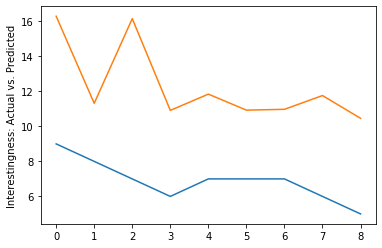

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(10.461717, 32.5066), mean=20.371153, variance=27.411976, skewness=-0.002229799749329686, kurtosis=-1.0219343469139015)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


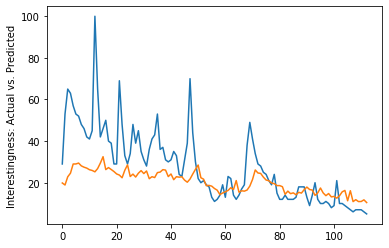

Number of nodes in the hidden layer: 200
Number of epoches: 100
Dropout proportion: 0.05
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 5.675
TEST: Mean Squared Error: 32.202
TEST: Mean Absolute Error: 5.405
TEST: Median Absolute Error: 4.914
TEST: Explained Variance: -1.469
TEST: R^2: -25.616
Number of nodes in the hidden layer: 200
Number of epoches: 100
Dropout proportion: 0.05
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 16.059
Training + Validation: Mean Squared Error: 257.880
Training + Validation: Mean Absolute Error: 10.723
Training + Validation: Median Absolute Error: 6.083
Training + Validation: Explained Variance: 0.343
Training + Validation: R^2: 0.154
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 19.87
2010-03  LSTM  2010-03                 18.90
2010-04  LSTM  201

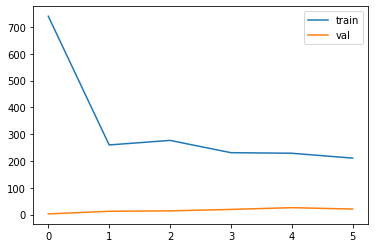

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(11.275197, 26.405525), mean=18.420275, variance=12.807654, skewness=-0.08594656735658646, kurtosis=-1.0136891429606332)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(11.275197, 16.686653), mean=12.8888, variance=3.7024732, skewness=1.2434937953948975, kurtosis=-0.12006002558510076)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


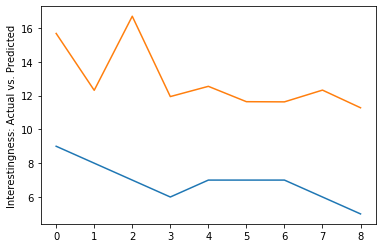

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(11.275197, 26.405525), mean=18.420275, variance=12.807654, skewness=-0.08594656735658646, kurtosis=-1.0136891429606332)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


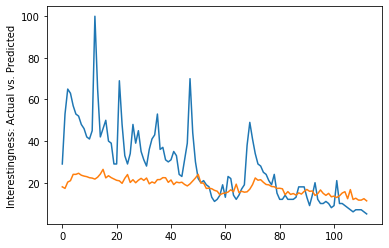

Number of nodes in the hidden layer: 200
Number of epoches: 100
Dropout proportion: 0.15
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 6.192
TEST: Mean Squared Error: 38.338
TEST: Mean Absolute Error: 6.000
TEST: Median Absolute Error: 5.937
TEST: Explained Variance: -0.933
TEST: R^2: -30.687
Number of nodes in the hidden layer: 200
Number of epoches: 100
Dropout proportion: 0.15
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 17.875
Training + Validation: Mean Squared Error: 319.522
Training + Validation: Mean Absolute Error: 12.335
Training + Validation: Median Absolute Error: 6.670
Training + Validation: Explained Variance: 0.250
Training + Validation: R^2: -0.048
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 18.02
2010-03  LSTM  2010-03                 17.27
2010-04  LSTM  20

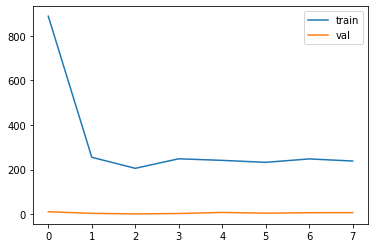

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(10.022193, 20.978786), mean=15.153309, variance=6.8295746, skewness=-0.07783669978380203, kurtosis=-1.030305827095932)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(10.022193, 13.97541), mean=11.235453, variance=2.0994782, skewness=1.0374523401260376, kurtosis=-0.41460288350699237)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


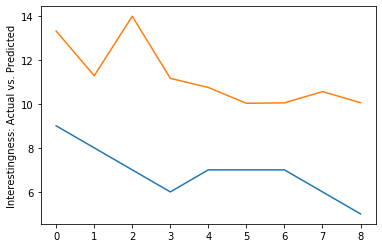

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(10.022193, 20.978786), mean=15.153309, variance=6.8295746, skewness=-0.07783669978380203, kurtosis=-1.030305827095932)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


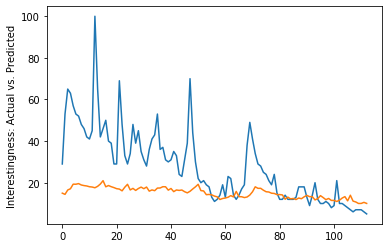

Number of nodes in the hidden layer: 200
Number of epoches: 100
Dropout proportion: 0.25
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 4.511
TEST: Mean Squared Error: 20.345
TEST: Mean Absolute Error: 4.347
TEST: Median Absolute Error: 4.302
TEST: Explained Variance: -0.200
TEST: R^2: -15.815
Number of nodes in the hidden layer: 200
Number of epoches: 100
Dropout proportion: 0.25
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 20.264
Training + Validation: Mean Squared Error: 410.645
Training + Validation: Mean Absolute Error: 14.221
Training + Validation: Median Absolute Error: 9.161
Training + Validation: Explained Variance: 0.191
Training + Validation: R^2: -0.347
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 14.98
2010-03  LSTM  2010-03                 14.40
2010-04  LSTM  20

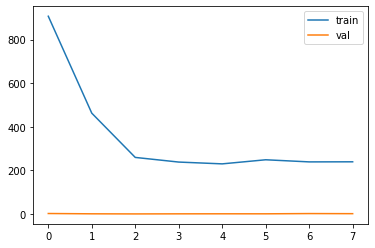

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(8.650416, 19.349657), mean=13.553096, variance=6.3243957, skewness=-0.043757304549217224, kurtosis=-1.0073671168060814)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(8.650416, 12.872324), mean=9.941256, variance=2.2812443, skewness=1.0545997619628906, kurtosis=-0.33818244672793174)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


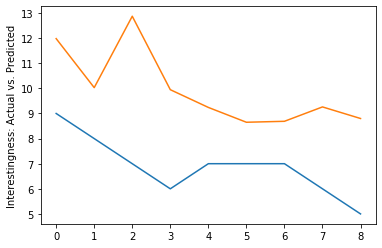

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(8.650416, 19.349657), mean=13.553096, variance=6.3243957, skewness=-0.043757304549217224, kurtosis=-1.0073671168060814)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


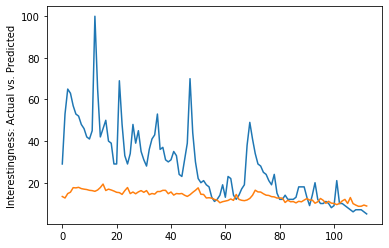

Number of nodes in the hidden layer: 200
Number of epoches: 100
Dropout proportion: 0.35
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 3.312
TEST: Mean Squared Error: 10.972
TEST: Mean Absolute Error: 3.052
TEST: Median Absolute Error: 2.981
TEST: Explained Variance: -0.368
TEST: R^2: -8.068
Number of nodes in the hidden layer: 200
Number of epoches: 100
Dropout proportion: 0.35
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 21.373
Training + Validation: Mean Squared Error: 456.790
Training + Validation: Mean Absolute Error: 15.193
Training + Validation: Median Absolute Error: 10.811
Training + Validation: Explained Variance: 0.183
Training + Validation: R^2: -0.499
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 13.37
2010-03  LSTM  2010-03                 12.65
2010-04  LSTM  20

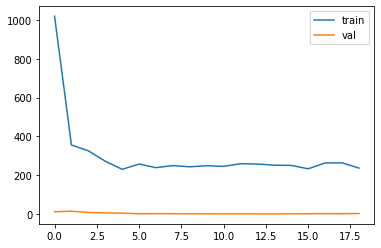

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(10.041407, 17.063862), mean=13.272486, variance=2.9188073, skewness=-0.010766301304101944, kurtosis=-1.092676759190375)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(10.041407, 12.082982), mean=10.804032, variance=0.6953124, skewness=0.6452705264091492, kurtosis=-1.2228792510348008)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


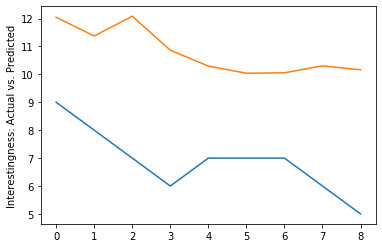

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(10.041407, 17.063862), mean=13.272486, variance=2.9188073, skewness=-0.010766301304101944, kurtosis=-1.092676759190375)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


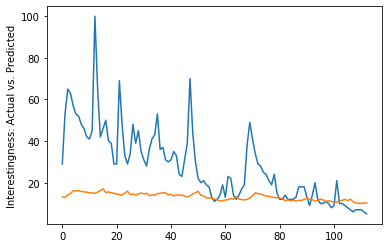

Number of nodes in the hidden layer: 200
Number of epoches: 100
Dropout proportion: 0.5
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 4.012
TEST: Mean Squared Error: 16.096
TEST: Mean Absolute Error: 3.915
TEST: Median Absolute Error: 3.375
TEST: Explained Variance: 0.365
TEST: R^2: -12.304
Number of nodes in the hidden layer: 200
Number of epoches: 100
Dropout proportion: 0.5
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 21.912
Training + Validation: Mean Squared Error: 480.128
Training + Validation: Mean Absolute Error: 15.658
Training + Validation: Median Absolute Error: 10.972
Training + Validation: Explained Variance: 0.133
Training + Validation: R^2: -0.575
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 13.12
2010-03  LSTM  2010-03                 12.88
2010-04  LSTM  2010

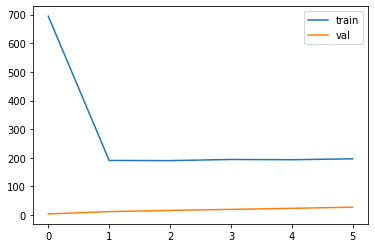

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(10.545775, 36.285366), mean=22.087431, variance=37.499523, skewness=0.006453864276409149, kurtosis=-1.023301081827631)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(10.545775, 17.19117), mean=12.638541, variance=6.810207, skewness=1.1588104963302612, kurtosis=-0.40409222690367574)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


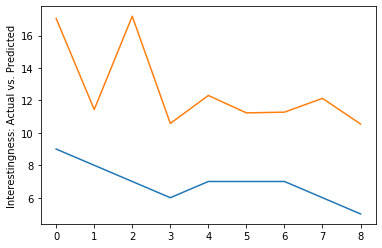

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(10.545775, 36.285366), mean=22.087431, variance=37.499523, skewness=0.006453864276409149, kurtosis=-1.023301081827631)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


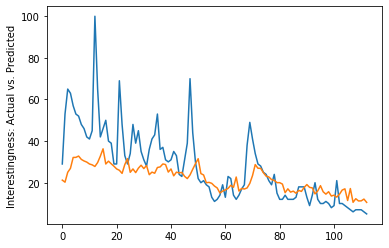

Number of nodes in the hidden layer: 250
Number of epoches: 50
Dropout proportion: 0.0
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 6.093
TEST: Mean Squared Error: 37.125
TEST: Mean Absolute Error: 5.750
TEST: Median Absolute Error: 5.304
TEST: Explained Variance: -2.361
TEST: R^2: -29.685
Number of nodes in the hidden layer: 250
Number of epoches: 50
Dropout proportion: 0.0
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 14.905
Training + Validation: Mean Squared Error: 222.171
Training + Validation: Mean Absolute Error: 9.869
Training + Validation: Median Absolute Error: 5.673
Training + Validation: Explained Variance: 0.384
Training + Validation: R^2: 0.271
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 21.24
2010-03  LSTM  2010-03                 20.25
2010-04  LSTM  2010-04 

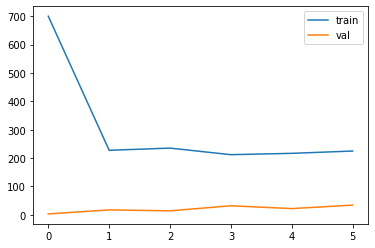

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(11.861674, 31.560415), mean=20.974396, variance=22.174377, skewness=-0.04225911572575569, kurtosis=-1.0447773035919898)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(11.861674, 17.637203), mean=13.69287, variance=4.7864304, skewness=1.2034659385681152, kurtosis=-0.3283831095449985)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


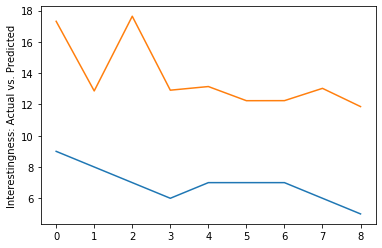

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(11.861674, 31.560415), mean=20.974396, variance=22.174377, skewness=-0.04225911572575569, kurtosis=-1.0447773035919898)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


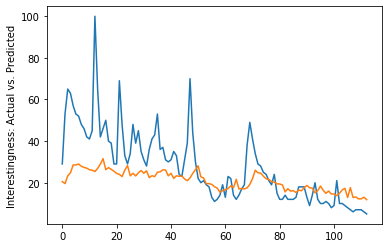

Number of nodes in the hidden layer: 250
Number of epoches: 50
Dropout proportion: 0.05
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 7.014
TEST: Mean Squared Error: 49.198
TEST: Mean Absolute Error: 6.804
TEST: Median Absolute Error: 6.862
TEST: Explained Variance: -1.400
TEST: R^2: -39.664
Number of nodes in the hidden layer: 250
Number of epoches: 50
Dropout proportion: 0.05
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 16.025
Training + Validation: Mean Squared Error: 256.805
Training + Validation: Mean Absolute Error: 10.920
Training + Validation: Median Absolute Error: 6.597
Training + Validation: Explained Variance: 0.318
Training + Validation: R^2: 0.157
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 20.52
2010-03  LSTM  2010-03                 19.57
2010-04  LSTM  2010-

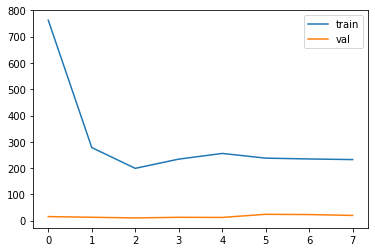

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(11.737014, 23.213627), mean=17.149515, variance=7.467408, skewness=-0.09481538087129593, kurtosis=-1.017218544735546)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(11.737014, 16.023762), mean=13.035297, variance=2.516625, skewness=1.0865836143493652, kurtosis=-0.39458931878666625)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


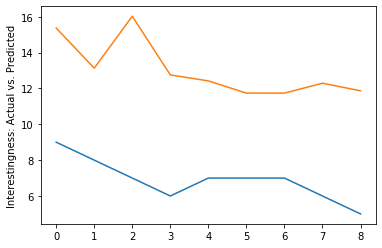

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(11.737014, 23.213627), mean=17.149515, variance=7.467408, skewness=-0.09481538087129593, kurtosis=-1.017218544735546)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


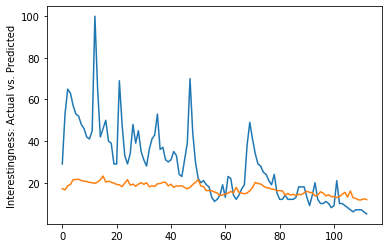

Number of nodes in the hidden layer: 250
Number of epoches: 50
Dropout proportion: 0.15
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 6.279
TEST: Mean Squared Error: 39.420
TEST: Mean Absolute Error: 6.146
TEST: Median Absolute Error: 6.289
TEST: Explained Variance: -0.357
TEST: R^2: -31.582
Number of nodes in the hidden layer: 250
Number of epoches: 50
Dropout proportion: 0.15
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 19.005
Training + Validation: Mean Squared Error: 361.193
Training + Validation: Mean Absolute Error: 13.309
Training + Validation: Median Absolute Error: 7.552
Training + Validation: Explained Variance: 0.199
Training + Validation: R^2: -0.185
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 17.13
2010-03  LSTM  2010-03                 16.55
2010-04  LSTM  2010

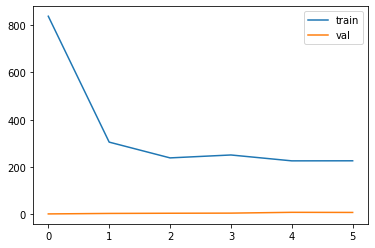

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(9.598148, 22.51157), mean=15.845003, variance=9.232567, skewness=-0.10689012706279755, kurtosis=-1.0023961726845567)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(9.598148, 15.303439), mean=11.2253, variance=3.5448527, skewness=1.3475265502929688, kurtosis=0.46179248338691314)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


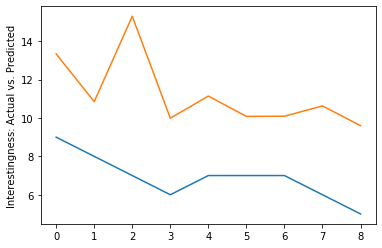

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(9.598148, 22.51157), mean=15.845003, variance=9.232567, skewness=-0.10689012706279755, kurtosis=-1.0023961726845567)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


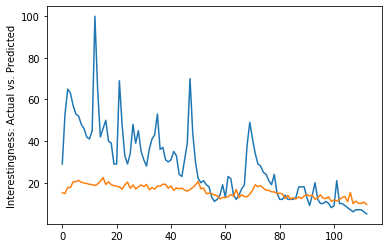

Number of nodes in the hidden layer: 250
Number of epoches: 50
Dropout proportion: 0.25
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 4.602
TEST: Mean Squared Error: 21.179
TEST: Mean Absolute Error: 4.336
TEST: Median Absolute Error: 4.143
TEST: Explained Variance: -0.962
TEST: R^2: -16.505
Number of nodes in the hidden layer: 250
Number of epoches: 50
Dropout proportion: 0.25
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 19.643
Training + Validation: Mean Squared Error: 385.838
Training + Validation: Mean Absolute Error: 13.668
Training + Validation: Median Absolute Error: 8.424
Training + Validation: Explained Variance: 0.216
Training + Validation: R^2: -0.266
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 15.18
2010-03  LSTM  2010-03                 14.84
2010-04  LSTM  2010

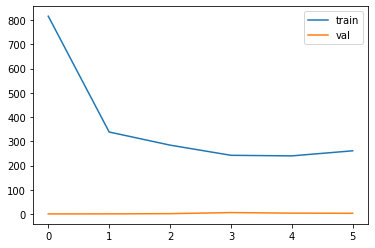

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(9.798381, 16.341665), mean=13.036051, variance=2.349728, skewness=-0.14407435059547424, kurtosis=-0.9959797200234268)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(9.798381, 14.438133), mean=10.95999, variance=2.1672297, skewness=1.6273401975631714, kurtosis=1.5350339894437406)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


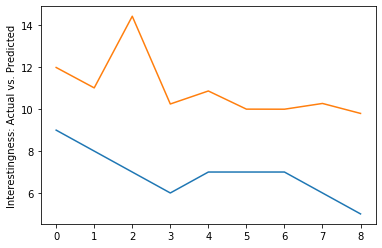

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(9.798381, 16.341665), mean=13.036051, variance=2.349728, skewness=-0.14407435059547424, kurtosis=-0.9959797200234268)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


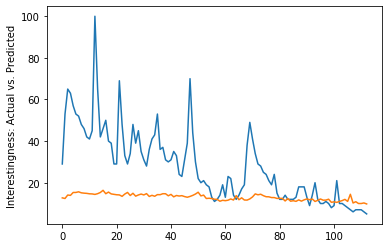

Number of nodes in the hidden layer: 250
Number of epoches: 50
Dropout proportion: 0.35
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 4.291
TEST: Mean Squared Error: 18.412
TEST: Mean Absolute Error: 4.071
TEST: Median Absolute Error: 3.870
TEST: Explained Variance: -0.519
TEST: R^2: -14.218
Number of nodes in the hidden layer: 250
Number of epoches: 50
Dropout proportion: 0.35
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 22.218
Training + Validation: Mean Squared Error: 493.651
Training + Validation: Mean Absolute Error: 15.937
Training + Validation: Median Absolute Error: 11.144
Training + Validation: Explained Variance: 0.111
Training + Validation: R^2: -0.620
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 12.71
2010-03  LSTM  2010-03                 12.42
2010-04  LSTM  201

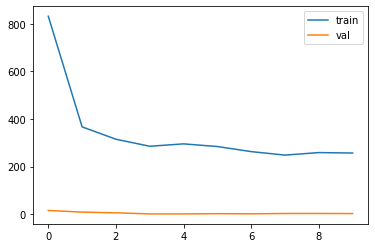

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(10.148382, 14.938126), mean=12.347002, variance=1.3107787, skewness=-0.00886151660233736, kurtosis=-1.0771656019648703)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(10.148382, 12.327023), mean=10.78938, variance=0.5264134, skewness=1.0944081544876099, kurtosis=0.13329641713599205)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


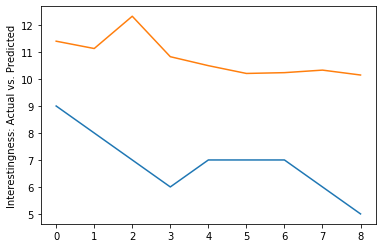

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(10.148382, 14.938126), mean=12.347002, variance=1.3107787, skewness=-0.00886151660233736, kurtosis=-1.0771656019648703)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


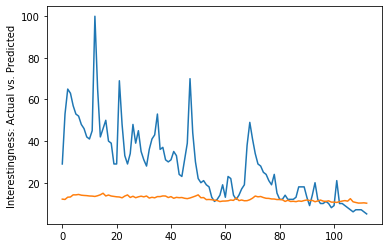

Number of nodes in the hidden layer: 250
Number of epoches: 50
Dropout proportion: 0.5
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 4.021
TEST: Mean Squared Error: 16.165
TEST: Mean Absolute Error: 3.900
TEST: Median Absolute Error: 3.496
TEST: Explained Variance: 0.214
TEST: R^2: -12.361
Number of nodes in the hidden layer: 250
Number of epoches: 50
Dropout proportion: 0.5
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 22.840
Training + Validation: Mean Squared Error: 521.656
Training + Validation: Mean Absolute Error: 16.491
Training + Validation: Median Absolute Error: 11.691
Training + Validation: Explained Variance: 0.089
Training + Validation: R^2: -0.712
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 12.11
2010-03  LSTM  2010-03                 11.96
2010-04  LSTM  2010-0

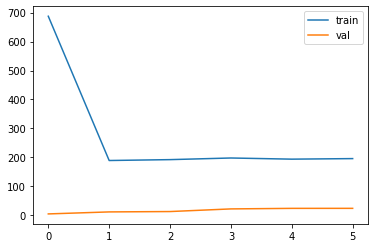

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(10.327078, 35.194275), mean=21.548988, variance=34.765495, skewness=0.0010286595206707716, kurtosis=-1.0198633529838783)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(10.327078, 17.107004), mean=12.446979, variance=6.6460686, skewness=1.143852949142456, kurtosis=-0.3944650306157218)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


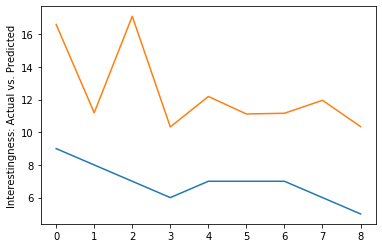

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(10.327078, 35.194275), mean=21.548988, variance=34.765495, skewness=0.0010286595206707716, kurtosis=-1.0198633529838783)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


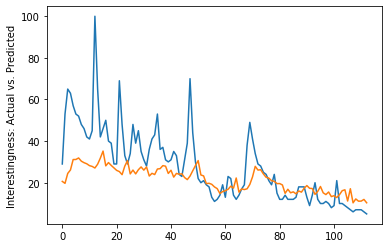

Number of nodes in the hidden layer: 250
Number of epoches: 100
Dropout proportion: 0.0
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 5.910
TEST: Mean Squared Error: 34.929
TEST: Mean Absolute Error: 5.558
TEST: Median Absolute Error: 5.192
TEST: Explained Variance: -2.336
TEST: R^2: -27.870
Number of nodes in the hidden layer: 250
Number of epoches: 100
Dropout proportion: 0.0
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 15.228
Training + Validation: Mean Squared Error: 231.882
Training + Validation: Mean Absolute Error: 10.087
Training + Validation: Median Absolute Error: 5.623
Training + Validation: Explained Variance: 0.374
Training + Validation: R^2: 0.239
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 20.62
2010-03  LSTM  2010-03                 19.69
2010-04  LSTM  2010-

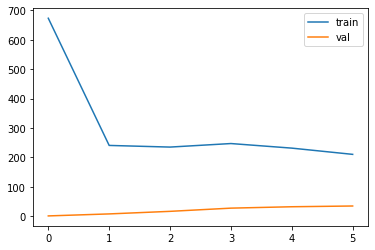

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(12.060271, 30.224604), mean=20.514524, variance=18.499664, skewness=-0.06956326216459274, kurtosis=-1.0102428780765982)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(12.060271, 18.307182), mean=13.8938465, variance=5.2683234, skewness=1.234452247619629, kurtosis=-0.21158269858733147)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


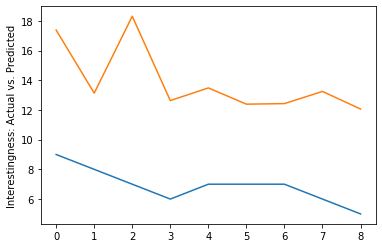

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(12.060271, 30.224604), mean=20.514524, variance=18.499664, skewness=-0.06956326216459274, kurtosis=-1.0102428780765982)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


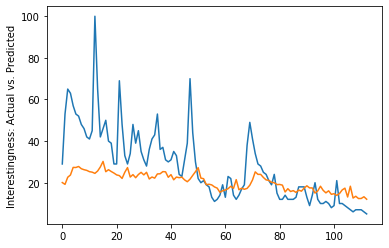

Number of nodes in the hidden layer: 250
Number of epoches: 100
Dropout proportion: 0.05
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 7.235
TEST: Mean Squared Error: 52.345
TEST: Mean Absolute Error: 7.005
TEST: Median Absolute Error: 6.629
TEST: Explained Variance: -1.707
TEST: R^2: -42.265
Number of nodes in the hidden layer: 250
Number of epoches: 100
Dropout proportion: 0.05
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 16.475
Training + Validation: Mean Squared Error: 271.435
Training + Validation: Mean Absolute Error: 11.305
Training + Validation: Median Absolute Error: 6.828
Training + Validation: Explained Variance: 0.291
Training + Validation: R^2: 0.109
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 20.07
2010-03  LSTM  2010-03                 19.20
2010-04  LSTM  201

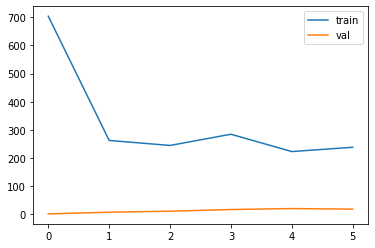

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(11.163388, 24.100853), mean=17.472507, variance=9.455107, skewness=-0.12025424093008041, kurtosis=-1.0272186308879634)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(11.163388, 16.384283), mean=12.720079, variance=3.1349626, skewness=1.2883338928222656, kurtosis=0.1332351574459305)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


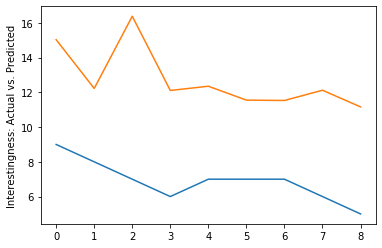

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(11.163388, 24.100853), mean=17.472507, variance=9.455107, skewness=-0.12025424093008041, kurtosis=-1.0272186308879634)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


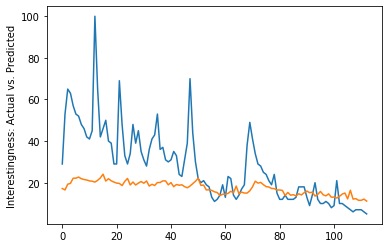

Number of nodes in the hidden layer: 250
Number of epoches: 100
Dropout proportion: 0.15
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 6.010
TEST: Mean Squared Error: 36.121
TEST: Mean Absolute Error: 5.831
TEST: Median Absolute Error: 6.034
TEST: Explained Variance: -0.751
TEST: R^2: -28.855
Number of nodes in the hidden layer: 250
Number of epoches: 100
Dropout proportion: 0.15
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 18.643
Training + Validation: Mean Squared Error: 347.557
Training + Validation: Mean Absolute Error: 12.962
Training + Validation: Median Absolute Error: 6.950
Training + Validation: Explained Variance: 0.221
Training + Validation: R^2: -0.140
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 17.21
2010-03  LSTM  2010-03                 16.52
2010-04  LSTM  20

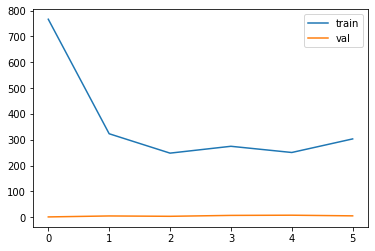

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(10.088764, 18.303827), mean=13.994958, variance=3.7646005, skewness=-0.10494540631771088, kurtosis=-1.0007300779383517)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(10.088764, 13.870244), mean=11.192306, variance=1.7159123, skewness=1.0598164796829224, kurtosis=-0.10797551175868492)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


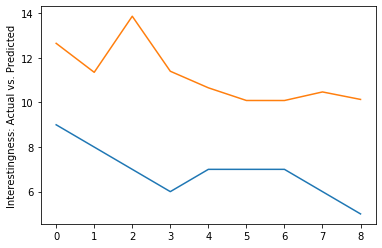

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(10.088764, 18.303827), mean=13.994958, variance=3.7646005, skewness=-0.10494540631771088, kurtosis=-1.0007300779383517)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


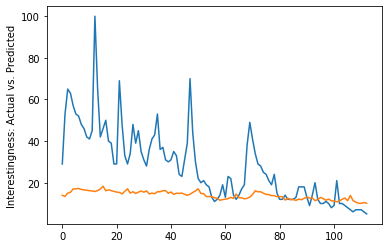

Number of nodes in the hidden layer: 250
Number of epoches: 100
Dropout proportion: 0.25
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 4.471
TEST: Mean Squared Error: 19.987
TEST: Mean Absolute Error: 4.303
TEST: Median Absolute Error: 3.659
TEST: Explained Variance: -0.213
TEST: R^2: -15.520
Number of nodes in the hidden layer: 250
Number of epoches: 100
Dropout proportion: 0.25
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 21.355
Training + Validation: Mean Squared Error: 456.055
Training + Validation: Mean Absolute Error: 15.164
Training + Validation: Median Absolute Error: 10.180
Training + Validation: Explained Variance: 0.144
Training + Validation: R^2: -0.496
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 13.95
2010-03  LSTM  2010-03                 13.41
2010-04  LSTM  2

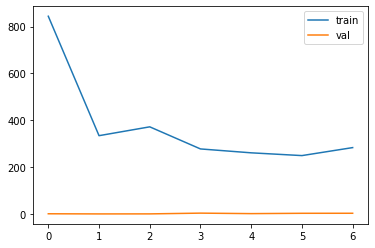

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(9.9842415, 16.845213), mean=13.303667, variance=2.504904, skewness=-0.11192267388105392, kurtosis=-0.9999129695899658)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(9.9842415, 14.257123), mean=11.164553, variance=1.8309205, skewness=1.4580053091049194, kurtosis=1.0685125062595668)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


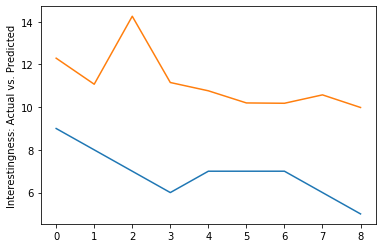

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(9.9842415, 16.845213), mean=13.303667, variance=2.504904, skewness=-0.11192267388105392, kurtosis=-0.9999129695899658)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


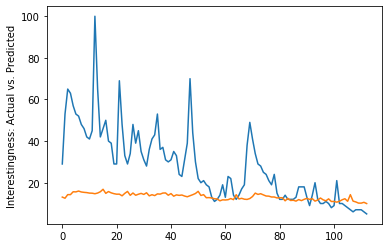

Number of nodes in the hidden layer: 250
Number of epoches: 100
Dropout proportion: 0.35
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 4.470
TEST: Mean Squared Error: 19.979
TEST: Mean Absolute Error: 4.276
TEST: Median Absolute Error: 3.766
TEST: Explained Variance: -0.404
TEST: R^2: -15.514
Number of nodes in the hidden layer: 250
Number of epoches: 100
Dropout proportion: 0.35
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 22.014
Training + Validation: Mean Squared Error: 484.614
Training + Validation: Mean Absolute Error: 15.758
Training + Validation: Median Absolute Error: 10.859
Training + Validation: Explained Variance: 0.115
Training + Validation: R^2: -0.590
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 13.09
2010-03  LSTM  2010-03                 12.54
2010-04  LSTM  2

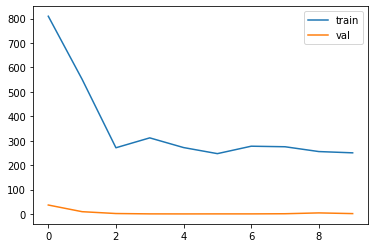

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(9.770768, 15.766462), mean=12.5865345, variance=2.0059333, skewness=-0.028347041457891464, kurtosis=-1.0456731846669853)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(9.770768, 12.409286), mean=10.603841, variance=0.7953665, skewness=1.0559877157211304, kurtosis=-0.20722180688000913)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


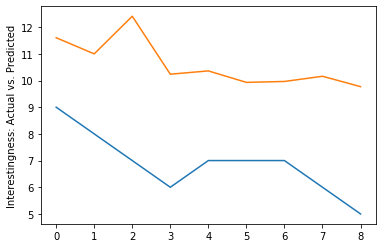

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(9.770768, 15.766462), mean=12.5865345, variance=2.0059333, skewness=-0.028347041457891464, kurtosis=-1.0456731846669853)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


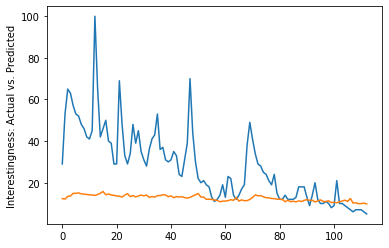

Number of nodes in the hidden layer: 250
Number of epoches: 100
Dropout proportion: 0.5
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 3.826
TEST: Mean Squared Error: 14.635
TEST: Mean Absolute Error: 3.715
TEST: Median Absolute Error: 3.360
TEST: Explained Variance: 0.311
TEST: R^2: -11.096
Number of nodes in the hidden layer: 250
Number of epoches: 100
Dropout proportion: 0.5
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 22.539
Training + Validation: Mean Squared Error: 508.006
Training + Validation: Mean Absolute Error: 16.223
Training + Validation: Median Absolute Error: 11.634
Training + Validation: Explained Variance: 0.109
Training + Validation: R^2: -0.667
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02  LSTM  2010-02                 12.37
2010-03  LSTM  2010-03                 12.14
2010-04  LSTM  2010

In [0]:
# 0. import libs
from pandas import DataFrame
import numpy as np
from numpy import array
from scipy import stats
from sklearn.metrics import explained_variance_score,r2_score,mean_squared_error,mean_absolute_error,median_absolute_error 
from tensorflow import keras
from tensorflow.keras.regularizers import L1L2  # tf.keras.regularizers.L1L2
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
from matplotlib import pyplot

# 1. funcs

# a. train, val, test split func

def timeseries_train_val_test_split(df,dcol,pcol,cols,train_end,val_end):
  "Use to create static train, val and test samples for timeseries."
  # select one stock ticker
  # df1 = df.loc[df[fcol]==fval].set_index(dcol)
  # select inputs & output
  inoutcols = cols  # ['LOGPRICE','FIRST DERIVATIVE','SECOND DERIVATIVE','THIRD DERIVATIVE','FOURTH DERIVATIVE']
  # select train, validation and test data
  df, df_train, df_val, df_test = df[inoutcols], df[:train_end] [inoutcols], df[train_end:val_end] [inoutcols], df[val_end:] [inoutcols]
  print('N size: df_train, df_val, df_test = ',len(df_train),len(df_val), len(df_test))
  print('df_test descriptives')
  print(df_test.describe().T)
  # plot train, val and test data
  plt.plot(df_train[pcol])
  plt.plot(df_val[pcol]) 
  plt.plot(df_test[pcol])
  plt.ylabel(pcol)
  plt.show()
  return df, df_train, df_val, df_test


# b. multivariate multi-step data preparation func

def df2samples(df,train_df,val_df,test_df,n_steps_in=3,n_steps_out=2):
  '''Transform stacked multivariate timeseries DataFrame to X, y arrays of sequence samples. 
  Assumes response-level dataset where each row is indexed by an id-date. 

  ***IMPORTANT: assumes the LAST column is the OUTPUT and preceeding columns are 
  FEATURES used to predict the output (e.g. ['X1','X2','X3','X4','y']).'''
  
  # a. convert dfs to np arrays
  df_ar = df.to_numpy()
  print('df_ar')
  print(stats.describe(df_ar))
  train_ar = train_df.to_numpy()
  val_ar = val_df.to_numpy() 
  test_ar = test_df.to_numpy()
  print('test_ar')
  print(stats.describe(test_ar))
  
  '''print('train array dimensions')
  print(train_ar.shape)
  print('validation array dimensions')
  print(val_ar.shape)
  print('test array dimensions')
  print(test_ar.shape)'''
  
  # b. split a multivariate array into sequence samples
  def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
      # find the end of this pattern
      end_ix = i + n_steps_in
      out_end_ix = end_ix + n_steps_out-1
      # check if we are beyond the dataset
      if out_end_ix > len(sequences):
        break
      # gather input and output parts of the pattern
      seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
      X.append(seq_x)
      y.append(seq_y)
    print('X')
    print(stats.describe(X))
    print('y')
    print(stats.describe(y))
    return array(X), array(y)
  # c. create df, train, val, test samples
  X_df, y_df = split_sequences(df_ar, n_steps_in, n_steps_out)
  X_train, y_train = split_sequences(train_ar, n_steps_in, n_steps_out)
  X_val, y_val = split_sequences(val_ar, n_steps_in, n_steps_out)
  X_test, y_test = split_sequences(test_ar, n_steps_in, n_steps_out)
  return X_df, y_df, X_train, y_train, X_val, y_val, X_test, y_test


# c. multivariate multi-step lstm

# model definition, fit, eval, predict
def model_def_fit_eval(X_df,y_df,X_train,y_train,X_val,y_val,X_test,y_test,wts_fpath,n_nodes=200,n_epochs=100,n_patience=2,dropout=.5,reg=L1L2(l1=0.0, l2=0.0)):  
  '''Define and Fit Model + Tune Hyper Parameters: n_nodes, n_epochs, n_patience'''
  
  # model define
  model = keras.Sequential([
  keras.layers.LSTM(n_nodes,activation ='relu', return_sequences=True, input_shape=(nsteps_input,nfeatures),dropout=dropout,kernel_regularizer=reg),  # dropout=dropout))
  keras.layers.LSTM(n_nodes,activation ='relu'),
  keras.layers.Dense(nsteps_output)])
  
  # model compile
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
  
  # early stopping
  early_stop = EarlyStopping(monitor='val_loss', patience=n_patience, verbose=1)
  # checkpoint
  # filepath="weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
  filepath= wts_fpath
  checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
  callbacks_list = [early_stop, checkpoint]
  
  # model fit
  history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=n_epochs,batch_size=1,verbose=1,callbacks=callbacks_list,shuffle=False)
  
  # model evaluate
  _, train_mse = model.evaluate(X_train, y_train, verbose=0)
  _, val_mse = model.evaluate(X_val, y_val, verbose=0)
  print(f'Train: {train_mse:.6f}, Validation: {val_mse:.6f}')
  
  # plot accuracy of model learning
  pyplot.plot(history.history['mean_squared_error'], label='train')
  pyplot.plot(history.history['val_mean_squared_error'], label='val')
  pyplot.legend()
  pyplot.show()
  
  # model predict df
  yhat_df = model.predict(X_df, verbose=0)
  # print('yhat_train: ', yhat_train)
  # predicted: select last step of predicted multistep output
  y_pred_df = np.asarray([x[-1] for x in yhat_df])
  print('N size: y_pred_df ', len(y_pred_df))
  print(stats.describe(y_pred_df))
  # actual: select last step of actual multistep output
  y_actual_df = np.asarray([x[-1] for x in y_df])
  print('N size: y_actual_df ', len(y_actual_df))
  print(stats.describe(y_actual_df))
  
  # model predict test (12 - 3 lags = 9 months)
  yhat_test = model.predict(X_test, verbose=0)
  # print('yhat_test: ', yhat_test)
  # predicted: select last step of predicted multistep output
  y_pred_test = np.asarray([x[-1] for x in yhat_test])
  # print('y_pred_test: ', y_pred_test)
  print('N size: y_pred_test ', len(y_pred_test))
  print(stats.describe(y_pred_test))
  # actual: select last step of actual multistep output
  y_actual_test = np.asarray([x[-1] for x in y_test])
  # print('y_actual_test: ', y_actual_test)
  print('N size: y_actual_test ', len(y_actual_test))
  print(stats.describe(y_actual_test))
  
  # plot actual & predicted y on test
  plt.plot(y_actual_test)
  plt.plot(y_pred_test)
  plt.ylabel('Interestingness: Actual vs. Predicted')
  plt.show()  
  
  # model predict df
  yhat_df = model.predict(X_df, verbose=0)
  # print('yhat_train: ', yhat_train)
  # predicted: select last step of predicted multistep output
  y_pred_df = np.asarray([x[-1] for x in yhat_df])
  print('N size: y_pred_df ', len(y_pred_df))
  print(stats.describe(y_pred_df))
  # actual: select last step of actual multistep output
  y_actual_df = np.asarray([x[-1] for x in y_df])
  print('N size: y_actual_df ', len(y_actual_df))
  print(stats.describe(y_actual_df))
  
  # plot actual & predicted y on df
  plt.plot(y_actual_df)
  plt.plot(y_pred_df)
  plt.ylabel('Interestingness: Actual vs. Predicted')
  plt.show()
  
  # e. model performance metrics

  # print hyper parameter values
  print(f'Number of nodes in the hidden layer: {n_nodes}')
  print(f'Number of epoches: {n_epochs}')
  print(f'Dropout proportion: {dropout}')
  # print(f'L1L2 regularization: {reg}')
  print(f'Patience: Number of epochs before early stop: {n_patience}')
  
  # test
  "Use weights from best model to predict test sample."
  # import error metrics from sklearn
  from sklearn.metrics import explained_variance_score,r2_score,mean_squared_error,mean_absolute_error,median_absolute_error
  # compute root mean squared error of predictions
  rmse = np.sqrt(np.mean(np.square((y_actual_test - y_pred_test)),axis=0))
  print(f'TEST: Root Mean Squared Error: {rmse:.3f}')
  # compute mean squared error
  mae = mean_squared_error(y_actual_test, y_pred_test)
  print(f'TEST: Mean Squared Error: {mae:.3f}')
  # compute mean absolute error
  mae = mean_absolute_error(y_actual_test, y_pred_test)
  print(f'TEST: Mean Absolute Error: {mae:.3f}')
  # compute median absolute error
  mdae = median_absolute_error(y_actual_test, y_pred_test)
  print(f'TEST: Median Absolute Error: {mdae:.3f}')
  # compute explained_variance_score
  evar = explained_variance_score(y_actual_test, y_pred_test)
  print(f'TEST: Explained Variance: {evar:.3f}')
  # compute R2
  r2 = r2_score(y_actual_test, y_pred_test)
  print(f'TEST: R^2: {r2:.3f}')
  
  # print hyper parameter values
  print(f'Number of nodes in the hidden layer: {n_nodes}')
  print(f'Number of epoches: {n_epochs}')
  print(f'Dropout proportion: {dropout}')
  # print(f'L1L2 regularization: {reg}')
  print(f'Patience: Number of epochs before early stop: {n_patience}')

  # df
  "Use weights from best model to predict test sample."
  # import error metrics from sklearn
  from sklearn.metrics import explained_variance_score,r2_score,mean_squared_error,mean_absolute_error,median_absolute_error
  # compute root mean squared error of predictions
  rmse = np.sqrt(np.mean(np.square((y_actual_df - y_pred_df)),axis=0))
  print(f'Training + Validation: Root Mean Squared Error: {rmse:.3f}')
  # compute mean squared error
  mae = mean_squared_error(y_actual_df, y_pred_df)
  print(f'Training + Validation: Mean Squared Error: {mae:.3f}')
  # compute mean absolute error
  mae = mean_absolute_error(y_actual_df, y_pred_df)
  print(f'Training + Validation: Mean Absolute Error: {mae:.3f}')
  # compute median absolute error
  mdae = median_absolute_error(y_actual_df, y_pred_df)
  print(f'Training + Validation: Median Absolute Error: {mdae:.3f}')
  # compute explained_variance_score
  evar = explained_variance_score(y_actual_df, y_pred_df)
  print(f'Training + Validation: Explained Variance: {evar:.3f}')
  # compute R2
  r2 = r2_score(y_actual_df, y_pred_df)
  print(f'Training + Validation: R^2: {r2:.3f}')
  
  # export results to csv
  
  # dfs - Tom needs predictions on all 12 mths of the test data for analysis
  # df_actual_train = pd.DataFrame(y_actual_train)
  df_pred_df = pd.DataFrame(y_pred_df)
  # labels
  df_date_df = pd.DataFrame(df.index[-113:])
  # df_ticker_train = pd.DataFrame([ticker]*172) 
  df_model_type_df = pd.DataFrame([model_type]*113)
  # df_sample_type_df = pd.DataFrame(['all']*113)
  # concatenate y actual pred arrays
  df_pred_df = pd.concat((df_model_type_df,df_date_df,df_pred_df), axis=1)
  # update column names
  df_pred_df.columns = ['MODEL','DATE','Pred_Interestingness']
  # Set index
  df_pred_df.set_index('DATE', inplace=True, drop=False)
  # check pred data
  print(f'Training + Validation: df_pred_df N size: {len(df_pred_df)}')
  print(df_pred_df.head())
  print(df_pred_df.tail())
  print(df_pred_df.describe().T)
  
  # test sample last 12 mnths for Tom analysis
  df_pred_test_12mth = df_pred_df['2018-07': '2019-06']
  print(f'TEST 12 months: df_pred_test_12mth N size: {len(df_pred_test_12mth)}')
  print(df_pred_test_12mth.head())
  print(df_pred_test_12mth.tail())
  print(df_pred_test_12mth.describe().T)
  
  # train sample for Tom analysis
  df_pred_train_val = df_pred_df[: '2018-06']
  print(f'Train + Validation samples: df_pred_train_val N size: {len(df_pred_train_val)}')
  print(df_pred_train_val.head())
  print(df_pred_train_val.tail())
  print(df_pred_train_val.describe().T)

  # create file name for csv
  fname_train_val = 'interestingness_train_val_' +  model_type + '.csv'
  fname_test = 'interestingness_test_12mths_' +  model_type + '.csv'
  
  # write df to csv
  df_pred_train_val.to_csv(fname_train_val)
  df_pred_test_12mth.to_csv(fname_test)
  
  return df_pred_train_val,df_pred_test_12mth,fname_train_val,fname_test


# 2. set parameters 
df = iscore
# fcol = 'TICKER'
# fval = 'EBAY' - replace with t in loop
dcol  = 'DATE'
pcol = 'DEPENDENT VARIABLE'
cols = ['FIRST','SECOND','THIRD','FOURTH','DEPENDENT VARIABLE']
train_end = 96
val_end = 104

# set model_type for output file
model_type = 'LSTM'

# number INPUT STEPS
nsteps_input = 3
print(f'Number of input time steps: {nsteps_input}')
# number OUTPUT STEPS
nsteps_output = 2
print(f'Number of output time steps: {nsteps_output}')
# number FEATURES
nfeatures = 4
print(f'Number Model of Features: {nfeatures}')

# 3. run program
if __name__ == '__main__':
  """Create train, validation and test dfs."""
  # i. create train, val, test dfs
  df,train_df,val_df,test_df = timeseries_train_val_test_split(df,dcol,pcol,cols,train_end,val_end)
  print(f'Training + Validation df N size: {len(df)}')
  print(f'train_df N size: {len(train_df)}')
  print(f'val_df N size: {len(val_df)}')
  print(f'test_df N size: {len(test_df)}')

  """Create and summarize samples."""
  # ii. train, val, test dfs to samples
  # df2samples(df,train_df,val_df,test_df,n_steps_in=3,n_steps_out=2)
  X_df,y_df,X_train,y_train,X_val,y_val,X_test,y_test = df2samples(df,train_df,val_df,test_df,nsteps_input,nsteps_output)
  # summarize df SAMPLES
  print(f'Shape of input/output samples: X_train {X_df.shape}, y_train {y_df.shape}')
  # summarize TRAIN SAMPLES
  print(f'Shape of input/output samples: X_train {X_train.shape}, y_train {y_train.shape}')
  # summarize VAL SAMPLES
  print(f'Shape of input/output samples: X_val {X_val.shape}, y_val {y_val.shape}')
  # summarize TEST SAMPLES
  print(f'Shape of input/output samples: X_test {X_test.shape}, y_test {y_test.shape}') 

  # iii. file path for weights
  wts_fpath = "weights.best_lstm.hdf5"

  # iv. hyper parameter combos
  nodes_n = [150, 200, 250]
  epochs_e = [50,100]  # [200,400]
  patience_p = 5  # [3,4,5]
  dropout_d = [0.0, 0.05, 0.15, 0.25, 0.35, 0.5]
  _l1, _l2 = 0.0, 0.000001  # elasticnet setting is 0.01, 0.01
  reg_r = L1L2(l1=_l1, l2=_l2)
  # TRY L1L2(l1=0.1, l2=0.01)
  # reg_r = [L1L2(l1=0.0, l2=0.0), L1L2(l1=0.01, l2=0.0), L1L2(l1=0.0, l2=0.01), L1L2(l1=0.01, l2=0.01)]  # error when l2=0.0

  # v. run model - use list comp for list of floats
  # use tuple for multiple actions in list comp. e.g. [(print("bla1"), print("bla2")) for i in list]
  [(print(f'nodes: {n} epochs: {e} patience: {patience_p} dropout: {d} l1: {_l1} l2: {_l2}'), model_def_fit_eval(X_df,y_df,X_train,y_train,X_val,y_val,X_test,y_test,wts_fpath,n_nodes=n,n_epochs=e,n_patience=patience_p,dropout=d,reg=reg_r)) for n in nodes_n for e in epochs_e for d in dropout_d]                             
      


## Interestingness: Multivariate - Multi step MLP
### with Early Stopping Callbacks, Dropout, L1L2 Regularization, Test sample validation

Number of input time steps: 3
Number of output time steps: 2
Number Model of Features: 4
N size: df_train, df_val, df_test =  96 8 12
df_test descriptives
                    count  mean  std  min  25%  50%  75%   max
FIRST               12.00  1.33 0.32 1.03 1.17 1.28 1.36  2.26
SECOND              12.00  1.34 0.34 0.86 1.17 1.27 1.38  2.20
THIRD               12.00  1.34 0.46 0.59 1.12 1.24 1.41  2.35
FOURTH              12.00  1.34 0.77 0.20 0.99 1.25 1.64  3.23
DEPENDENT VARIABLE  12.00  8.58 4.21 5.00 6.75 7.00 9.25 21.00


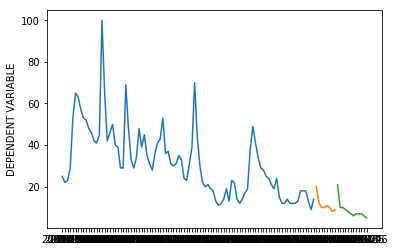

Training + Validation df N size: 116
train_df N size: 96
val_df N size: 8
test_df N size: 12
df_ar
DescribeResult(nobs=116, minmax=(array([1.03, 0.86, 0.59, 0.2 , 5.  ]), array([  3.27,   3.24,   3.21,   3.23, 100.  ])), mean=array([ 2.00646552,  2.00827586,  2.01017241,  2.00732759, 27.84482759]), variance=array([2.22163921e-01, 2.10181349e-01, 2.31893883e-01, 3.29544970e-01,
       3.00045277e+02]), skewness=array([-0.00737649, -0.10668086, -0.2243031 , -0.25835772,  1.06985962]), kurtosis=array([-0.63291545, -0.47115139, -0.35787631,  0.19172126,  1.51133578]))
test_ar
DescribeResult(nobs=12, minmax=(array([1.03, 0.86, 0.59, 0.2 , 5.  ]), array([ 2.26,  2.2 ,  2.35,  3.23, 21.  ])), mean=array([1.3325    , 1.345     , 1.3425    , 1.345     , 8.58333333]), variance=array([ 0.09971136,  0.11799091,  0.21431136,  0.58542727, 17.71969697]), skewness=array([2.26520243, 1.28418209, 0.84943205, 0.97066412, 2.32127308]), kurtosis=array([4.50898871, 1.4380625 , 0.49591114, 1.35540753, 4.5983

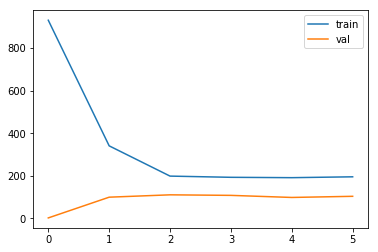

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.780185, 35.20351), mean=26.2514, variance=27.195232, skewness=-0.15595921874046326, kurtosis=-1.1304906489872324)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(15.780185, 21.38795), mean=17.553303, variance=3.4790964, skewness=1.2020022869110107, kurtosis=0.05340368057980305)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


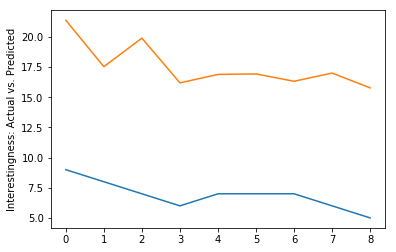

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.780185, 35.20351), mean=26.2514, variance=27.195232, skewness=-0.15595921874046326, kurtosis=-1.1304906489872324)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


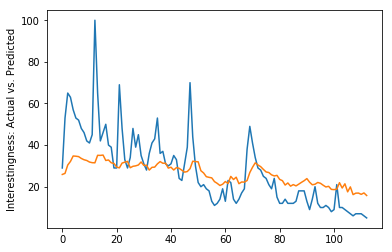

Number of nodes in the hidden layer: 150
Number of epoches: 50
Dropout proportion: 0.0
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 10.729
TEST: Mean Squared Error: 115.121
TEST: Mean Absolute Error: 10.664
TEST: Median Absolute Error: 10.198
TEST: Explained Variance: -0.150
TEST: R^2: -94.151
Number of nodes in the hidden layer: 150
Number of epoches: 50
Dropout proportion: 0.0
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 13.850
Training + Validation: Mean Squared Error: 191.812
Training + Validation: Mean Absolute Error: 10.174
Training + Validation: Median Absolute Error: 9.328
Training + Validation: Explained Variance: 0.380
Training + Validation: R^2: 0.371
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 25.89
2010-03   MLP  2010-03                 26.39
2010-04   MLP  201

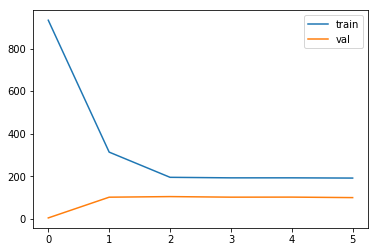

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.601317, 35.53828), mean=26.131472, variance=27.234722, skewness=-0.1651887744665146, kurtosis=-1.111154540503799)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(15.601317, 22.034716), mean=17.46299, variance=4.1929035, skewness=1.4289915561676025, kurtosis=0.7982050123993658)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


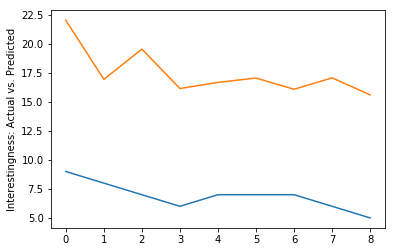

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.601317, 35.53828), mean=26.131472, variance=27.234722, skewness=-0.1651887744665146, kurtosis=-1.111154540503799)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


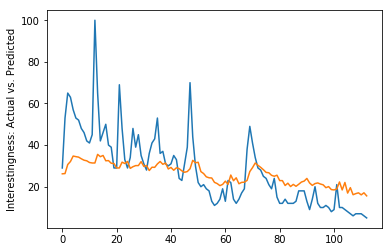

Number of nodes in the hidden layer: 150
Number of epoches: 50
Dropout proportion: 0.05
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 10.660
TEST: Mean Squared Error: 113.627
TEST: Mean Absolute Error: 10.574
TEST: Median Absolute Error: 10.151
TEST: Explained Variance: -0.500
TEST: R^2: -92.916
Number of nodes in the hidden layer: 150
Number of epoches: 50
Dropout proportion: 0.05
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 13.818
Training + Validation: Mean Squared Error: 190.948
Training + Validation: Mean Absolute Error: 10.133
Training + Validation: Median Absolute Error: 8.941
Training + Validation: Explained Variance: 0.384
Training + Validation: R^2: 0.373
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 26.20
2010-03   MLP  2010-03                 26.31
2010-04   MLP  2

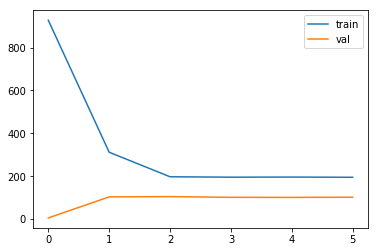

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.866488, 35.40734), mean=26.20186, variance=26.901999, skewness=-0.15308211743831635, kurtosis=-1.1321623374881729)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(15.866488, 22.08165), mean=17.626263, variance=3.8804266, skewness=1.4557664394378662, kurtosis=0.9370686965803681)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


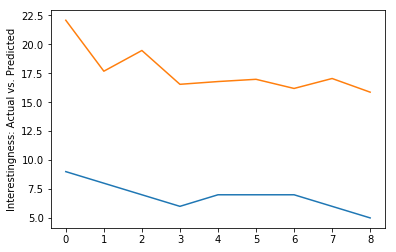

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.866488, 35.40734), mean=26.20186, variance=26.901999, skewness=-0.15308211743831635, kurtosis=-1.1321623374881729)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


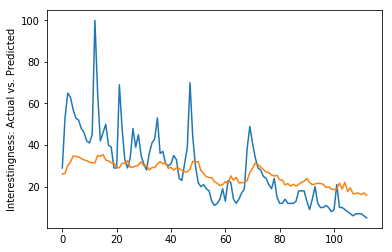

Number of nodes in the hidden layer: 150
Number of epoches: 50
Dropout proportion: 0.15
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 10.808
TEST: Mean Squared Error: 116.808
TEST: Mean Absolute Error: 10.737
TEST: Median Absolute Error: 10.546
TEST: Explained Variance: -0.253
TEST: R^2: -95.545
Number of nodes in the hidden layer: 150
Number of epoches: 50
Dropout proportion: 0.15
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 13.892
Training + Validation: Mean Squared Error: 192.976
Training + Validation: Mean Absolute Error: 10.203
Training + Validation: Median Absolute Error: 9.144
Training + Validation: Explained Variance: 0.377
Training + Validation: R^2: 0.367
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 26.16
2010-03   MLP  2010-03                 26.32
2010-04   MLP  2

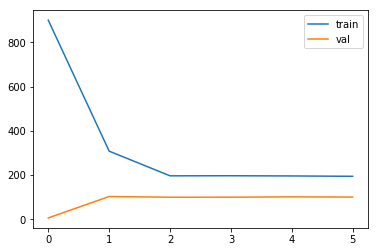

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.404449, 35.816917), mean=26.170805, variance=27.291336, skewness=-0.17723719775676727, kurtosis=-1.0655310962241977)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(15.404449, 22.502026), mean=17.547905, variance=6.0283985, skewness=1.2088298797607422, kurtosis=-0.057882142868084685)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


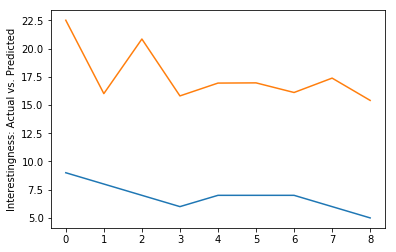

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.404449, 35.816917), mean=26.170805, variance=27.291336, skewness=-0.17723719775676727, kurtosis=-1.0655310962241977)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


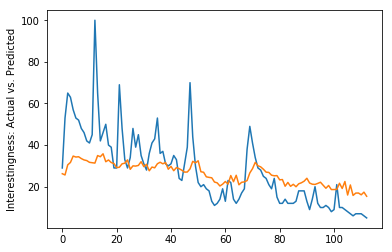

Number of nodes in the hidden layer: 150
Number of epoches: 50
Dropout proportion: 0.25
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 10.814
TEST: Mean Squared Error: 116.946
TEST: Mean Absolute Error: 10.659
TEST: Median Absolute Error: 9.957
TEST: Explained Variance: -1.753
TEST: R^2: -95.659
Number of nodes in the hidden layer: 150
Number of epoches: 50
Dropout proportion: 0.25
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 13.910
Training + Validation: Mean Squared Error: 193.493
Training + Validation: Mean Absolute Error: 10.221
Training + Validation: Median Absolute Error: 9.105
Training + Validation: Explained Variance: 0.376
Training + Validation: R^2: 0.365
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 26.24
2010-03   MLP  2010-03                 25.64
2010-04   MLP  20

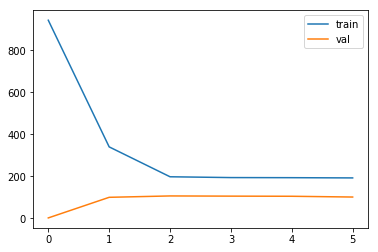

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.883554, 35.19965), mean=26.271822, variance=27.142471, skewness=-0.1511870175600052, kurtosis=-1.1419538365905049)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(15.883554, 21.21284), mean=17.556973, variance=2.9364028, skewness=1.213061809539795, kurtosis=0.27853536315515504)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


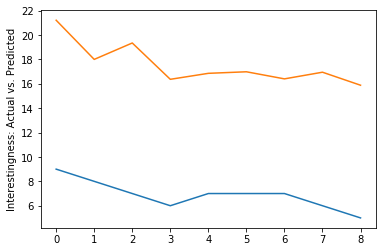

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.883554, 35.19965), mean=26.271822, variance=27.142471, skewness=-0.1511870175600052, kurtosis=-1.1419538365905049)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


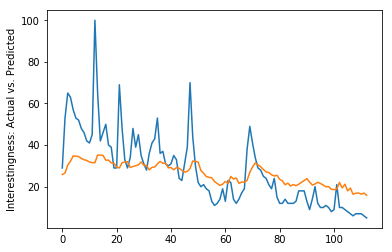

Number of nodes in the hidden layer: 150
Number of epoches: 50
Dropout proportion: 0.35
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 10.713
TEST: Mean Squared Error: 114.762
TEST: Mean Absolute Error: 10.668
TEST: Median Absolute Error: 10.368
TEST: Explained Variance: 0.212
TEST: R^2: -93.854
Number of nodes in the hidden layer: 150
Number of epoches: 50
Dropout proportion: 0.35
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 13.834
Training + Validation: Mean Squared Error: 191.384
Training + Validation: Mean Absolute Error: 10.163
Training + Validation: Median Absolute Error: 9.393
Training + Validation: Explained Variance: 0.381
Training + Validation: R^2: 0.372
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 25.88
2010-03   MLP  2010-03                 26.54
2010-04   MLP  20

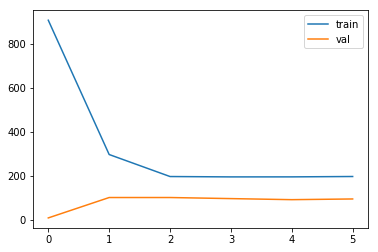

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.362985, 34.549583), mean=25.671324, variance=26.191525, skewness=-0.15781502425670624, kurtosis=-1.1213781794494584)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(15.362985, 21.326208), mean=17.162392, variance=3.7895231, skewness=1.3136186599731445, kurtosis=0.3722234508805822)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


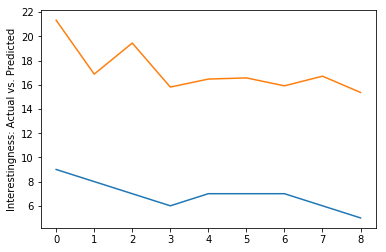

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.362985, 34.549583), mean=25.671324, variance=26.191525, skewness=-0.15781502425670624, kurtosis=-1.1213781794494584)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


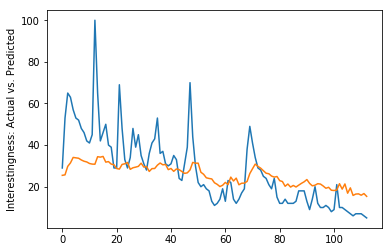

Number of nodes in the hidden layer: 150
Number of epoches: 50
Dropout proportion: 0.5
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 10.351
TEST: Mean Squared Error: 107.134
TEST: Mean Absolute Error: 10.274
TEST: Median Absolute Error: 9.807
TEST: Explained Variance: -0.313
TEST: R^2: -87.549
Number of nodes in the hidden layer: 150
Number of epoches: 50
Dropout proportion: 0.5
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 13.994
Training + Validation: Mean Squared Error: 195.826
Training + Validation: Mean Absolute Error: 10.163
Training + Validation: Median Absolute Error: 8.877
Training + Validation: Explained Variance: 0.375
Training + Validation: R^2: 0.357
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 25.46
2010-03   MLP  2010-03                 25.70
2010-04   MLP  2010

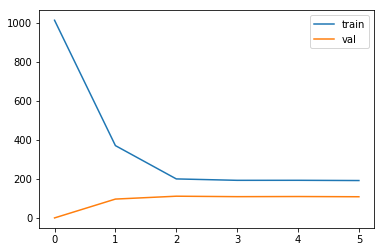

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(16.035284, 36.056118), mean=26.718052, variance=27.978354, skewness=-0.16137389838695526, kurtosis=-1.1160943387066304)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(16.035284, 22.336998), mean=17.918192, variance=4.2307386, skewness=1.3413081169128418, kurtosis=0.4168323488967287)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


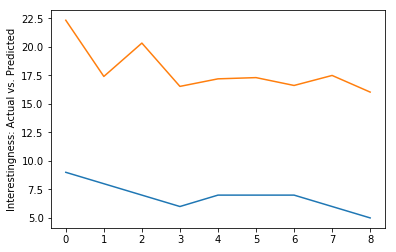

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(16.035284, 36.056118), mean=26.718052, variance=27.978354, skewness=-0.16137389838695526, kurtosis=-1.1160943387066304)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


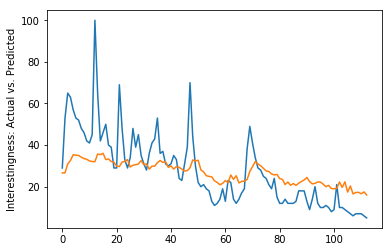

Number of nodes in the hidden layer: 150
Number of epoches: 100
Dropout proportion: 0.0
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 11.114
TEST: Mean Squared Error: 123.527
TEST: Mean Absolute Error: 11.029
TEST: Median Absolute Error: 10.535
TEST: Explained Variance: -0.555
TEST: R^2: -101.099
Number of nodes in the hidden layer: 150
Number of epoches: 100
Dropout proportion: 0.0
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 13.768
Training + Validation: Mean Squared Error: 189.547
Training + Validation: Mean Absolute Error: 10.213
Training + Validation: Median Absolute Error: 9.408
Training + Validation: Explained Variance: 0.383
Training + Validation: R^2: 0.378
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 26.59
2010-03   MLP  2010-03                 26.65
2010-04   MLP  

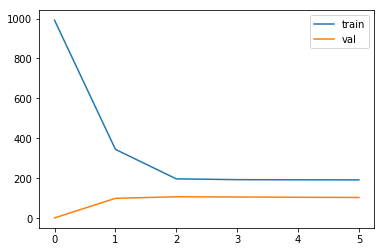

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(16.00589, 35.488644), mean=26.397285, variance=27.42863, skewness=-0.15133675932884216, kurtosis=-1.1472424283290636)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(16.00589, 21.196358), mean=17.616005, variance=2.697153, skewness=1.276417851448059, kurtosis=0.4874548390074942)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


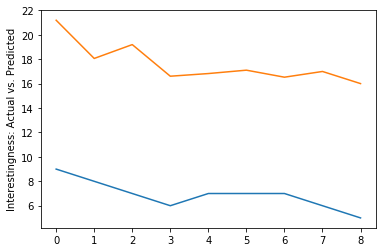

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(16.00589, 35.488644), mean=26.397285, variance=27.42863, skewness=-0.15133675932884216, kurtosis=-1.1472424283290636)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


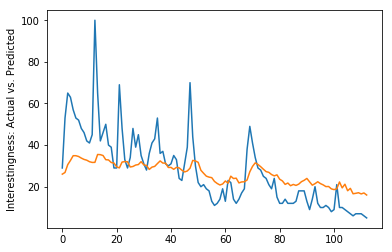

Number of nodes in the hidden layer: 150
Number of epoches: 100
Dropout proportion: 0.05
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 10.766
TEST: Mean Squared Error: 115.911
TEST: Mean Absolute Error: 10.727
TEST: Median Absolute Error: 10.610
TEST: Explained Variance: 0.306
TEST: R^2: -94.804
Number of nodes in the hidden layer: 150
Number of epoches: 100
Dropout proportion: 0.05
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 13.780
Training + Validation: Mean Squared Error: 189.887
Training + Validation: Mean Absolute Error: 10.142
Training + Validation: Median Absolute Error: 9.262
Training + Validation: Explained Variance: 0.385
Training + Validation: R^2: 0.377
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 26.03
2010-03   MLP  2010-03                 26.83
2010-04   MLP  

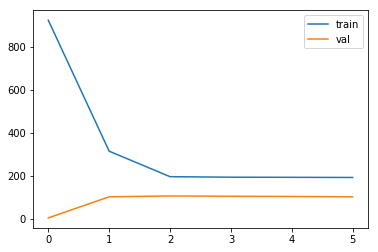

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.94557, 35.413494), mean=26.312277, variance=27.16384, skewness=-0.15286974608898163, kurtosis=-1.1470527031043956)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(15.94557, 21.315998), mean=17.616371, variance=2.9274664, skewness=1.2187398672103882, kurtosis=0.35993195401212796)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


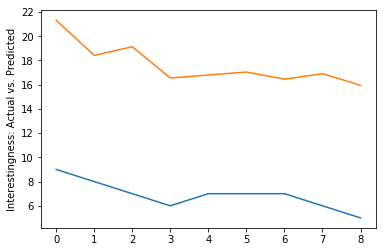

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.94557, 35.413494), mean=26.312277, variance=27.16384, skewness=-0.15286974608898163, kurtosis=-1.1470527031043956)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


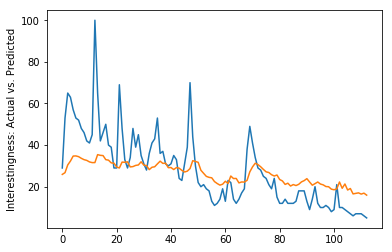

Number of nodes in the hidden layer: 150
Number of epoches: 100
Dropout proportion: 0.15
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 10.767
TEST: Mean Squared Error: 115.931
TEST: Mean Absolute Error: 10.727
TEST: Median Absolute Error: 10.546
TEST: Explained Variance: 0.296
TEST: R^2: -94.820
Number of nodes in the hidden layer: 150
Number of epoches: 100
Dropout proportion: 0.15
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 13.811
Training + Validation: Mean Squared Error: 190.731
Training + Validation: Mean Absolute Error: 10.156
Training + Validation: Median Absolute Error: 9.244
Training + Validation: Explained Variance: 0.383
Training + Validation: R^2: 0.374
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 25.91
2010-03   MLP  2010-03                 26.74
2010-04   MLP  

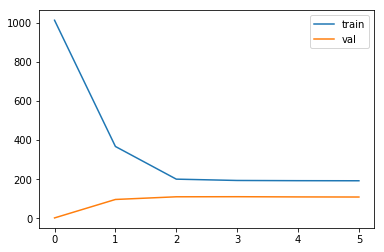

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.870965, 35.690975), mean=26.490263, variance=27.657497, skewness=-0.15941931307315826, kurtosis=-1.1143462860630489)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(15.870965, 22.369648), mean=17.771126, variance=4.3466454, skewness=1.4082610607147217, kurtosis=0.6686560873761946)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


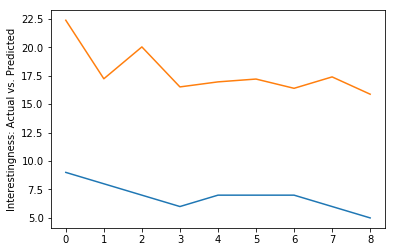

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.870965, 35.690975), mean=26.490263, variance=27.657497, skewness=-0.15941931307315826, kurtosis=-1.1143462860630489)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


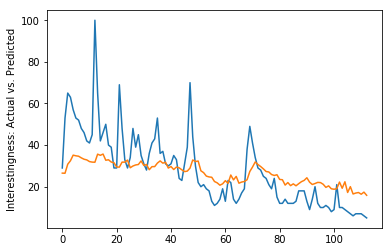

Number of nodes in the hidden layer: 150
Number of epoches: 100
Dropout proportion: 0.25
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 10.971
TEST: Mean Squared Error: 120.365
TEST: Mean Absolute Error: 10.882
TEST: Median Absolute Error: 10.511
TEST: Explained Variance: -0.605
TEST: R^2: -98.485
Number of nodes in the hidden layer: 150
Number of epoches: 100
Dropout proportion: 0.25
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 13.787
Training + Validation: Mean Squared Error: 190.087
Training + Validation: Mean Absolute Error: 10.183
Training + Validation: Median Absolute Error: 9.227
Training + Validation: Explained Variance: 0.383
Training + Validation: R^2: 0.376
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 26.53
2010-03   MLP  2010-03                 26.47
2010-04   MLP 

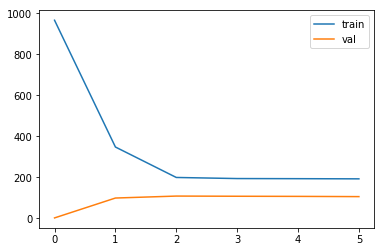

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.85708, 35.877144), mean=26.581825, variance=27.689089, skewness=-0.1704651415348053, kurtosis=-1.104384923916563)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(15.85708, 22.272532), mean=17.836988, variance=4.637136, skewness=1.2325737476348877, kurtosis=0.0908612011234946)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


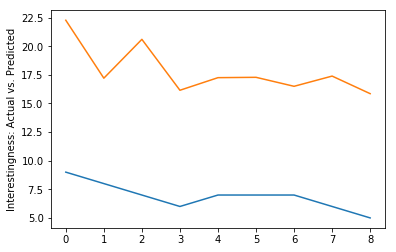

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.85708, 35.877144), mean=26.581825, variance=27.689089, skewness=-0.1704651415348053, kurtosis=-1.104384923916563)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


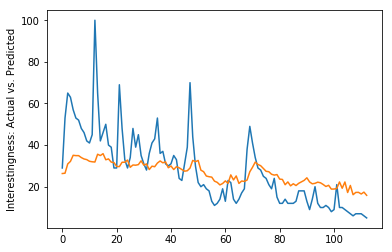

Number of nodes in the hidden layer: 150
Number of epoches: 100
Dropout proportion: 0.35
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 11.046
TEST: Mean Squared Error: 122.008
TEST: Mean Absolute Error: 10.948
TEST: Median Absolute Error: 10.286
TEST: Explained Variance: -0.775
TEST: R^2: -99.843
Number of nodes in the hidden layer: 150
Number of epoches: 100
Dropout proportion: 0.35
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 13.796
Training + Validation: Mean Squared Error: 190.337
Training + Validation: Mean Absolute Error: 10.220
Training + Validation: Median Absolute Error: 9.211
Training + Validation: Explained Variance: 0.382
Training + Validation: R^2: 0.375
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 26.33
2010-03   MLP  2010-03                 26.48
2010-04   MLP 

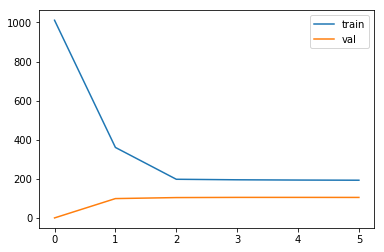

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.80513, 35.70091), mean=26.380789, variance=27.42679, skewness=-0.16307485103607178, kurtosis=-1.1044185704490739)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(15.80513, 22.671614), mean=17.743263, variance=4.975164, skewness=1.419624924659729, kurtosis=0.6823640383394021)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


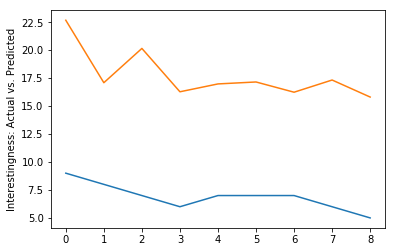

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.80513, 35.70091), mean=26.380789, variance=27.42679, skewness=-0.16307485103607178, kurtosis=-1.1044185704490739)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


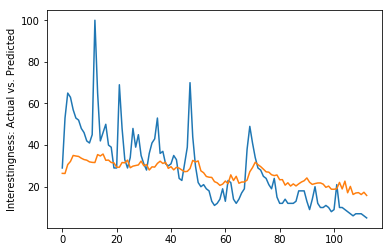

Number of nodes in the hidden layer: 150
Number of epoches: 100
Dropout proportion: 0.5
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 10.960
TEST: Mean Squared Error: 120.125
TEST: Mean Absolute Error: 10.854
TEST: Median Absolute Error: 10.276
TEST: Explained Variance: -0.908
TEST: R^2: -98.287
Number of nodes in the hidden layer: 150
Number of epoches: 100
Dropout proportion: 0.5
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 13.830
Training + Validation: Mean Squared Error: 191.267
Training + Validation: Mean Absolute Error: 10.198
Training + Validation: Median Absolute Error: 9.053
Training + Validation: Explained Variance: 0.381
Training + Validation: R^2: 0.372
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 26.41
2010-03   MLP  2010-03                 26.36
2010-04   MLP  2

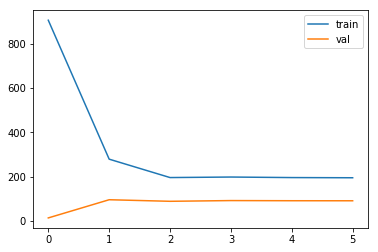

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.203484, 34.265736), mean=25.379677, variance=25.508183, skewness=-0.15660926699638367, kurtosis=-1.1320557419320258)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(15.203484, 20.848059), mean=16.977652, variance=3.2914298, skewness=1.256900429725647, kurtosis=0.3239484037287981)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


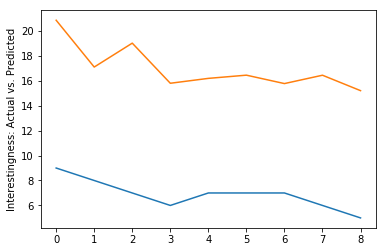

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.203484, 34.265736), mean=25.379677, variance=25.508183, skewness=-0.15660926699638367, kurtosis=-1.1320557419320258)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


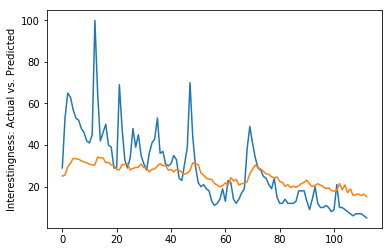

Number of nodes in the hidden layer: 200
Number of epoches: 50
Dropout proportion: 0.0
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 10.149
TEST: Mean Squared Error: 103.002
TEST: Mean Absolute Error: 10.089
TEST: Median Absolute Error: 9.796
TEST: Explained Variance: -0.007
TEST: R^2: -84.134
Number of nodes in the hidden layer: 200
Number of epoches: 50
Dropout proportion: 0.0
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 14.051
Training + Validation: Mean Squared Error: 197.435
Training + Validation: Mean Absolute Error: 10.149
Training + Validation: Median Absolute Error: 8.771
Training + Validation: Explained Variance: 0.374
Training + Validation: R^2: 0.352
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 25.13
2010-03   MLP  2010-03                 25.58
2010-04   MLP  2010

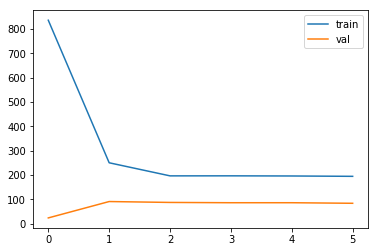

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(14.976946, 33.937542), mean=25.085804, variance=25.106293, skewness=-0.16076220571994781, kurtosis=-1.1192125442328924)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(14.976946, 20.95616), mean=16.760138, variance=3.6884353, skewness=1.3596147298812866, kurtosis=0.5685022647797568)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


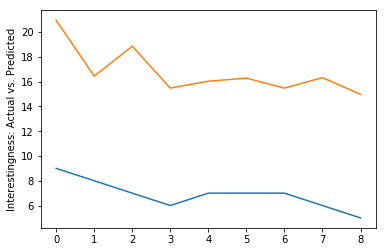

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(14.976946, 33.937542), mean=25.085804, variance=25.106293, skewness=-0.16076220571994781, kurtosis=-1.1192125442328924)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


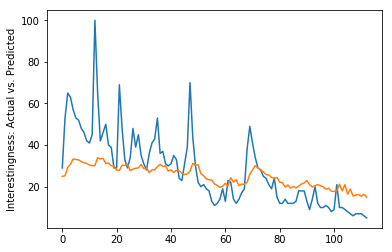

Number of nodes in the hidden layer: 200
Number of epoches: 50
Dropout proportion: 0.05
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 9.948
TEST: Mean Squared Error: 98.962
TEST: Mean Absolute Error: 9.871
TEST: Median Absolute Error: 9.483
TEST: Explained Variance: -0.256
TEST: R^2: -80.795
Number of nodes in the hidden layer: 200
Number of epoches: 50
Dropout proportion: 0.05
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 14.139
Training + Validation: Mean Squared Error: 199.903
Training + Validation: Mean Absolute Error: 10.151
Training + Validation: Median Absolute Error: 8.650
Training + Validation: Explained Variance: 0.371
Training + Validation: R^2: 0.344
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 24.96
2010-03   MLP  2010-03                 25.23
2010-04   MLP  2010-

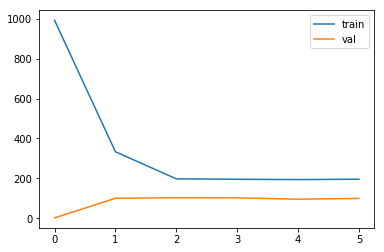

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.676542, 34.879555), mean=26.09691, variance=26.629208, skewness=-0.15769629180431366, kurtosis=-1.1289143317544135)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(15.676542, 21.259455), mean=17.51142, variance=3.5575764, skewness=1.0986522436141968, kurtosis=-0.17797896790651846)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


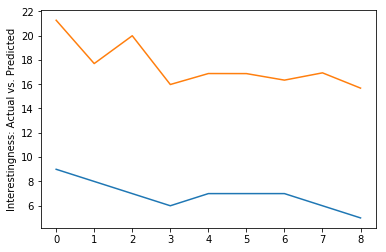

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.676542, 34.879555), mean=26.09691, variance=26.629208, skewness=-0.15769629180431366, kurtosis=-1.1289143317544135)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


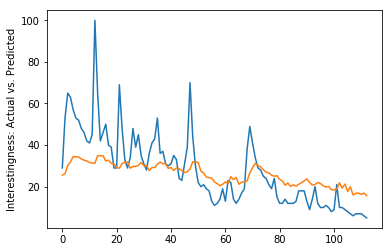

Number of nodes in the hidden layer: 200
Number of epoches: 50
Dropout proportion: 0.15
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 10.687
TEST: Mean Squared Error: 114.218
TEST: Mean Absolute Error: 10.623
TEST: Median Absolute Error: 9.974
TEST: Explained Variance: -0.140
TEST: R^2: -93.404
Number of nodes in the hidden layer: 200
Number of epoches: 50
Dropout proportion: 0.15
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 13.901
Training + Validation: Mean Squared Error: 193.237
Training + Validation: Mean Absolute Error: 10.185
Training + Validation: Median Absolute Error: 9.334
Training + Validation: Explained Variance: 0.377
Training + Validation: R^2: 0.366
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 25.59
2010-03   MLP  2010-03                 26.18
2010-04   MLP  20

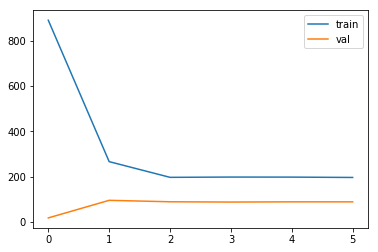

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.083189, 34.023884), mean=25.135998, variance=25.105145, skewness=-0.15766511857509613, kurtosis=-1.1273216583865902)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(15.083189, 21.007803), mean=16.816046, variance=3.4939103, skewness=1.4218894243240356, kurtosis=0.8412600352992419)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


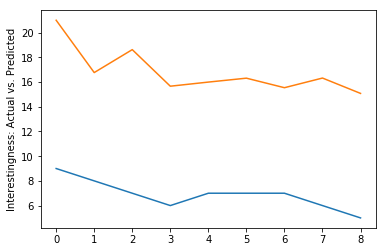

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.083189, 34.023884), mean=25.135998, variance=25.105145, skewness=-0.15766511857509613, kurtosis=-1.1273216583865902)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


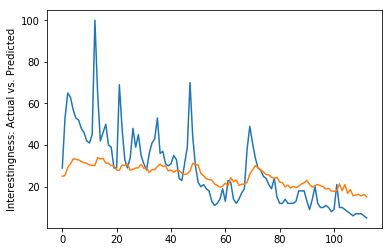

Number of nodes in the hidden layer: 200
Number of epoches: 50
Dropout proportion: 0.25
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 9.994
TEST: Mean Squared Error: 99.877
TEST: Mean Absolute Error: 9.927
TEST: Median Absolute Error: 9.667
TEST: Explained Variance: -0.098
TEST: R^2: -81.551
Number of nodes in the hidden layer: 200
Number of epoches: 50
Dropout proportion: 0.25
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 14.122
Training + Validation: Mean Squared Error: 199.431
Training + Validation: Mean Absolute Error: 10.150
Training + Validation: Median Absolute Error: 8.715
Training + Validation: Explained Variance: 0.372
Training + Validation: R^2: 0.346
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 25.02
2010-03   MLP  2010-03                 25.36
2010-04   MLP  2010-

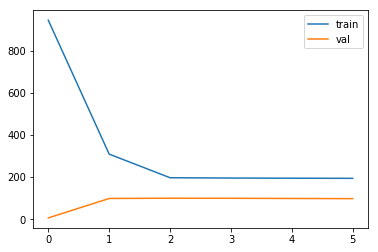

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.338625, 34.859135), mean=25.746862, variance=26.317822, skewness=-0.16665606200695038, kurtosis=-1.1103747071141672)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(15.338625, 21.63984), mean=17.251009, variance=4.2793026, skewness=1.2675440311431885, kurtosis=0.2970720944357099)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


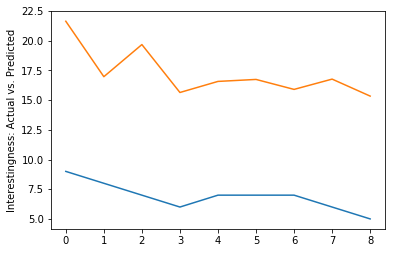

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.338625, 34.859135), mean=25.746862, variance=26.317822, skewness=-0.16665606200695038, kurtosis=-1.1103747071141672)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


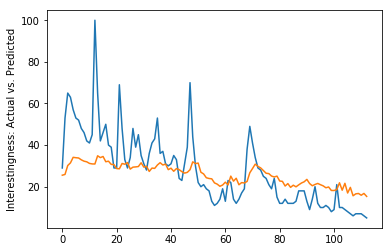

Number of nodes in the hidden layer: 200
Number of epoches: 50
Dropout proportion: 0.35
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 10.449
TEST: Mean Squared Error: 109.184
TEST: Mean Absolute Error: 10.362
TEST: Median Absolute Error: 9.742
TEST: Explained Variance: -0.496
TEST: R^2: -89.244
Number of nodes in the hidden layer: 200
Number of epoches: 50
Dropout proportion: 0.35
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 13.945
Training + Validation: Mean Squared Error: 194.475
Training + Validation: Mean Absolute Error: 10.152
Training + Validation: Median Absolute Error: 8.902
Training + Validation: Explained Variance: 0.378
Training + Validation: R^2: 0.362
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 25.53
2010-03   MLP  2010-03                 25.89
2010-04   MLP  20

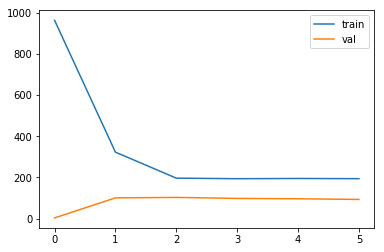

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.522801, 34.814373), mean=25.770147, variance=26.190699, skewness=-0.15551306307315826, kurtosis=-1.1322960880063047)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(15.522801, 21.239578), mean=17.250132, variance=3.31453, skewness=1.3205204010009766, kurtosis=0.5681644835977995)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


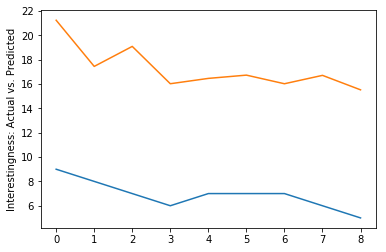

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.522801, 34.814373), mean=25.770147, variance=26.190699, skewness=-0.15551306307315826, kurtosis=-1.1322960880063047)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


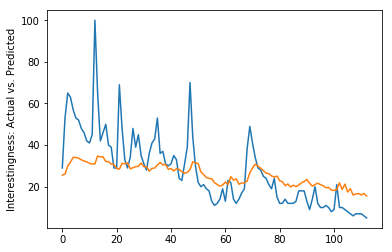

Number of nodes in the hidden layer: 200
Number of epoches: 50
Dropout proportion: 0.5
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 10.418
TEST: Mean Squared Error: 108.535
TEST: Mean Absolute Error: 10.361
TEST: Median Absolute Error: 10.024
TEST: Explained Variance: 0.025
TEST: R^2: -88.707
Number of nodes in the hidden layer: 200
Number of epoches: 50
Dropout proportion: 0.5
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 13.939
Training + Validation: Mean Squared Error: 194.283
Training + Validation: Mean Absolute Error: 10.144
Training + Validation: Median Absolute Error: 9.113
Training + Validation: Explained Variance: 0.378
Training + Validation: R^2: 0.363
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 25.54
2010-03   MLP  2010-03                 26.07
2010-04   MLP  2010

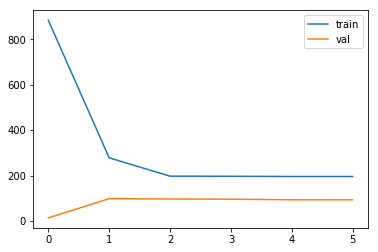

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.401124, 34.494423), mean=25.64025, variance=25.991594, skewness=-0.15662851929664612, kurtosis=-1.1315031101367343)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(15.401124, 21.223545), mean=17.153297, variance=3.3910375, skewness=1.3687026500701904, kurtosis=0.6782385864292251)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


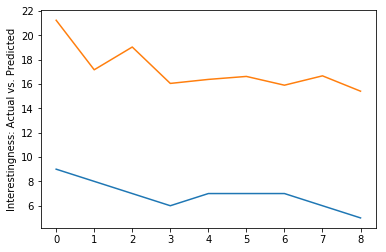

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.401124, 34.494423), mean=25.64025, variance=25.991594, skewness=-0.15662851929664612, kurtosis=-1.1315031101367343)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


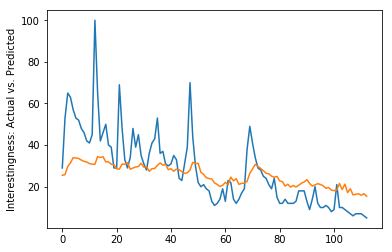

Number of nodes in the hidden layer: 200
Number of epoches: 100
Dropout proportion: 0.0
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 10.326
TEST: Mean Squared Error: 106.636
TEST: Mean Absolute Error: 10.264
TEST: Median Absolute Error: 10.038
TEST: Explained Variance: -0.056
TEST: R^2: -87.138
Number of nodes in the hidden layer: 200
Number of epoches: 100
Dropout proportion: 0.0
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 13.993
Training + Validation: Mean Squared Error: 195.818
Training + Validation: Mean Absolute Error: 10.162
Training + Validation: Median Absolute Error: 8.893
Training + Validation: Explained Variance: 0.375
Training + Validation: R^2: 0.357
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 25.51
2010-03   MLP  2010-03                 25.78
2010-04   MLP  2

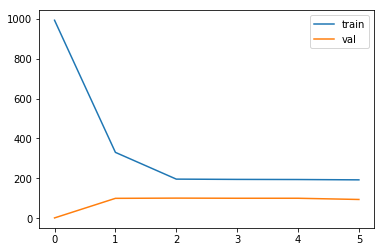

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.304034, 34.47822), mean=25.463558, variance=25.598799, skewness=-0.16037631034851074, kurtosis=-1.127153371151353)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(15.304034, 21.37264), mean=17.074411, variance=3.6375754, skewness=1.4316226243972778, kurtosis=0.8992930284473339)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


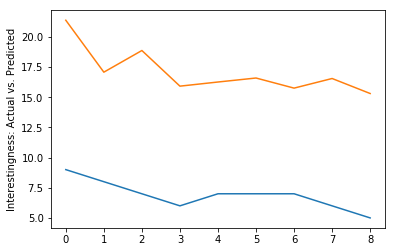

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.304034, 34.47822), mean=25.463558, variance=25.598799, skewness=-0.16037631034851074, kurtosis=-1.127153371151353)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


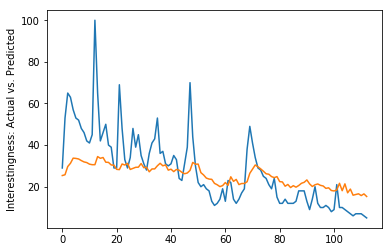

Number of nodes in the hidden layer: 200
Number of epoches: 100
Dropout proportion: 0.05
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 10.253
TEST: Mean Squared Error: 105.117
TEST: Mean Absolute Error: 10.186
TEST: Median Absolute Error: 9.914
TEST: Explained Variance: -0.134
TEST: R^2: -85.882
Number of nodes in the hidden layer: 200
Number of epoches: 100
Dropout proportion: 0.05
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 14.027
Training + Validation: Mean Squared Error: 196.752
Training + Validation: Mean Absolute Error: 10.155
Training + Validation: Median Absolute Error: 8.831
Training + Validation: Explained Variance: 0.375
Training + Validation: R^2: 0.354
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 25.37
2010-03   MLP  2010-03                 25.74
2010-04   MLP  

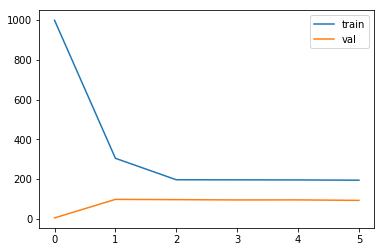

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.34845, 34.536995), mean=25.525726, variance=25.744427, skewness=-0.16014468669891357, kurtosis=-1.1234449577553447)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(15.34845, 21.452724), mean=17.095665, variance=3.7013183, skewness=1.4714113473892212, kurtosis=0.9677860105475675)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


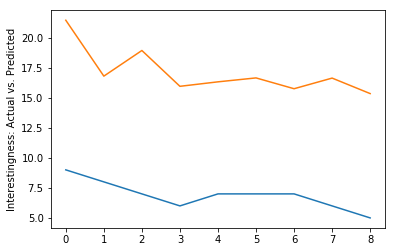

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.34845, 34.536995), mean=25.525726, variance=25.744427, skewness=-0.16014468669891357, kurtosis=-1.1234449577553447)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


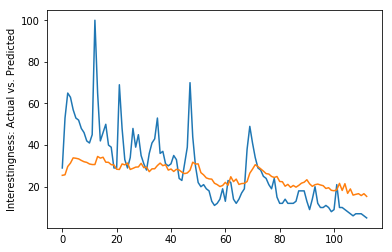

Number of nodes in the hidden layer: 200
Number of epoches: 100
Dropout proportion: 0.15
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 10.280
TEST: Mean Squared Error: 105.675
TEST: Mean Absolute Error: 10.207
TEST: Median Absolute Error: 9.954
TEST: Explained Variance: -0.237
TEST: R^2: -86.344
Number of nodes in the hidden layer: 200
Number of epoches: 100
Dropout proportion: 0.15
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 14.012
Training + Validation: Mean Squared Error: 196.329
Training + Validation: Mean Absolute Error: 10.156
Training + Validation: Median Absolute Error: 8.773
Training + Validation: Explained Variance: 0.375
Training + Validation: R^2: 0.356
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 25.47
2010-03   MLP  2010-03                 25.72
2010-04   MLP  

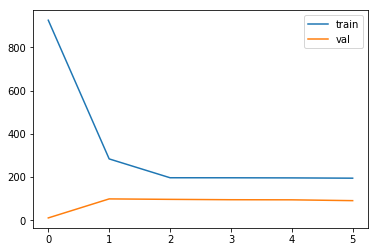

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.390546, 34.314205), mean=25.573946, variance=25.80205, skewness=-0.1534721702337265, kurtosis=-1.1340709838745655)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(15.390546, 20.966976), mean=17.107925, variance=3.2046356, skewness=1.3043633699417114, kurtosis=0.425814315534526)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


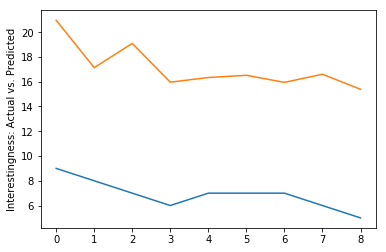

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.390546, 34.314205), mean=25.573946, variance=25.80205, skewness=-0.1534721702337265, kurtosis=-1.1340709838745655)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


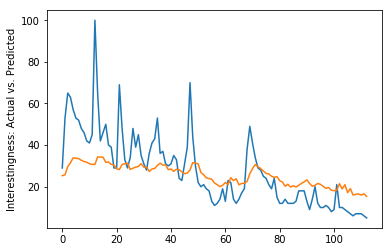

Number of nodes in the hidden layer: 200
Number of epoches: 100
Dropout proportion: 0.25
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 10.278
TEST: Mean Squared Error: 105.636
TEST: Mean Absolute Error: 10.219
TEST: Median Absolute Error: 9.963
TEST: Explained Variance: 0.002
TEST: R^2: -86.312
Number of nodes in the hidden layer: 200
Number of epoches: 100
Dropout proportion: 0.25
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 14.016
Training + Validation: Mean Squared Error: 196.449
Training + Validation: Mean Absolute Error: 10.160
Training + Validation: Median Absolute Error: 8.949
Training + Validation: Explained Variance: 0.374
Training + Validation: R^2: 0.355
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 25.31
2010-03   MLP  2010-03                 25.73
2010-04   MLP  2

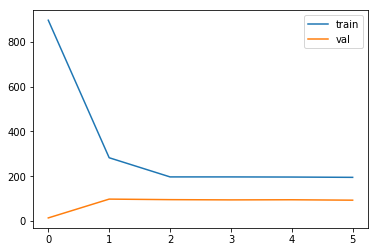

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.214422, 34.437336), mean=25.41005, variance=25.682806, skewness=-0.15991900861263275, kurtosis=-1.1222703059061627)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(15.214422, 21.20039), mean=17.001125, variance=3.7030818, skewness=1.3359276056289673, kurtosis=0.5451964997118051)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


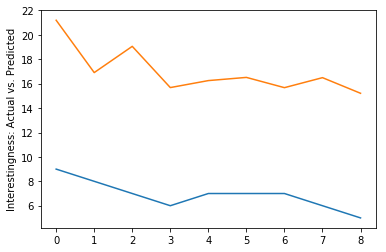

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.214422, 34.437336), mean=25.41005, variance=25.682806, skewness=-0.15991900861263275, kurtosis=-1.1222703059061627)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


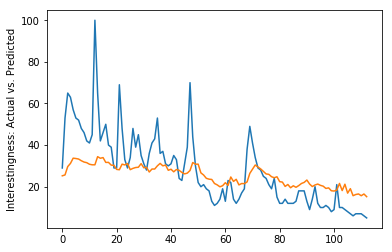

Number of nodes in the hidden layer: 200
Number of epoches: 100
Dropout proportion: 0.35
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 10.184
TEST: Mean Squared Error: 103.713
TEST: Mean Absolute Error: 10.112
TEST: Median Absolute Error: 9.682
TEST: Explained Variance: -0.203
TEST: R^2: -84.722
Number of nodes in the hidden layer: 200
Number of epoches: 100
Dropout proportion: 0.35
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 14.033
Training + Validation: Mean Squared Error: 196.934
Training + Validation: Mean Absolute Error: 10.145
Training + Validation: Median Absolute Error: 8.840
Training + Validation: Explained Variance: 0.375
Training + Validation: R^2: 0.354
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 25.24
2010-03   MLP  2010-03                 25.66
2010-04   MLP  

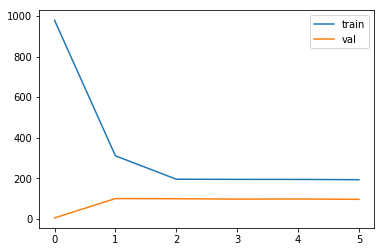

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.653488, 35.087807), mean=25.876019, variance=26.401949, skewness=-0.15561233460903168, kurtosis=-1.136061733704187)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(15.653488, 21.46823), mean=17.344957, variance=3.326636, skewness=1.4089826345443726, kurtosis=0.9121882006311455)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


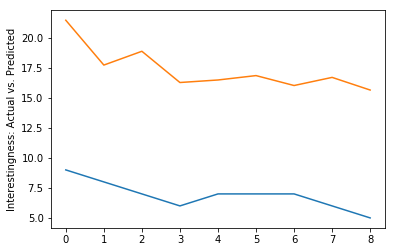

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.653488, 35.087807), mean=25.876019, variance=26.401949, skewness=-0.15561233460903168, kurtosis=-1.136061733704187)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


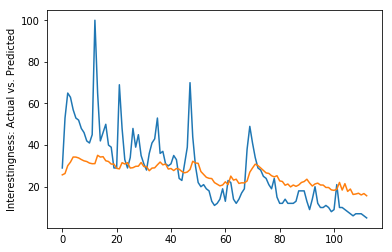

Number of nodes in the hidden layer: 200
Number of epoches: 100
Dropout proportion: 0.5
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 10.509
TEST: Mean Squared Error: 110.447
TEST: Mean Absolute Error: 10.456
TEST: Median Absolute Error: 10.280
TEST: Explained Variance: 0.076
TEST: R^2: -90.288
Number of nodes in the hidden layer: 200
Number of epoches: 100
Dropout proportion: 0.5
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 13.899
Training + Validation: Mean Squared Error: 193.183
Training + Validation: Mean Absolute Error: 10.136
Training + Validation: Median Absolute Error: 9.166
Training + Validation: Explained Variance: 0.380
Training + Validation: R^2: 0.366
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 25.70
2010-03   MLP  2010-03                 26.34
2010-04   MLP  20

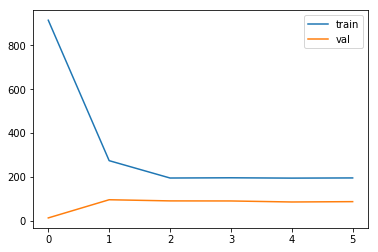

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.146039, 34.520603), mean=25.31179, variance=25.536526, skewness=-0.16184252500534058, kurtosis=-1.1214475693470884)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(15.146039, 21.07707), mean=16.910366, variance=3.5027542, skewness=1.3827513456344604, kurtosis=0.7598966758666057)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


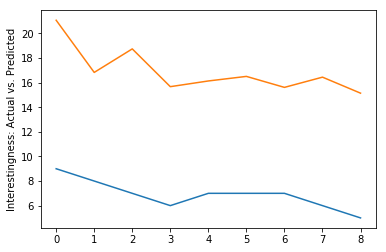

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.146039, 34.520603), mean=25.31179, variance=25.536526, skewness=-0.16184252500534058, kurtosis=-1.1214475693470884)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


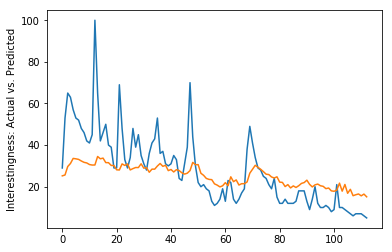

Number of nodes in the hidden layer: 250
Number of epoches: 50
Dropout proportion: 0.0
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 10.087
TEST: Mean Squared Error: 101.757
TEST: Mean Absolute Error: 10.021
TEST: Median Absolute Error: 9.675
TEST: Explained Variance: -0.097
TEST: R^2: -83.105
Number of nodes in the hidden layer: 250
Number of epoches: 50
Dropout proportion: 0.0
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 14.038
Training + Validation: Mean Squared Error: 197.057
Training + Validation: Mean Absolute Error: 10.130
Training + Validation: Median Absolute Error: 8.761
Training + Validation: Explained Variance: 0.376
Training + Validation: R^2: 0.353
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 25.22
2010-03   MLP  2010-03                 25.63
2010-04   MLP  2010

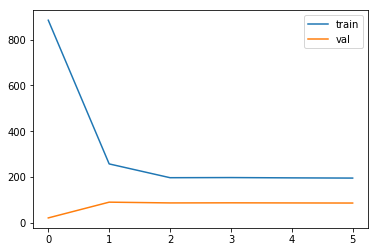

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.151848, 34.287155), mean=25.24654, variance=25.387726, skewness=-0.158928781747818, kurtosis=-1.1207967923996616)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(15.151848, 21.311464), mean=16.891428, variance=3.7536361, skewness=1.4994910955429077, kurtosis=1.0593881531529368)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


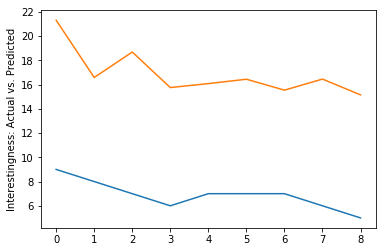

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.151848, 34.287155), mean=25.24654, variance=25.387726, skewness=-0.158928781747818, kurtosis=-1.1207967923996616)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


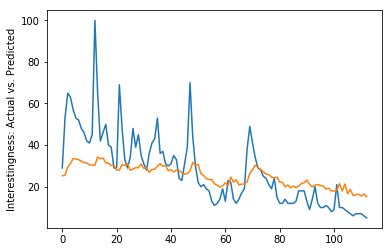

Number of nodes in the hidden layer: 250
Number of epoches: 50
Dropout proportion: 0.05
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 10.079
TEST: Mean Squared Error: 101.578
TEST: Mean Absolute Error: 10.003
TEST: Median Absolute Error: 9.758
TEST: Explained Variance: -0.263
TEST: R^2: -82.958
Number of nodes in the hidden layer: 250
Number of epoches: 50
Dropout proportion: 0.05
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 14.077
Training + Validation: Mean Squared Error: 198.164
Training + Validation: Mean Absolute Error: 10.143
Training + Validation: Median Absolute Error: 8.655
Training + Validation: Explained Variance: 0.374
Training + Validation: R^2: 0.350
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 25.25
2010-03   MLP  2010-03                 25.47
2010-04   MLP  20

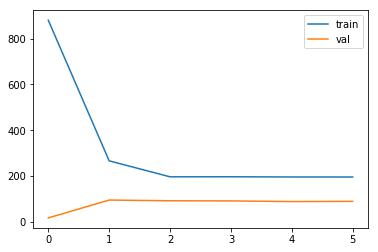

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.198161, 34.348614), mean=25.367382, variance=25.558254, skewness=-0.1596030741930008, kurtosis=-1.1259987781712513)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(15.198161, 21.235332), mean=16.983946, variance=3.6723344, skewness=1.384992241859436, kurtosis=0.718426746836434)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


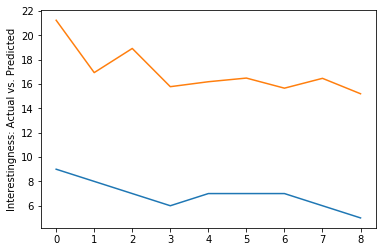

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.198161, 34.348614), mean=25.367382, variance=25.558254, skewness=-0.1596030741930008, kurtosis=-1.1259987781712513)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


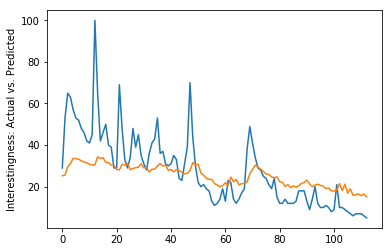

Number of nodes in the hidden layer: 250
Number of epoches: 50
Dropout proportion: 0.15
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 10.165
TEST: Mean Squared Error: 103.329
TEST: Mean Absolute Error: 10.095
TEST: Median Absolute Error: 9.778
TEST: Explained Variance: -0.172
TEST: R^2: -84.404
Number of nodes in the hidden layer: 250
Number of epoches: 50
Dropout proportion: 0.15
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 14.050
Training + Validation: Mean Squared Error: 197.395
Training + Validation: Mean Absolute Error: 10.149
Training + Validation: Median Absolute Error: 8.784
Training + Validation: Explained Variance: 0.374
Training + Validation: R^2: 0.352
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 25.25
2010-03   MLP  2010-03                 25.59
2010-04   MLP  20

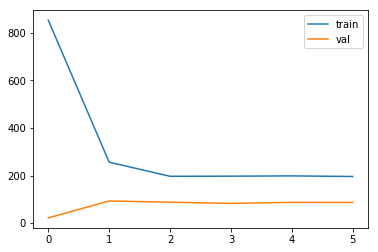

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.1291485, 33.991493), mean=25.143543, variance=25.13217, skewness=-0.15619078278541565, kurtosis=-1.1340694278245278)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(15.1291485, 20.886072), mean=16.820272, variance=3.2980318, skewness=1.3835269212722778, kurtosis=0.7991950951486806)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


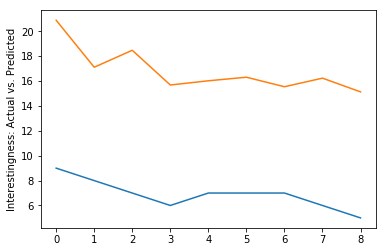

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.1291485, 33.991493), mean=25.143543, variance=25.13217, skewness=-0.15619078278541565, kurtosis=-1.1340694278245278)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


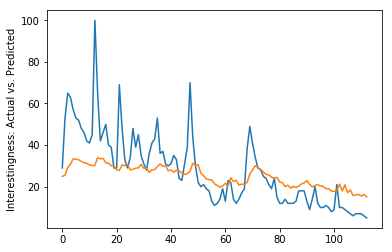

Number of nodes in the hidden layer: 250
Number of epoches: 50
Dropout proportion: 0.25
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 9.988
TEST: Mean Squared Error: 99.767
TEST: Mean Absolute Error: 9.931
TEST: Median Absolute Error: 9.681
TEST: Explained Variance: 0.062
TEST: R^2: -81.461
Number of nodes in the hidden layer: 250
Number of epoches: 50
Dropout proportion: 0.25
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 14.120
Training + Validation: Mean Squared Error: 199.388
Training + Validation: Mean Absolute Error: 10.149
Training + Validation: Median Absolute Error: 8.669
Training + Validation: Explained Variance: 0.372
Training + Validation: R^2: 0.346
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 24.97
2010-03   MLP  2010-03                 25.47
2010-04   MLP  2010-0

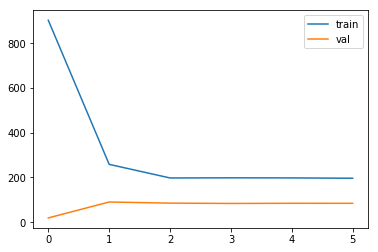

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.064071, 33.8721), mean=25.165777, variance=25.146622, skewness=-0.15841083228588104, kurtosis=-1.1193389674989864)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(15.064071, 21.018255), mean=16.838993, variance=3.7370658, skewness=1.3410502672195435, kurtosis=0.46749595354547235)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


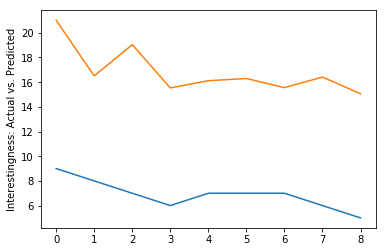

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.064071, 33.8721), mean=25.165777, variance=25.146622, skewness=-0.15841083228588104, kurtosis=-1.1193389674989864)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


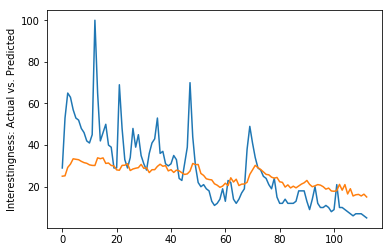

Number of nodes in the hidden layer: 250
Number of epoches: 50
Dropout proportion: 0.35
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 10.029
TEST: Mean Squared Error: 100.579
TEST: Mean Absolute Error: 9.950
TEST: Median Absolute Error: 9.534
TEST: Explained Variance: -0.301
TEST: R^2: -82.131
Number of nodes in the hidden layer: 250
Number of epoches: 50
Dropout proportion: 0.35
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 14.138
Training + Validation: Mean Squared Error: 199.874
Training + Validation: Mean Absolute Error: 10.169
Training + Validation: Median Absolute Error: 8.678
Training + Validation: Explained Variance: 0.370
Training + Validation: R^2: 0.344
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 25.05
2010-03   MLP  2010-03                 25.24
2010-04   MLP  201

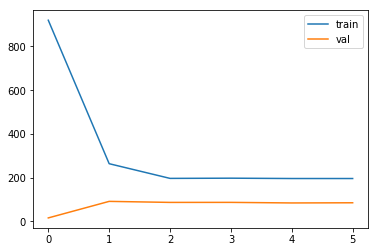

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(14.91665, 34.103275), mean=25.191029, variance=25.367292, skewness=-0.17202599346637726, kurtosis=-1.092783569475976)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(14.91665, 21.475424), mean=16.862537, variance=4.740248, skewness=1.3015655279159546, kurtosis=0.2900293187779779)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


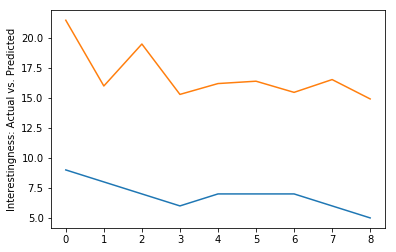

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(14.91665, 34.103275), mean=25.191029, variance=25.367292, skewness=-0.17202599346637726, kurtosis=-1.092783569475976)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


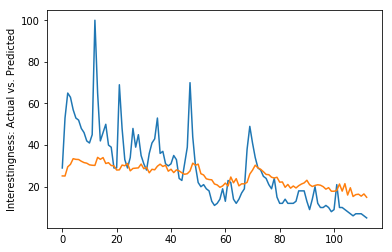

Number of nodes in the hidden layer: 250
Number of epoches: 50
Dropout proportion: 0.5
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 10.087
TEST: Mean Squared Error: 101.752
TEST: Mean Absolute Error: 9.974
TEST: Median Absolute Error: 9.394
TEST: Explained Variance: -0.883
TEST: R^2: -83.101
Number of nodes in the hidden layer: 250
Number of epoches: 50
Dropout proportion: 0.5
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 14.118
Training + Validation: Mean Squared Error: 199.316
Training + Validation: Mean Absolute Error: 10.168
Training + Validation: Median Absolute Error: 8.815
Training + Validation: Explained Variance: 0.371
Training + Validation: R^2: 0.346
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 25.18
2010-03   MLP  2010-03                 25.14
2010-04   MLP  2010-

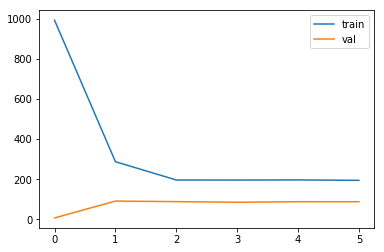

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.134885, 34.284008), mean=25.162018, variance=25.122648, skewness=-0.15631966292858124, kurtosis=-1.133345189425469)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(15.134885, 20.579084), mean=16.796469, variance=2.9162688, skewness=1.344399333000183, kurtosis=0.690563945337956)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


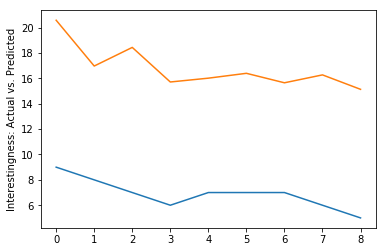

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.134885, 34.284008), mean=25.162018, variance=25.122648, skewness=-0.15631966292858124, kurtosis=-1.133345189425469)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


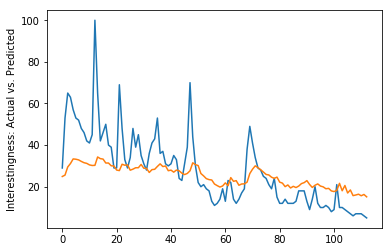

Number of nodes in the hidden layer: 250
Number of epoches: 100
Dropout proportion: 0.0
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 9.957
TEST: Mean Squared Error: 99.147
TEST: Mean Absolute Error: 9.908
TEST: Median Absolute Error: 9.713
TEST: Explained Variance: 0.185
TEST: R^2: -80.948
Number of nodes in the hidden layer: 250
Number of epoches: 100
Dropout proportion: 0.0
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 14.081
Training + Validation: Mean Squared Error: 198.281
Training + Validation: Mean Absolute Error: 10.125
Training + Validation: Median Absolute Error: 8.650
Training + Validation: Explained Variance: 0.375
Training + Validation: R^2: 0.349
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 24.91
2010-03   MLP  2010-03                 25.57
2010-04   MLP  2010-0

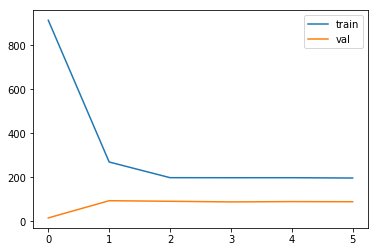

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.181963, 33.910595), mean=25.23017, variance=25.191427, skewness=-0.15414772927761078, kurtosis=-1.1305710556120048)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(15.181963, 20.932093), mean=16.893034, variance=3.3941112, skewness=1.3510113954544067, kurtosis=0.5865905611734608)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


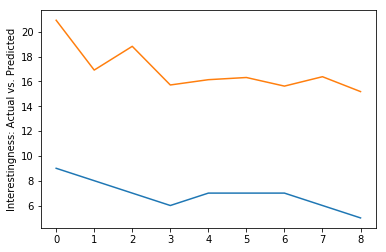

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.181963, 33.910595), mean=25.23017, variance=25.191427, skewness=-0.15414772927761078, kurtosis=-1.1305710556120048)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


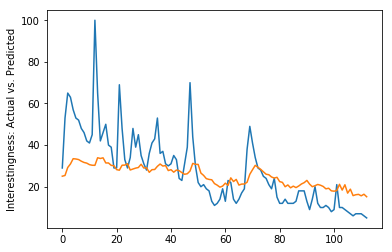

Number of nodes in the hidden layer: 250
Number of epoches: 100
Dropout proportion: 0.05
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 10.068
TEST: Mean Squared Error: 101.374
TEST: Mean Absolute Error: 10.004
TEST: Median Absolute Error: 9.715
TEST: Explained Variance: -0.067
TEST: R^2: -82.788
Number of nodes in the hidden layer: 250
Number of epoches: 100
Dropout proportion: 0.05
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 14.122
Training + Validation: Mean Squared Error: 199.426
Training + Validation: Mean Absolute Error: 10.169
Training + Validation: Median Absolute Error: 8.713
Training + Validation: Explained Variance: 0.370
Training + Validation: R^2: 0.346
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 25.05
2010-03   MLP  2010-03                 25.40
2010-04   MLP  

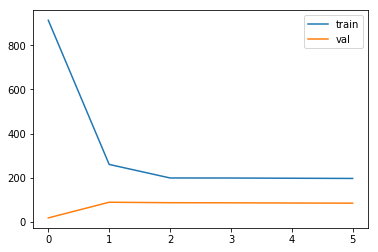

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(14.932511, 33.74521), mean=24.969316, variance=24.800016, skewness=-0.16089890897274017, kurtosis=-1.1173515141473802)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(14.932511, 20.948439), mean=16.704977, variance=3.7577348, skewness=1.370928406715393, kurtosis=0.5869273434281665)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


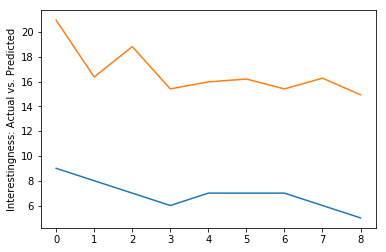

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(14.932511, 33.74521), mean=24.969316, variance=24.800016, skewness=-0.16089890897274017, kurtosis=-1.1173515141473802)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


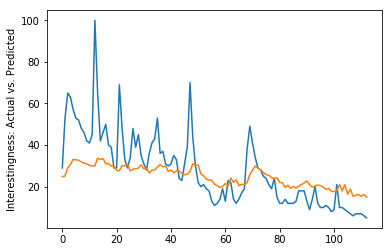

Number of nodes in the hidden layer: 250
Number of epoches: 100
Dropout proportion: 0.15
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 9.896
TEST: Mean Squared Error: 97.923
TEST: Mean Absolute Error: 9.816
TEST: Median Absolute Error: 9.410
TEST: Explained Variance: -0.295
TEST: R^2: -79.936
Number of nodes in the hidden layer: 250
Number of epoches: 100
Dropout proportion: 0.15
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 14.188
Training + Validation: Mean Squared Error: 201.295
Training + Validation: Mean Absolute Error: 10.167
Training + Validation: Median Absolute Error: 8.555
Training + Validation: Explained Variance: 0.369
Training + Validation: R^2: 0.339
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 24.87
2010-03   MLP  2010-03                 25.09
2010-04   MLP  201

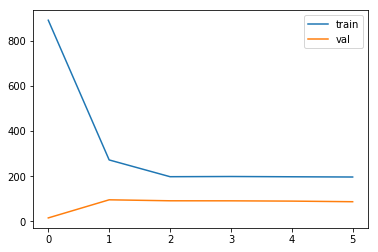

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.151466, 34.13828), mean=25.297234, variance=25.353952, skewness=-0.1621527373790741, kurtosis=-1.1169203017754092)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(15.151466, 21.299433), mean=16.957497, variance=4.038824, skewness=1.3484511375427246, kurtosis=0.4624461412642944)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


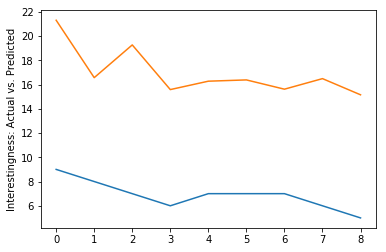

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.151466, 34.13828), mean=25.297234, variance=25.353952, skewness=-0.1621527373790741, kurtosis=-1.1169203017754092)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


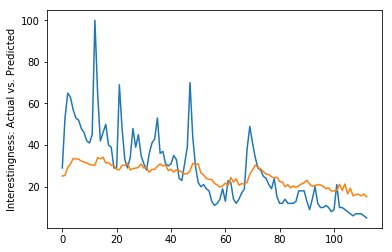

Number of nodes in the hidden layer: 250
Number of epoches: 100
Dropout proportion: 0.25
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 10.155
TEST: Mean Squared Error: 103.121
TEST: Mean Absolute Error: 10.069
TEST: Median Absolute Error: 9.582
TEST: Explained Variance: -0.441
TEST: R^2: -84.233
Number of nodes in the hidden layer: 250
Number of epoches: 100
Dropout proportion: 0.25
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 14.113
Training + Validation: Mean Squared Error: 199.169
Training + Validation: Mean Absolute Error: 10.183
Training + Validation: Median Absolute Error: 8.683
Training + Validation: Explained Variance: 0.370
Training + Validation: R^2: 0.346
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 25.13
2010-03   MLP  2010-03                 25.35
2010-04   MLP  

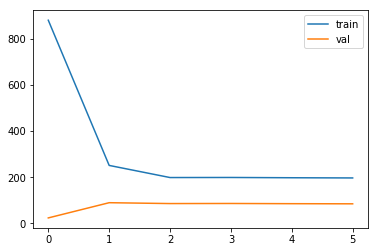

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.012159, 33.667763), mean=25.01652, variance=24.763338, skewness=-0.15700063109397888, kurtosis=-1.1265711477845286)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(15.012159, 20.893164), mean=16.764576, variance=3.5969977, skewness=1.3406254053115845, kurtosis=0.5229691038871498)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


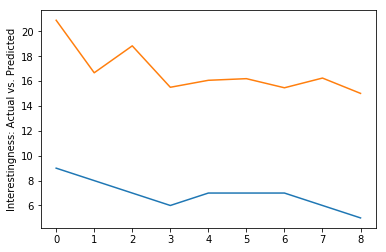

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.012159, 33.667763), mean=25.01652, variance=24.763338, skewness=-0.15700063109397888, kurtosis=-1.1265711477845286)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


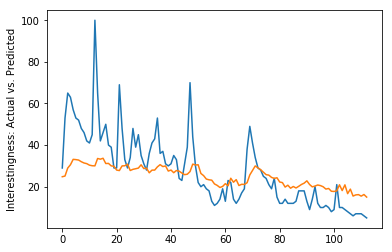

Number of nodes in the hidden layer: 250
Number of epoches: 100
Dropout proportion: 0.35
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 9.947
TEST: Mean Squared Error: 98.948
TEST: Mean Absolute Error: 9.876
TEST: Median Absolute Error: 9.503
TEST: Explained Variance: -0.173
TEST: R^2: -80.784
Number of nodes in the hidden layer: 250
Number of epoches: 100
Dropout proportion: 0.35
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 14.201
Training + Validation: Mean Squared Error: 201.670
Training + Validation: Mean Absolute Error: 10.184
Training + Validation: Median Absolute Error: 8.669
Training + Validation: Explained Variance: 0.367
Training + Validation: R^2: 0.338
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 24.80
2010-03   MLP  2010-03                 25.12
2010-04   MLP  201

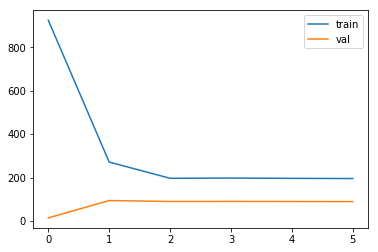

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.133621, 34.16308), mean=25.180328, variance=25.238253, skewness=-0.1584252268075943, kurtosis=-1.1255169939966443)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(15.133621, 21.187527), mean=16.858742, variance=3.6205392, skewness=1.4577597379684448, kurtosis=1.0120865790629736)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


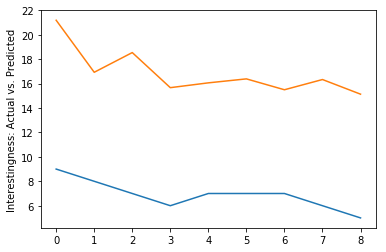

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.133621, 34.16308), mean=25.180328, variance=25.238253, skewness=-0.1584252268075943, kurtosis=-1.1255169939966443)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


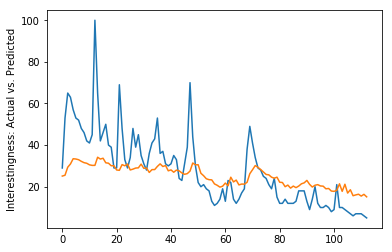

Number of nodes in the hidden layer: 250
Number of epoches: 100
Dropout proportion: 0.5
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 10.037
TEST: Mean Squared Error: 100.738
TEST: Mean Absolute Error: 9.970
TEST: Median Absolute Error: 9.667
TEST: Explained Variance: -0.108
TEST: R^2: -82.263
Number of nodes in the hidden layer: 250
Number of epoches: 100
Dropout proportion: 0.5
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 14.101
Training + Validation: Mean Squared Error: 198.837
Training + Validation: Mean Absolute Error: 10.145
Training + Validation: Median Absolute Error: 8.715
Training + Validation: Explained Variance: 0.373
Training + Validation: R^2: 0.348
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   MLP  2010-02                 25.11
2010-03   MLP  2010-03                 25.51
2010-04   MLP  201

In [0]:
# 0. import libs
from pandas import DataFrame
import numpy as np
from numpy import array
from scipy import stats
from sklearn.metrics import explained_variance_score,r2_score,mean_squared_error,mean_absolute_error,median_absolute_error 
from tensorflow import keras
from tensorflow.keras import layers  # from TF 2.0 online docs
from tensorflow.keras.regularizers import L1L2  # tf.keras.regularizers.L1L2
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
from matplotlib import pyplot

# funcs

# 1. train, val, test split into samples func
def timeseries_train_val_test_split(df,dcol,pcol,cols,train_end,val_end):
  "Use to create static train, val and test samples for timeseries."
  # select one stock ticker
  # df1 = df.loc[df[fcol]==fval].set_index(dcol)
  # select inputs & output
  inoutcols = cols  # ['LOGPRICE','FIRST DERIVATIVE','SECOND DERIVATIVE','THIRD DERIVATIVE','FOURTH DERIVATIVE']
  # select train, validation and test data
  df, df_train, df_val, df_test = df[inoutcols], df[:train_end] [inoutcols], df[train_end:val_end] [inoutcols], df[val_end:] [inoutcols]
  print('N size: df_train, df_val, df_test = ',len(df_train),len(df_val), len(df_test))
  print('df_test descriptives')
  print(df_test.describe().T)
  # plot train, val and test data
  plt.plot(df_train[pcol])
  plt.plot(df_val[pcol]) 
  plt.plot(df_test[pcol])
  plt.ylabel(pcol)
  plt.show()
  return df, df_train, df_val, df_test


# 2. multivariate multi-step data preparation func for MLP
def df2samples(df,train_df,val_df,test_df,n_steps_in=3,n_steps_out=2):
  '''Transform stacked timeseries to sequence samples. Assumes response-level
  dataset where each row is indexed by an id-date. 
  
  IMPORTANT: assumes the LAST column is the OUTPUT and preceeding columns are 
  FEATURES used to predict the output (e.g. ['X1','X2','X3','X4','y']).'''
  
  # a. convert to np array
  df_ar = df.to_numpy()
  print('df_ar')
  print(stats.describe(df_ar))
  
  train_ar = train_df.to_numpy()
  val_ar = val_df.to_numpy() 
  test_ar = test_df.to_numpy()
  print('test_ar')
  print(stats.describe(test_ar))
  
  '''print('train array dimensions')
  print(train_ar.shape)
  print('validation array dimensions')
  print(val_ar.shape)
  print('test array dimensions')
  print(test_ar.shape)'''
  # return df_ar, train_ar, val_ar, test_ar
  
  # b. split multivariate arrays into sequence samples func
  def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
      # find the end of this pattern
      end_ix = i + n_steps_in
      out_end_ix = end_ix + n_steps_out-1
      # check if we are beyond the dataset
      if out_end_ix > len(sequences):
        break
      # gather input and output parts of the pattern
      seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
      X.append(seq_x)
      y.append(seq_y)
    print('X')
    print(stats.describe(X))
    print('y')
    print(stats.describe(y))
    return array(X), array(y)
  # c. call func to create train, val, test samples
  X_df, y_df = split_sequences(df_ar, n_steps_in, n_steps_out)
  X_train, y_train = split_sequences(train_ar, n_steps_in, n_steps_out)
  X_val, y_val = split_sequences(val_ar, n_steps_in, n_steps_out)
  X_test, y_test = split_sequences(test_ar, n_steps_in, n_steps_out)
  return X_df, y_df, X_train, y_train, X_val, y_val, X_test, y_test 

# d. MLP ONLY: flatten input data X func (TO SPEED UP CALCULATIONS IN TF)
def flatten(nsteps_input,nfeatures,X_df,X_train,X_val,X_test):
  """MLP: vectorize input samples"""
  # calc new n_input dim
  n_input_flat = nsteps_input*nfeatures  # - FLATTENED NUMBER OF COLUMNS IN INPUT SAMPLE - local to func flatten
  print('n_input_flat: ', n_input_flat)
  # flatten df, train, val, test samples
  X_df_flat = X_df.reshape((X_df.shape[0],n_input_flat))
  print('X_df shape after reshape vectorization: ', X_df_flat.shape)
  X_train_flat = X_train.reshape((X_train.shape[0],n_input_flat))
  print('X_train shape after reshape vectorization: ', X_train_flat.shape)
  X_val_flat = X_val.reshape((X_val.shape[0], n_input_flat)) # CREATES FLATTENED INPUT SAMPLE
  print('X_val_flat shape after reshape vectorization: ', X_val_flat.shape)
  X_test_flat = X_test.reshape((X_test.shape[0], n_input_flat)) # CREATES FLATTENED INPUT SAMPLE
  print('X_test_flat shape after reshape vectorization: ', X_test_flat.shape)
  # return flatten input data
  return n_input_flat, X_df_flat, X_train_flat, X_val_flat, X_test_flat


# 3. multivariate multi-step mlp

# model definition, fit, eval, predict
def model_def_fit_eval(X_df,y_df,X_train,y_train,X_val,y_val,X_test,y_test,wts_fpath,n_nodes=200,n_epochs=100,n_patience=2,dropout=.5,reg=L1L2(l1=0.0, l2=0.0)):  
  '''Define and Fit Model + Tune Hyper Parameters: n_nodes, n_epochs, n_patience'''

  # model define - LSTM
  ''' from Eric:
  model = keras.Sequential([
  keras.layers.LSTM(n_nodes,activation ='relu', return_sequences=True, input_shape=(nsteps_input,nfeatures),dropout=dropout,kernel_regularizer=reg),  # dropout=dropout))
  keras.layers.LSTM(n_nodes,activation ='relu'),
  keras.layers.Dense(nsteps_output)])'''

  # model define - MLP
  model = tf.keras.Sequential()
  model.add(layers.Dense(n_nodes, activation='relu', input_dim=n_input))
  model.add(layers.Dense(nsteps_output))

  # model compile
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
  
  # early stopping
  early_stop = EarlyStopping(monitor='val_loss', patience=n_patience, verbose=1)
  # checkpoint
  # filepath="weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
  filepath= wts_fpath
  checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
  callbacks_list = [early_stop, checkpoint]
  
  # model fit
  history = model.fit(X_train_flat,y_train,validation_data=(X_val_flat,y_val),epochs=n_epochs,batch_size=1,verbose=1,callbacks=callbacks_list,shuffle=False)
  
  # model evaluate
  _, train_mse = model.evaluate(X_train_flat, y_train, verbose=0)
  _, val_mse = model.evaluate(X_val_flat, y_val, verbose=0)
  print(f'Train: {train_mse:.6f}, Validation: {val_mse:.6f}')

  # plot accuracy of model learning
  pyplot.plot(history.history['mean_squared_error'], label='train')
  pyplot.plot(history.history['val_mean_squared_error'], label='val')
  pyplot.legend()
  pyplot.show()
  
  # model predict df
  yhat_df = model.predict(X_df_flat, verbose=0)
  # print('yhat_train: ', yhat_train)
  # predicted: select last step of predicted multistep output
  y_pred_df = np.asarray([x[-1] for x in yhat_df])
  print('N size: y_pred_df ', len(y_pred_df))
  print(stats.describe(y_pred_df))
  # actual: select last step of actual multistep output
  y_actual_df = np.asarray([x[-1] for x in y_df])
  print('N size: y_actual_df ', len(y_actual_df))
  print(stats.describe(y_actual_df))
  
  # model predict test (12 - 3 lags = 9 months)
  yhat_test = model.predict(X_test, verbose=0)
  # print('yhat_test: ', yhat_test)
  # predicted: select last step of predicted multistep output
  y_pred_test = np.asarray([x[-1] for x in yhat_test])
  # print('y_pred_test: ', y_pred_test)
  print('N size: y_pred_test ', len(y_pred_test))
  print(stats.describe(y_pred_test))
  # actual: select last step of actual multistep output
  y_actual_test = np.asarray([x[-1] for x in y_test])
  # print('y_actual_test: ', y_actual_test)
  print('N size: y_actual_test ', len(y_actual_test))
  print(stats.describe(y_actual_test))
  
  # plot actual & predicted y on test
  plt.plot(y_actual_test)
  plt.plot(y_pred_test)
  plt.ylabel('Interestingness: Actual vs. Predicted')
  plt.show()  
  
  # model predict df
  yhat_df = model.predict(X_df, verbose=0)
  # print('yhat_train: ', yhat_train)
  # predicted: select last step of predicted multistep output
  y_pred_df = np.asarray([x[-1] for x in yhat_df])
  print('N size: y_pred_df ', len(y_pred_df))
  print(stats.describe(y_pred_df))
  # actual: select last step of actual multistep output
  y_actual_df = np.asarray([x[-1] for x in y_df])
  print('N size: y_actual_df ', len(y_actual_df))
  print(stats.describe(y_actual_df))
  
  # plot actual & predicted y on df
  plt.plot(y_actual_df)
  plt.plot(y_pred_df)
  plt.ylabel('Interestingness: Actual vs. Predicted')
  plt.show()
  
  # e. model performance metrics

  # print hyper parameter values
  print(f'Number of nodes in the hidden layer: {n_nodes}')
  print(f'Number of epoches: {n_epochs}')
  print(f'Dropout proportion: {dropout}')
  # print(f'L1L2 regularization: {reg}')
  print(f'Patience: Number of epochs before early stop: {n_patience}')
  
  # test
  "Use weights from best model to predict test sample."
  # import error metrics from sklearn
  from sklearn.metrics import explained_variance_score,r2_score,mean_squared_error,mean_absolute_error,median_absolute_error
  # compute root mean squared error of predictions
  rmse = np.sqrt(np.mean(np.square((y_actual_test - y_pred_test)),axis=0))
  print(f'TEST: Root Mean Squared Error: {rmse:.3f}')
  # compute mean squared error
  mae = mean_squared_error(y_actual_test, y_pred_test)
  print(f'TEST: Mean Squared Error: {mae:.3f}')
  # compute mean absolute error
  mae = mean_absolute_error(y_actual_test, y_pred_test)
  print(f'TEST: Mean Absolute Error: {mae:.3f}')
  # compute median absolute error
  mdae = median_absolute_error(y_actual_test, y_pred_test)
  print(f'TEST: Median Absolute Error: {mdae:.3f}')
  # compute explained_variance_score
  evar = explained_variance_score(y_actual_test, y_pred_test)
  print(f'TEST: Explained Variance: {evar:.3f}')
  # compute R2
  r2 = r2_score(y_actual_test, y_pred_test)
  print(f'TEST: R^2: {r2:.3f}')
  
  # print hyper parameter values
  print(f'Number of nodes in the hidden layer: {n_nodes}')
  print(f'Number of epoches: {n_epochs}')
  print(f'Dropout proportion: {dropout}')
  # print(f'L1L2 regularization: {reg}')
  print(f'Patience: Number of epochs before early stop: {n_patience}')

  # df
  "Use weights from best model to predict test sample."
  # import error metrics from sklearn
  from sklearn.metrics import explained_variance_score,r2_score,mean_squared_error,mean_absolute_error,median_absolute_error
  # compute root mean squared error of predictions
  rmse = np.sqrt(np.mean(np.square((y_actual_df - y_pred_df)),axis=0))
  print(f'Training + Validation: Root Mean Squared Error: {rmse:.3f}')
  # compute mean squared error
  mae = mean_squared_error(y_actual_df, y_pred_df)
  print(f'Training + Validation: Mean Squared Error: {mae:.3f}')
  # compute mean absolute error
  mae = mean_absolute_error(y_actual_df, y_pred_df)
  print(f'Training + Validation: Mean Absolute Error: {mae:.3f}')
  # compute median absolute error
  mdae = median_absolute_error(y_actual_df, y_pred_df)
  print(f'Training + Validation: Median Absolute Error: {mdae:.3f}')
  # compute explained_variance_score
  evar = explained_variance_score(y_actual_df, y_pred_df)
  print(f'Training + Validation: Explained Variance: {evar:.3f}')
  # compute R2
  r2 = r2_score(y_actual_df, y_pred_df)
  print(f'Training + Validation: R^2: {r2:.3f}')
  
  # export results to csv
  
  # dfs - Tom needs predictions on all 12 mths of the test data for analysis
  # df_actual_train = pd.DataFrame(y_actual_train)
  df_pred_df = pd.DataFrame(y_pred_df)
  # labels
  df_date_df = pd.DataFrame(df.index[-113:])
  # df_ticker_train = pd.DataFrame([ticker]*172) 
  df_model_type_df = pd.DataFrame([model_type]*113)
  # df_sample_type_df = pd.DataFrame(['all']*113)
  # concatenate y actual pred arrays
  df_pred_df = pd.concat((df_model_type_df,df_date_df,df_pred_df), axis=1)
  # update column names
  df_pred_df.columns = ['MODEL','DATE','Pred_Interestingness']
  # Set index
  df_pred_df.set_index('DATE', inplace=True, drop=False)
  # check pred data
  print(f'Training + Validation: df_pred_df N size: {len(df_pred_df)}')
  print(df_pred_df.head())
  print(df_pred_df.tail())
  print(df_pred_df.describe().T)
  
  # test sample last 12 mnths for Tom analysis
  df_pred_test_12mth = df_pred_df['2018-07': '2019-06']
  print(f'TEST 12 months: df_pred_test_12mth N size: {len(df_pred_test_12mth)}')
  print(df_pred_test_12mth.head())
  print(df_pred_test_12mth.tail())
  print(df_pred_test_12mth.describe().T)
  
  # train sample for Tom analysis
  df_pred_train_val = df_pred_df[: '2018-06']
  print(f'Train + Validation samples: df_pred_train_val N size: {len(df_pred_train_val)}')
  print(df_pred_train_val.head())
  print(df_pred_train_val.tail())
  print(df_pred_train_val.describe().T)

  # create file name for csv
  fname_train_val = 'interestingness_train_val_' +  model_type + '.csv'
  fname_test = 'interestingness_test_12mths_' +  model_type + '.csv'
  
  # write df to csv
  df_pred_train_val.to_csv(fname_train_val)
  df_pred_test_12mth.to_csv(fname_test)
  
  return df_pred_train_val,df_pred_test_12mth,fname_train_val,fname_test


# 2. set parameters 
df = iscore
# fcol = 'TICKER'
# fval = 'EBAY' - replace with t in loop
dcol  = 'DATE'
pcol = 'DEPENDENT VARIABLE'
cols = ['FIRST','SECOND','THIRD','FOURTH','DEPENDENT VARIABLE']
train_end = 96
val_end = 104

# set model_type for output file
model_type = 'MLP'

# number INPUT STEPS
nsteps_input = 3
print(f'Number of input time steps: {nsteps_input}')
# number OUTPUT STEPS
nsteps_output = 2
print(f'Number of output time steps: {nsteps_output}')
# number FEATURES
nfeatures = 4
print(f'Number Model of Features: {nfeatures}')

# 3. run program
if __name__ == '__main__':
  """Create train, validation and test dfs."""
  # i. create train, val, test dfs
  df,train_df,val_df,test_df = timeseries_train_val_test_split(df,dcol,pcol,cols,train_end,val_end)
  print(f'Training + Validation df N size: {len(df)}')
  print(f'train_df N size: {len(train_df)}')
  print(f'val_df N size: {len(val_df)}')
  print(f'test_df N size: {len(test_df)}')

  """Create samples."""
  # ii. train, val, test dfs to samples
  # create samples from df2samples(df,train_df,val_df,test_df,n_steps_in=3,n_steps_out=2)
  X_df,y_df,X_train,y_train,X_val,y_val,X_test,y_test = df2samples(df,train_df,val_df,test_df,nsteps_input,nsteps_output)

  """Flatten input samples for MLP."""
  # call func to create flattened model input samples for MLP
  n_input_flat, X_df_flat, X_train_flat, X_val_flat, X_test_flat = flatten(nsteps_input,nfeatures,X_df,X_train,X_val,X_test)
  # number FLATTENED Input Steps
  n_input = n_input_flat
  print(f'Number of flattened input time steps: {n_input}')

  """Summarize final input/output samples."""
  # summarize df SAMPLES
  print(f'Shape of input/output samples: X_train {X_df_flat.shape}, y_train {y_df.shape}')
  # summarize TRAIN SAMPLES
  print(f'Shape of input/output samples: X_train {X_train_flat.shape}, y_train {y_train.shape}')
  # summarize VAL SAMPLES
  print(f'Shape of input/output samples: X_val {X_val_flat.shape}, y_val {y_val.shape}')
  # summarize TEST SAMPLES
  print(f'Shape of input/output samples: X_test {X_test_flat.shape}, y_test {y_test.shape}')

  """Set model parameter and hyper parameter values."""  
  # iii. file path for weights
  wts_fpath = "weights.best_mlp.hdf5"

  """Set values for hyper parameter optimization."""
  # iv. hyper parameter combos
  nodes_n = [150, 200, 250]
  epochs_e = [50,100]  # [200,400]
  patience_p = 5  # [3,4,5]
  dropout_d = [0.0, 0.05, 0.15, 0.25, 0.35, 0.5]
  _l1, _l2 = 0.0, 0.0  # elasticnet setting is 0.01, 0.01
  reg_r = L1L2(l1=_l1, l2=_l2)
  # DOES'T WORK IN TF 2.0 - reg_r = [L1L2(l1=0.0, l2=0.0), L1L2(l1=0.01, l2=0.0), L1L2(l1=0.0, l2=0.01), L1L2(l1=0.01, l2=0.01)]  # error when l2=0.0

  """Run model and print hyper parameter combinations to log."""
  # v. run model - use list comp for list of floats
  # from stack overflow: use tuple for multiple actions in list comp. e.g. [(print("bla1"), print("bla2")) for i in list]
  [(print(f'nodes: {n} epochs: {e} patience: {patience_p} dropout: {d} l1: {_l1} l2: {_l2}'), model_def_fit_eval(X_df_flat,y_df,X_train_flat,y_train,X_val_flat,y_val,X_test_flat,y_test,wts_fpath,n_nodes=n,n_epochs=e,n_patience=patience_p,dropout=d,reg=reg_r)) for n in nodes_n for e in epochs_e for d in dropout_d]                             
      


### Use best model weights to calculate permutation importance with eli5 library

Number of input time steps: 3
Number of output time steps: 2
Number Model of Features: 4
Best Model: Number of nodes in the hidden layer: 250
Best Model: Dropout proportion: 0.35
Best Model: L1L2 Regularization - l1: 0.0 l2: 0.0
N size: df_train, df_val, df_test =  96 8 12
df_test descriptives
                    count  mean  std  min  25%  50%  75%   max
FIRST               12.00  1.33 0.32 1.03 1.17 1.28 1.36  2.26
SECOND              12.00  1.34 0.34 0.86 1.17 1.27 1.38  2.20
THIRD               12.00  1.34 0.46 0.59 1.12 1.24 1.41  2.35
FOURTH              12.00  1.34 0.77 0.20 0.99 1.25 1.64  3.23
DEPENDENT VARIABLE  12.00  8.58 4.21 5.00 6.75 7.00 9.25 21.00


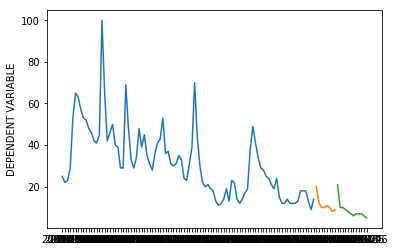

Training + Validation df N size: 116
train_df N size: 96
val_df N size: 8
test_df N size: 12
N size: df_train, df_val, df_test =  96 8 12
df_test descriptives
                    count  mean  std  min  25%  50%  75%   max
FIRST               12.00  1.33 0.32 1.03 1.17 1.28 1.36  2.26
SECOND              12.00  1.34 0.34 0.86 1.17 1.27 1.38  2.20
THIRD               12.00  1.34 0.46 0.59 1.12 1.24 1.41  2.35
FOURTH              12.00  1.34 0.77 0.20 0.99 1.25 1.64  3.23
DEPENDENT VARIABLE  12.00  8.58 4.21 5.00 6.75 7.00 9.25 21.00


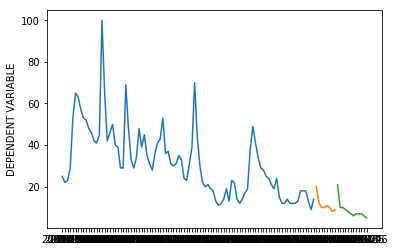

Training + Validation df N size: 116
train_df N size: 96
val_df N size: 8
test_df N size: 12
df_ar
DescribeResult(nobs=116, minmax=(array([1.03, 0.86, 0.59, 0.2 , 5.  ]), array([  3.27,   3.24,   3.21,   3.23, 100.  ])), mean=array([ 2.00646552,  2.00827586,  2.01017241,  2.00732759, 27.84482759]), variance=array([2.22163921e-01, 2.10181349e-01, 2.31893883e-01, 3.29544970e-01,
       3.00045277e+02]), skewness=array([-0.00737649, -0.10668086, -0.2243031 , -0.25835772,  1.06985962]), kurtosis=array([-0.63291545, -0.47115139, -0.35787631,  0.19172126,  1.51133578]))
test_ar
DescribeResult(nobs=12, minmax=(array([1.03, 0.86, 0.59, 0.2 , 5.  ]), array([ 2.26,  2.2 ,  2.35,  3.23, 21.  ])), mean=array([1.3325    , 1.345     , 1.3425    , 1.345     , 8.58333333]), variance=array([ 0.09971136,  0.11799091,  0.21431136,  0.58542727, 17.71969697]), skewness=array([2.26520243, 1.28418209, 0.84943205, 0.97066412, 2.32127308]), kurtosis=array([4.50898871, 1.4380625 , 0.49591114, 1.35540753, 4.5983

ValueError: ignored

In [0]:
# 0. import libs
from pandas import DataFrame
import numpy as np
from numpy import array
from scipy import stats
from sklearn.metrics import explained_variance_score,r2_score,mean_squared_error,mean_absolute_error,median_absolute_error 
from tensorflow import keras
from tensorflow.keras.regularizers import L1L2  # tf.keras.regularizers.L1L2
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from matplotlib import pyplot
# permutation importance (entropy? check reference)
import eli5
from eli5.sklearn import PermutationImportance

# 1. funcs

# a. train, val, test split func

def timeseries_train_val_test_split(df,dcol,pcol,cols,train_end,val_end):
  "Use to create static train, val and test samples for timeseries."
  # select one stock ticker
  # df1 = df.loc[df[fcol]==fval].set_index(dcol)
  # select inputs & output
  inoutcols = cols  # ['LOGPRICE','FIRST DERIVATIVE','SECOND DERIVATIVE','THIRD DERIVATIVE','FOURTH DERIVATIVE']
  # select train, validation and test data
  df, df_train, df_val, df_test = df[inoutcols], df[:train_end] [inoutcols], df[train_end:val_end] [inoutcols], df[val_end:] [inoutcols]
  print('N size: df_train, df_val, df_test = ',len(df_train),len(df_val), len(df_test))
  print('df_test descriptives')
  print(df_test.describe().T)
  # plot train, val and test data
  plt.plot(df_train[pcol])
  plt.plot(df_val[pcol]) 
  plt.plot(df_test[pcol])
  plt.ylabel(pcol)
  plt.show()
  return df, df_train, df_val, df_test


# b. multivariate multi-step data preparation func

def df2samples(df,train_df,val_df,test_df,n_steps_in=3,n_steps_out=2):
  '''Transform stacked multivariate timeseries DataFrame to X, y arrays of sequence samples. 
  Assumes response-level dataset where each row is indexed by an id-date. 

  ***IMPORTANT: assumes the LAST column is the OUTPUT and preceeding columns are 
  FEATURES used to predict the output (e.g. ['X1','X2','X3','X4','y']).'''
  
  # a. convert dfs to np arrays
  df_ar = df.to_numpy()
  print('df_ar')
  print(stats.describe(df_ar))
  train_ar = train_df.to_numpy()
  val_ar = val_df.to_numpy() 
  test_ar = test_df.to_numpy()
  print('test_ar')
  print(stats.describe(test_ar))

  
  # c. split a multivariate array into sequence samples
  def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
      # find the end of this pattern
      end_ix = i + n_steps_in
      out_end_ix = end_ix + n_steps_out-1
      # check if we are beyond the dataset
      if out_end_ix > len(sequences):
        break
      # gather input and output parts of the pattern
      seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
      X.append(seq_x)
      y.append(seq_y)
    print('X')
    print(stats.describe(X))
    print('y')
    print(stats.describe(y))
    return array(X), array(y)
  # d. create df, train, val, test samples
  X_df, y_df = split_sequences(df_ar, n_steps_in, n_steps_out)
  X_train, y_train = split_sequences(train_ar, n_steps_in, n_steps_out)
  X_val, y_val = split_sequences(val_ar, n_steps_in, n_steps_out)
  X_test, y_test = split_sequences(test_ar, n_steps_in, n_steps_out)
  return X_df, y_df, X_train, y_train, X_val, y_val, X_test, y_test


  # d. MLP ONLY: flatten input data X func (TO SPEED UP CALCULATIONS IN TF)
def flatten(nsteps_input,nfeatures,X_df,X_train,X_val,X_test):
  """MLP: vectorize input samples"""
  # calc new n_input dim
  n_input_flat = nsteps_input*nfeatures  # - FLATTENED NUMBER OF COLUMNS IN INPUT SAMPLE - local to func flatten
  print('n_input_flat: ', n_input_flat)
  # flatten df, train, val, test samples
  X_df_flat = X_df.reshape((X_df.shape[0],n_input_flat))
  print('X_df shape after reshape vectorization: ', X_df_flat.shape)
  X_train_flat = X_train.reshape((X_train.shape[0],n_input_flat))
  print('X_train shape after reshape vectorization: ', X_train_flat.shape)
  X_val_flat = X_val.reshape((X_val.shape[0], n_input_flat)) # CREATES FLATTENED INPUT SAMPLE
  print('X_val_flat shape after reshape vectorization: ', X_val_flat.shape)
  X_test_flat = X_test.reshape((X_test.shape[0], n_input_flat)) # CREATES FLATTENED INPUT SAMPLE
  print('X_test_flat shape after reshape vectorization: ', X_test_flat.shape)
  # return flatten input data
  return n_input_flat, X_df_flat, X_train_flat, X_val_flat, X_test_flat


# 2. set parameters 
df = iscore
# fcol = 'TICKER'
# fval = 'EBAY' - replace with t in loop
dcol  = 'DATE'
pcol = 'DEPENDENT VARIABLE'
cols = ['FIRST','SECOND','THIRD','FOURTH','DEPENDENT VARIABLE']
train_end = 96
val_end = 104

# set model_type for output file
model_type = 'MLP'

# number INPUT STEPS
nsteps_input = 3
print(f'Number of input time steps: {nsteps_input}')
# number OUTPUT STEPS
nsteps_output = 2
print(f'Number of output time steps: {nsteps_output}')
# number FEATURES
nfeatures = 4
print(f'Number Model of Features: {nfeatures}')

''' Hyper parameters from best model:
Number of nodes in the hidden layer: 250
Number of epoches: 100
Dropout proportion: 0.35
'''
# set hyper parameters from best model
n_nodes = 250
print(f'Best Model: Number of nodes in the hidden layer: {n_nodes}')
dropout = 0.35
print(f'Best Model: Dropout proportion: {dropout}')
_l1, _l2 = 0.0, 0.0  # elasticnet setting is 0.01, 0.01
reg = L1L2(l1=_l1, l2=_l2)
print(f'Best Model: L1L2 Regularization - l1: {_l1} l2: {_l2}')

# 3. run program
if __name__ == '__main__':
  """Create train, validation and test dfs."""
  # i. create train, val, test dfs
  df,train_df,val_df,test_df = timeseries_train_val_test_split(df,dcol,pcol,cols,train_end,val_end)
  print(f'Training + Validation df N size: {len(df)}')
  print(f'train_df N size: {len(train_df)}')
  print(f'val_df N size: {len(val_df)}')
  print(f'test_df N size: {len(test_df)}')



  def create_model():
    # model define - MLP
    model = tf.keras.Sequential()
    model.add(layers.Dense(n_nodes, activation='relu', input_dim=n_input))
    model.add(layers.Dense(nsteps_output))

    # model compile
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    # load wts from best model
    model.load_weights("weights.best_mlp.hdf5")

    # model compile
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
    return model



# 3. run program
if __name__ == '__main__':
  """Create train, validation and test dfs."""
  # i. create train, val, test dfs
  df,train_df,val_df,test_df = timeseries_train_val_test_split(df,dcol,pcol,cols,train_end,val_end)
  print(f'Training + Validation df N size: {len(df)}')
  print(f'train_df N size: {len(train_df)}')
  print(f'val_df N size: {len(val_df)}')
  print(f'test_df N size: {len(test_df)}')

  """Create samples."""
  # ii. train, val, test dfs to samples
  # create samples from df2samples(df,train_df,val_df,test_df,n_steps_in=3,n_steps_out=2)
  X_df,y_df,X_train,y_train,X_val,y_val,X_test,y_test = df2samples(df,train_df,val_df,test_df,nsteps_input,nsteps_output)

  """Flatten input samples for MLP."""
  # call func to create flattened model input samples for MLP
  n_input_flat, X_df_flat, X_train_flat, X_val_flat, X_test_flat = flatten(nsteps_input,nfeatures,X_df,X_train,X_val,X_test)
  # number FLATTENED Input Steps
  n_input = n_input_flat
  print(f'Number of flattened input time steps: {n_input}')

  """Summarize final input/output samples."""
  # summarize df SAMPLES
  print(f'Shape of input/output samples: X_train {X_df_flat.shape}, y_train {y_df.shape}')
  # summarize TRAIN SAMPLES
  print(f'Shape of input/output samples: X_train {X_train_flat.shape}, y_train {y_train.shape}')
  # summarize VAL SAMPLES
  print(f'Shape of input/output samples: X_val {X_val_flat.shape}, y_val {y_val.shape}')
  # summarize TEST SAMPLES
  print(f'Shape of input/output samples: X_test {X_test_flat.shape}, y_test {y_test.shape}')

  """Set model parameter and hyper parameter values."""  
  # iii. file path for weights
  wts_fpath = "weights.best_mlp.hdf5"

  def create_model():
    # model define - MLP
    model = tf.keras.Sequential()
    model.add(layers.Dense(n_nodes, activation='relu', input_dim=n_input))
    model.add(layers.Dense(nsteps_output))

    # model compile
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    # load wts from best model
    model.load_weights(wts_fpath)

    # model compile
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
    return model
    

  # create model with KerasRegressor
  model = KerasRegressor(build_fn=create_model, verbose=0)

  # calculate permutation importance - test
  perm_test = PermutationImportance(model, random_state=1).fit(X_test, y_test)
  print('Permutation Importance: Test Sample')
  eli5.show_weights(perm_test, feature_names_test = X_test.columns.tolist())

  # calculate permutation importance - df
  perm_df = PermutationImportance(model, random_state=1).fit(X_df, y_df)
  print('Permutation Importance: df')
  eli5.show_weights(perm_df, feature_names_df = X_df.columns.tolist())


## Interestingness: Multivariate - Multi step CNN
### with Early Stopping Callbacks, Dropout, L1L2 Regularization, Test sample validation

Number of input time steps: 3
Number of output time steps: 2
Number Model of Features: 4
N size: df_train, df_val, df_test =  96 8 12
df_test descriptives
                    count  mean  std  min  25%  50%  75%   max
FIRST               12.00  1.33 0.32 1.03 1.17 1.28 1.36  2.26
SECOND              12.00  1.34 0.34 0.86 1.17 1.27 1.38  2.20
THIRD               12.00  1.34 0.46 0.59 1.12 1.24 1.41  2.35
FOURTH              12.00  1.34 0.77 0.20 0.99 1.25 1.64  3.23
DEPENDENT VARIABLE  12.00  8.58 4.21 5.00 6.75 7.00 9.25 21.00


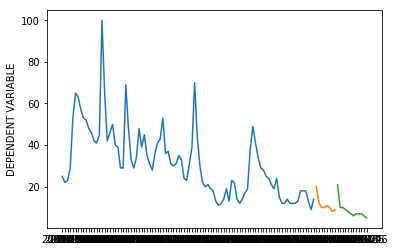

Training + Validation df N size: 116
train_df N size: 96
val_df N size: 8
test_df N size: 12
df_ar
DescribeResult(nobs=116, minmax=(array([1.03, 0.86, 0.59, 0.2 , 5.  ]), array([  3.27,   3.24,   3.21,   3.23, 100.  ])), mean=array([ 2.00646552,  2.00827586,  2.01017241,  2.00732759, 27.84482759]), variance=array([2.22163921e-01, 2.10181349e-01, 2.31893883e-01, 3.29544970e-01,
       3.00045277e+02]), skewness=array([-0.00737649, -0.10668086, -0.2243031 , -0.25835772,  1.06985962]), kurtosis=array([-0.63291545, -0.47115139, -0.35787631,  0.19172126,  1.51133578]))
test_ar
DescribeResult(nobs=12, minmax=(array([1.03, 0.86, 0.59, 0.2 , 5.  ]), array([ 2.26,  2.2 ,  2.35,  3.23, 21.  ])), mean=array([1.3325    , 1.345     , 1.3425    , 1.345     , 8.58333333]), variance=array([ 0.09971136,  0.11799091,  0.21431136,  0.58542727, 17.71969697]), skewness=array([2.26520243, 1.28418209, 0.84943205, 0.97066412, 2.32127308]), kurtosis=array([4.50898871, 1.4380625 , 0.49591114, 1.35540753, 4.5983

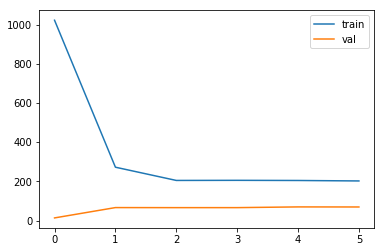

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(14.737284, 32.535248), mean=23.48502, variance=19.865005, skewness=-0.11089377850294113, kurtosis=-1.028651503220239)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(14.737284, 19.673018), mean=16.287823, variance=3.4494898, skewness=0.88219153881073, kurtosis=-0.8601475326185084)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


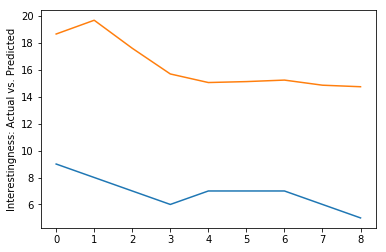

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(14.737284, 32.535248), mean=23.48502, variance=19.865005, skewness=-0.11089377850294113, kurtosis=-1.028651503220239)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


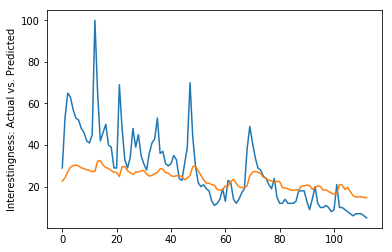

Number of filters: 64
Kernel size: 2
Number of epoches: 500
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 9.469
TEST: Mean Squared Error: 89.671
TEST: Mean Absolute Error: 9.399
TEST: Median Absolute Error: 9.651
TEST: Explained Variance: -0.100
TEST: R^2: -73.116
Number of filters: 64
Kernel size: 2
Number of epoches: 500
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 14.971
Training + Validation: Mean Squared Error: 224.117
Training + Validation: Mean Absolute Error: 10.568
Training + Validation: Median Absolute Error: 7.750
Training + Validation: Explained Variance: 0.330
Training + Validation: R^2: 0.265
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   CNN  2010-02                 22.67
2010-03   CNN  2010-03                 24

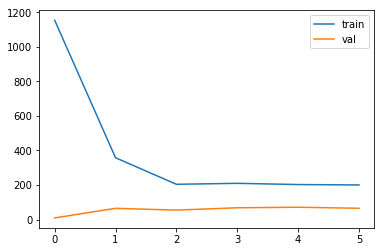

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(14.7483, 32.971474), mean=23.656654, variance=20.237127, skewness=-0.10934863984584808, kurtosis=-1.0009350981919887)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(14.7483, 19.385078), mean=16.308056, variance=3.0976617, skewness=0.8294910788536072, kurtosis=-1.0093339730878315)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


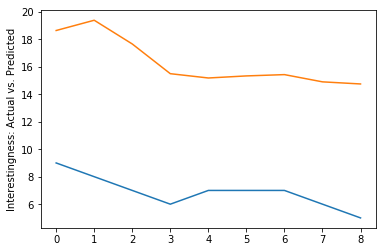

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(14.7483, 32.971474), mean=23.656654, variance=20.237127, skewness=-0.10934863984584808, kurtosis=-1.0009350981919887)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


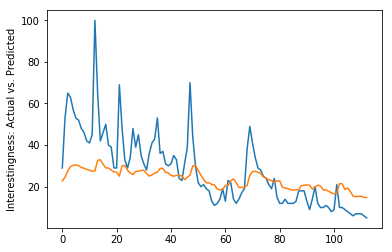

Number of filters: 64
Kernel size: 2
Number of epoches: 1000
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 9.475
TEST: Mean Squared Error: 89.778
TEST: Mean Absolute Error: 9.419
TEST: Median Absolute Error: 9.496
TEST: Explained Variance: 0.126
TEST: R^2: -73.205
Number of filters: 64
Kernel size: 2
Number of epoches: 1000
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 14.897
Training + Validation: Mean Squared Error: 221.916
Training + Validation: Mean Absolute Error: 10.534
Training + Validation: Median Absolute Error: 7.837
Training + Validation: Explained Variance: 0.333
Training + Validation: R^2: 0.272
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   CNN  2010-02                 22.76
2010-03   CNN  2010-03                 2

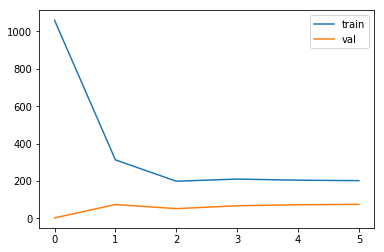

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.231582, 33.610836), mean=24.204073, variance=20.93507, skewness=-0.11176050454378128, kurtosis=-1.0162945203624927)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(15.231582, 20.912998), mean=16.941816, variance=4.5679455, skewness=0.9002689123153687, kurtosis=-0.8462082777456379)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


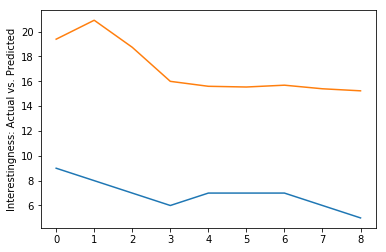

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(15.231582, 33.610836), mean=24.204073, variance=20.93507, skewness=-0.11176050454378128, kurtosis=-1.0162945203624927)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


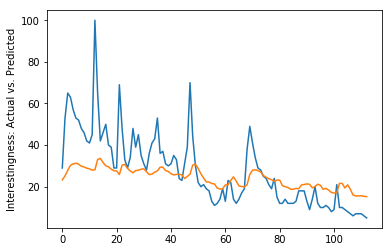

Number of filters: 64
Kernel size: 2
Number of epoches: 2000
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 10.151
TEST: Mean Squared Error: 103.048
TEST: Mean Absolute Error: 10.053
TEST: Median Absolute Error: 9.994
TEST: Explained Variance: -0.642
TEST: R^2: -84.172
Number of filters: 64
Kernel size: 2
Number of epoches: 2000
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 14.727
Training + Validation: Mean Squared Error: 216.893
Training + Validation: Mean Absolute Error: 10.473
Training + Validation: Median Absolute Error: 8.346
Training + Validation: Explained Variance: 0.335
Training + Validation: R^2: 0.288
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   CNN  2010-02                 23.27
2010-03   CNN  2010-03              

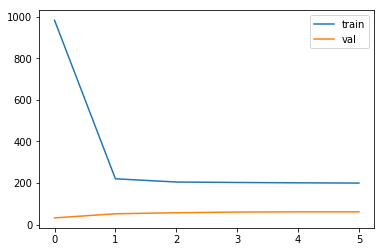

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(13.725005, 31.297428), mean=23.098053, variance=20.638218, skewness=-0.15550610423088074, kurtosis=-1.089090280833269)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(13.725005, 20.006147), mean=15.70774, variance=4.358679, skewness=1.098060131072998, kurtosis=-0.0292513412649944)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


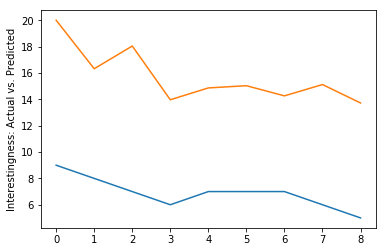

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(13.725005, 31.297428), mean=23.098053, variance=20.638218, skewness=-0.15550610423088074, kurtosis=-1.089090280833269)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


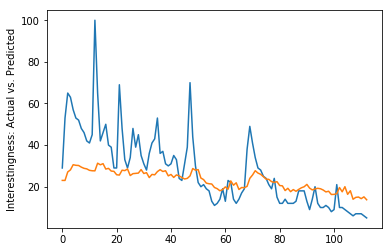

Number of filters: 64
Kernel size: 3
Number of epoches: 500
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 8.911
TEST: Mean Squared Error: 79.412
TEST: Mean Absolute Error: 8.819
TEST: Median Absolute Error: 8.324
TEST: Explained Variance: -0.355
TEST: R^2: -64.636
Number of filters: 64
Kernel size: 3
Number of epoches: 500
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 14.980
Training + Validation: Mean Squared Error: 224.390
Training + Validation: Mean Absolute Error: 10.505
Training + Validation: Median Absolute Error: 7.810
Training + Validation: Explained Variance: 0.341
Training + Validation: R^2: 0.264
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   CNN  2010-02                 23.03
2010-03   CNN  2010-03                 23

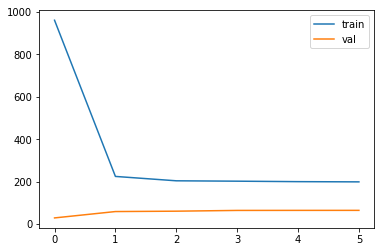

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(14.289586, 31.67289), mean=23.511675, variance=21.040632, skewness=-0.14471961557865143, kurtosis=-1.1259898526031646)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(14.289586, 19.167645), mean=15.934509, variance=2.847377, skewness=0.9228387475013733, kurtosis=-0.6242118757326818)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


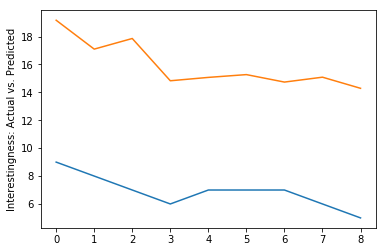

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(14.289586, 31.67289), mean=23.511675, variance=21.040632, skewness=-0.14471961557865143, kurtosis=-1.1259898526031646)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


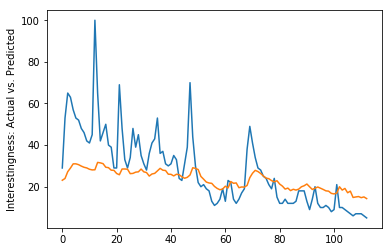

Number of filters: 64
Kernel size: 3
Number of epoches: 1000
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 9.094
TEST: Mean Squared Error: 82.704
TEST: Mean Absolute Error: 9.046
TEST: Median Absolute Error: 9.086
TEST: Explained Variance: 0.272
TEST: R^2: -67.357
Number of filters: 64
Kernel size: 3
Number of epoches: 1000
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 14.802
Training + Validation: Mean Squared Error: 219.106
Training + Validation: Mean Absolute Error: 10.420
Training + Validation: Median Absolute Error: 7.856
Training + Validation: Explained Variance: 0.346
Training + Validation: R^2: 0.281
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   CNN  2010-02                 23.10
2010-03   CNN  2010-03                 2

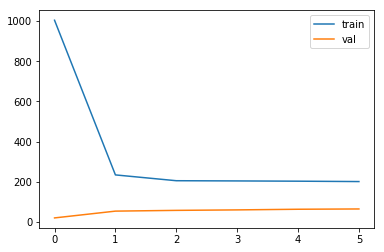

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(14.157224, 31.618355), mean=23.442154, variance=21.122473, skewness=-0.15109816193580627, kurtosis=-1.1259236894421798)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(14.157224, 19.213064), mean=15.844966, variance=2.9782736, skewness=0.975468635559082, kurtosis=-0.44820378272007844)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


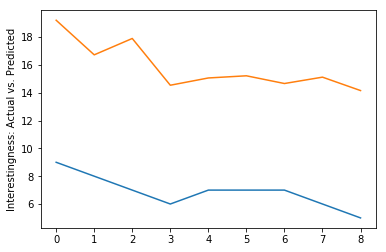

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(14.157224, 31.618355), mean=23.442154, variance=21.122473, skewness=-0.15109816193580627, kurtosis=-1.1259236894421798)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


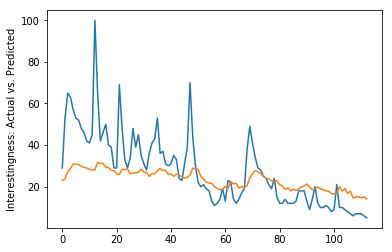

Number of filters: 64
Kernel size: 3
Number of epoches: 2000
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 9.010
TEST: Mean Squared Error: 81.175
TEST: Mean Absolute Error: 8.956
TEST: Median Absolute Error: 8.726
TEST: Explained Variance: 0.204
TEST: R^2: -66.094
Number of filters: 64
Kernel size: 3
Number of epoches: 2000
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 14.818
Training + Validation: Mean Squared Error: 219.561
Training + Validation: Mean Absolute Error: 10.419
Training + Validation: Median Absolute Error: 7.839
Training + Validation: Explained Variance: 0.347
Training + Validation: R^2: 0.280
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   CNN  2010-02                 23.05
2010-03   CNN  2010-03                 2

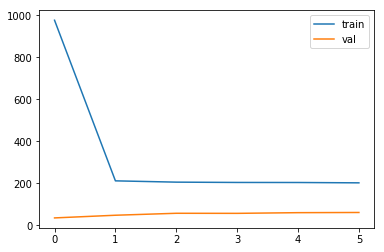

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(14.344381, 31.875198), mean=23.071625, variance=19.403208, skewness=-0.11822999268770218, kurtosis=-1.0409744792378737)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(14.344381, 19.078426), mean=15.947612, variance=3.2934372, skewness=0.7570209503173828, kurtosis=-1.1510756818019696)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


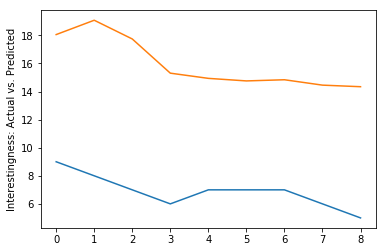

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(14.344381, 31.875198), mean=23.071625, variance=19.403208, skewness=-0.11822999268770218, kurtosis=-1.0409744792378737)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


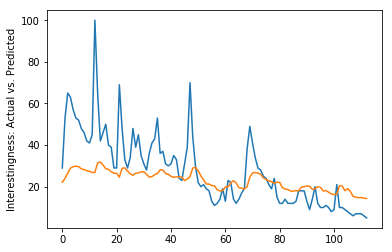

Number of filters: 128
Kernel size: 2
Number of epoches: 500
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 9.131
TEST: Mean Squared Error: 83.379
TEST: Mean Absolute Error: 9.059
TEST: Median Absolute Error: 9.058
TEST: Explained Variance: -0.089
TEST: R^2: -67.915
Number of filters: 128
Kernel size: 2
Number of epoches: 500
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 15.147
Training + Validation: Mean Squared Error: 229.424
Training + Validation: Mean Absolute Error: 10.654
Training + Validation: Median Absolute Error: 7.885
Training + Validation: Explained Variance: 0.326
Training + Validation: R^2: 0.247
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   CNN  2010-02                 22.10
2010-03   CNN  2010-03                 

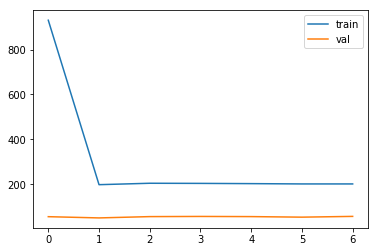

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(14.1567955, 31.603352), mean=22.851904, variance=19.389614, skewness=-0.11374618113040924, kurtosis=-1.0412804243207885)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(14.1567955, 18.542929), mean=15.654644, variance=2.815259, skewness=0.7439677119255066, kurtosis=-1.1439847443692495)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


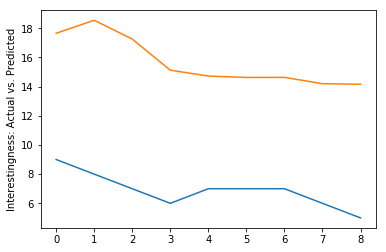

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(14.1567955, 31.603352), mean=22.851904, variance=19.389614, skewness=-0.11374618113040924, kurtosis=-1.0412804243207885)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


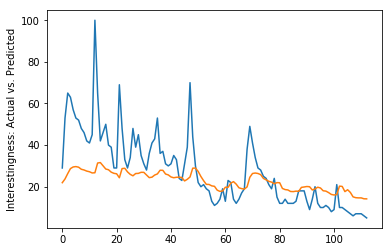

Number of filters: 128
Kernel size: 2
Number of epoches: 1000
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 8.827
TEST: Mean Squared Error: 77.914
TEST: Mean Absolute Error: 8.766
TEST: Median Absolute Error: 8.650
TEST: Explained Variance: 0.111
TEST: R^2: -63.398
Number of filters: 128
Kernel size: 2
Number of epoches: 1000
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 15.205
Training + Validation: Mean Squared Error: 231.184
Training + Validation: Mean Absolute Error: 10.671
Training + Validation: Median Absolute Error: 7.755
Training + Validation: Explained Variance: 0.327
Training + Validation: R^2: 0.241
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   CNN  2010-02                 21.93
2010-03   CNN  2010-03                

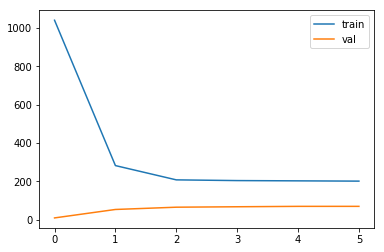

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(14.767112, 32.638626), mean=23.531702, variance=20.086878, skewness=-0.11190596222877502, kurtosis=-1.0317486340121158)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(14.767112, 19.787931), mean=16.346544, variance=3.7487297, skewness=0.8652974963188171, kurtosis=-0.957555934333457)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


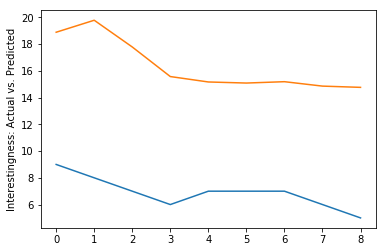

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(14.767112, 32.638626), mean=23.531702, variance=20.086878, skewness=-0.11190596222877502, kurtosis=-1.0317486340121158)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


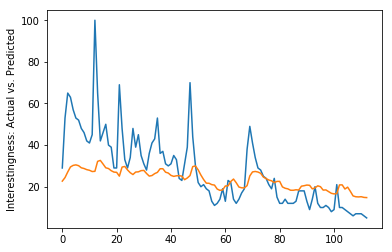

Number of filters: 128
Kernel size: 2
Number of epoches: 2000
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 9.534
TEST: Mean Squared Error: 90.890
TEST: Mean Absolute Error: 9.458
TEST: Median Absolute Error: 9.575
TEST: Explained Variance: -0.193
TEST: R^2: -74.124
Number of filters: 128
Kernel size: 2
Number of epoches: 2000
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 14.960
Training + Validation: Mean Squared Error: 223.813
Training + Validation: Mean Absolute Error: 10.558
Training + Validation: Median Absolute Error: 7.911
Training + Validation: Explained Variance: 0.330
Training + Validation: R^2: 0.266
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   CNN  2010-02                 22.68
2010-03   CNN  2010-03               

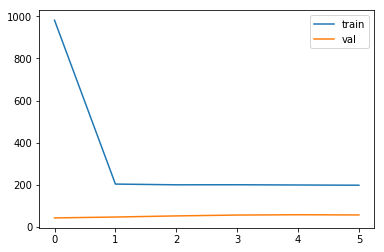

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(13.755135, 31.453726), mean=23.065557, variance=20.736765, skewness=-0.1526627242565155, kurtosis=-1.100953365782038)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(13.755135, 19.868652), mean=15.63148, variance=3.9510732, skewness=1.2353665828704834, kurtosis=0.29193378066131315)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


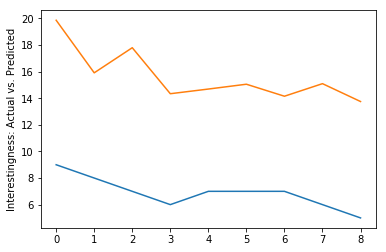

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(13.755135, 31.453726), mean=23.065557, variance=20.736765, skewness=-0.1526627242565155, kurtosis=-1.100953365782038)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


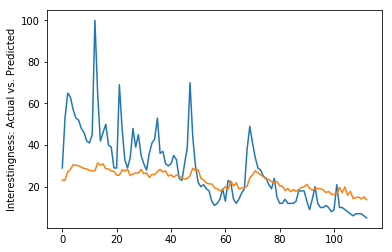

Number of filters: 128
Kernel size: 3
Number of epoches: 500
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 8.830
TEST: Mean Squared Error: 77.970
TEST: Mean Absolute Error: 8.743
TEST: Median Absolute Error: 8.342
TEST: Explained Variance: -0.271
TEST: R^2: -63.445
Number of filters: 128
Kernel size: 3
Number of epoches: 500
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 14.957
Training + Validation: Mean Squared Error: 223.708
Training + Validation: Mean Absolute Error: 10.485
Training + Validation: Median Absolute Error: 7.682
Training + Validation: Explained Variance: 0.345
Training + Validation: R^2: 0.266
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   CNN  2010-02                 23.14
2010-03   CNN  2010-03                 

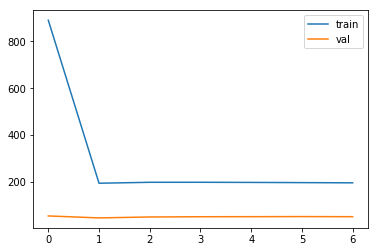

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(13.256272, 30.243273), mean=22.23485, variance=19.378004, skewness=-0.15090684592723846, kurtosis=-1.1112307415334368)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(13.256272, 18.399485), mean=14.966755, variance=2.967007, skewness=1.0621094703674316, kurtosis=-0.24495160715489828)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


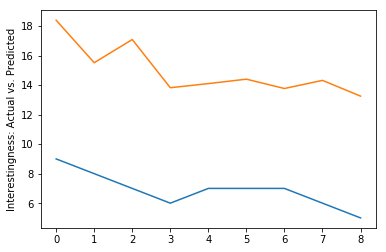

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(13.256272, 30.243273), mean=22.23485, variance=19.378004, skewness=-0.15090684592723846, kurtosis=-1.1112307415334368)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


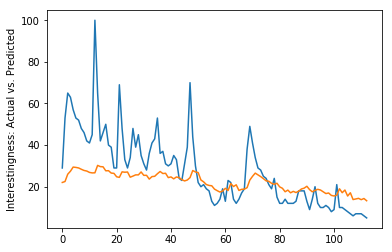

Number of filters: 128
Kernel size: 3
Number of epoches: 1000
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 8.142
TEST: Mean Squared Error: 66.293
TEST: Mean Absolute Error: 8.078
TEST: Median Absolute Error: 7.826
TEST: Explained Variance: 0.139
TEST: R^2: -53.793
Number of filters: 128
Kernel size: 3
Number of epoches: 1000
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 15.335
Training + Validation: Mean Squared Error: 235.174
Training + Validation: Mean Absolute Error: 10.667
Training + Validation: Median Absolute Error: 7.405
Training + Validation: Explained Variance: 0.336
Training + Validation: R^2: 0.228
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   CNN  2010-02                 22.04
2010-03   CNN  2010-03                

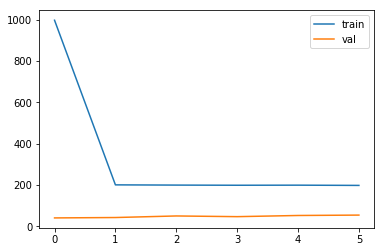

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(13.727014, 30.801056), mean=22.703762, variance=19.8494, skewness=-0.14642034471035004, kurtosis=-1.124011357112017)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(13.727014, 18.782318), mean=15.358719, variance=2.8202245, skewness=1.0605961084365845, kurtosis=-0.17889491548362857)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


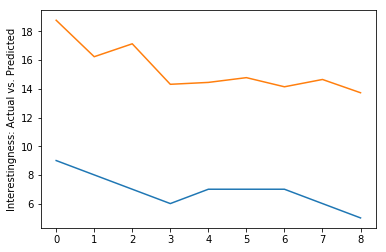

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(13.727014, 30.801056), mean=22.703762, variance=19.8494, skewness=-0.14642034471035004, kurtosis=-1.124011357112017)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


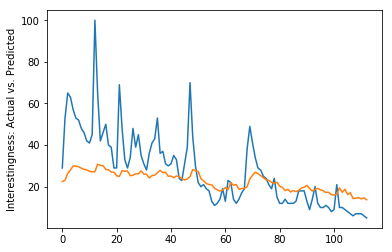

Number of filters: 128
Kernel size: 3
Number of epoches: 2000
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 8.522
TEST: Mean Squared Error: 72.624
TEST: Mean Absolute Error: 8.470
TEST: Median Absolute Error: 8.316
TEST: Explained Variance: 0.268
TEST: R^2: -59.026
Number of filters: 128
Kernel size: 3
Number of epoches: 2000
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 15.130
Training + Validation: Mean Squared Error: 228.926
Training + Validation: Mean Absolute Error: 10.573
Training + Validation: Median Absolute Error: 7.624
Training + Validation: Explained Variance: 0.340
Training + Validation: R^2: 0.249
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   CNN  2010-02                 22.46
2010-03   CNN  2010-03                

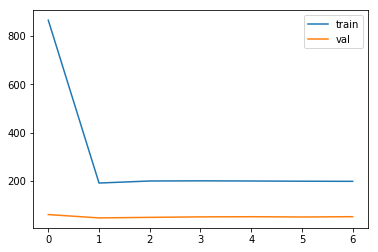

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(13.9272, 31.413061), mean=22.583763, variance=19.32135, skewness=-0.1126532033085823, kurtosis=-1.0304462459285562)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(13.9272, 18.281235), mean=15.39189, variance=2.7571638, skewness=0.8573179244995117, kurtosis=-0.9482021204317039)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


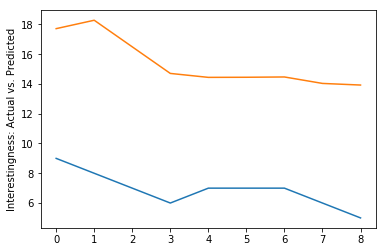

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(13.9272, 31.413061), mean=22.583763, variance=19.32135, skewness=-0.1126532033085823, kurtosis=-1.0304462459285562)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


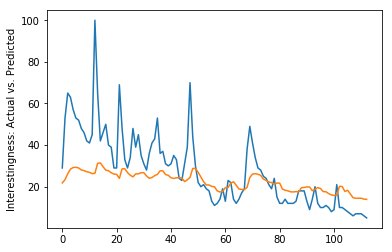

Number of filters: 256
Kernel size: 2
Number of epoches: 500
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 8.555
TEST: Mean Squared Error: 73.182
TEST: Mean Absolute Error: 8.503
TEST: Median Absolute Error: 8.708
TEST: Explained Variance: 0.272
TEST: R^2: -59.487
Number of filters: 256
Kernel size: 2
Number of epoches: 500
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 15.298
Training + Validation: Mean Squared Error: 234.023
Training + Validation: Mean Absolute Error: 10.705
Training + Validation: Median Absolute Error: 7.649
Training + Validation: Explained Variance: 0.327
Training + Validation: R^2: 0.232
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   CNN  2010-02                 21.82
2010-03   CNN  2010-03                 2

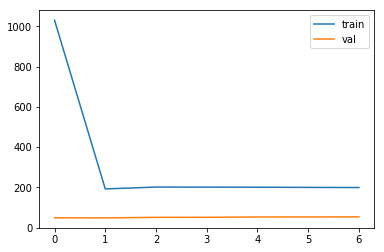

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(13.982471, 31.31633), mean=22.59487, variance=19.043146, skewness=-0.11690077930688858, kurtosis=-1.0366346331758343)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(13.982471, 18.292746), mean=15.458254, variance=2.752697, skewness=0.8138895630836487, kurtosis=-1.0676979257316423)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


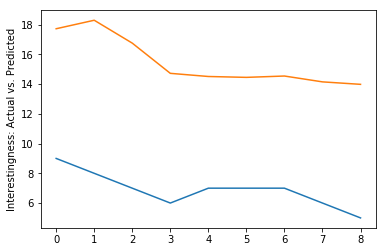

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(13.982471, 31.31633), mean=22.59487, variance=19.043146, skewness=-0.11690077930688858, kurtosis=-1.0366346331758343)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


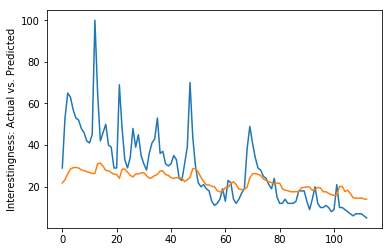

Number of filters: 256
Kernel size: 2
Number of epoches: 1000
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 8.622
TEST: Mean Squared Error: 74.345
TEST: Mean Absolute Error: 8.569
TEST: Median Absolute Error: 8.721
TEST: Explained Variance: 0.247
TEST: R^2: -60.448
Number of filters: 256
Kernel size: 2
Number of epoches: 1000
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 15.321
Training + Validation: Mean Squared Error: 234.718
Training + Validation: Mean Absolute Error: 10.736
Training + Validation: Median Absolute Error: 7.651
Training + Validation: Explained Variance: 0.324
Training + Validation: R^2: 0.230
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   CNN  2010-02                 21.77
2010-03   CNN  2010-03                

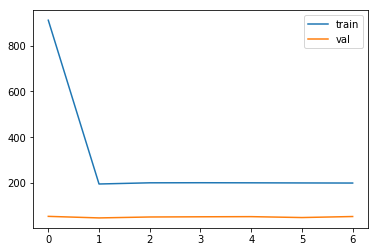

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(13.746364, 30.810534), mean=22.205873, variance=18.398935, skewness=-0.11364645510911942, kurtosis=-1.0383999116194753)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(13.746364, 18.03576), mean=15.216607, variance=2.734173, skewness=0.7731987237930298, kurtosis=-1.1329951704280872)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


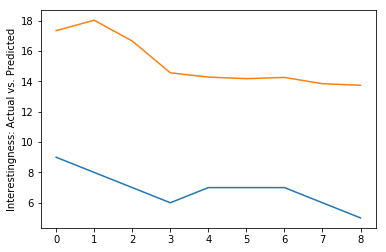

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(13.746364, 30.810534), mean=22.205873, variance=18.398935, skewness=-0.11364645510911942, kurtosis=-1.0383999116194753)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


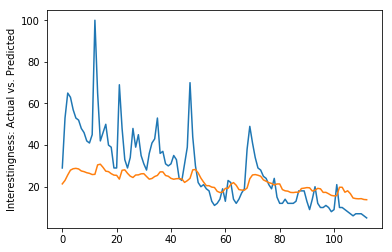

Number of filters: 256
Kernel size: 2
Number of epoches: 2000
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 8.385
TEST: Mean Squared Error: 70.316
TEST: Mean Absolute Error: 8.328
TEST: Median Absolute Error: 8.349
TEST: Explained Variance: 0.202
TEST: R^2: -57.118
Number of filters: 256
Kernel size: 2
Number of epoches: 2000
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 15.506
Training + Validation: Mean Squared Error: 240.436
Training + Validation: Mean Absolute Error: 10.839
Training + Validation: Median Absolute Error: 7.644
Training + Validation: Explained Variance: 0.320
Training + Validation: R^2: 0.211
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   CNN  2010-02                 21.36
2010-03   CNN  2010-03                

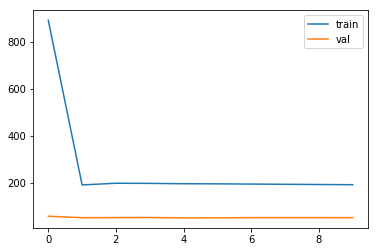

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(13.40317, 31.434963), mean=22.562025, variance=20.592178, skewness=-0.1390720009803772, kurtosis=-1.1049927017093155)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(13.40317, 18.879274), mean=15.096188, variance=3.03653, skewness=1.1922039985656738, kurtosis=0.3897468459798912)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


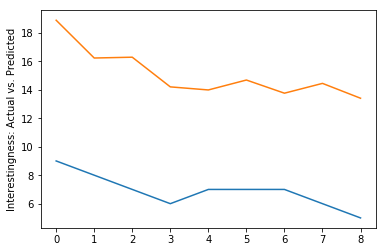

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(13.40317, 31.434963), mean=22.562025, variance=20.592178, skewness=-0.1390720009803772, kurtosis=-1.1049927017093155)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


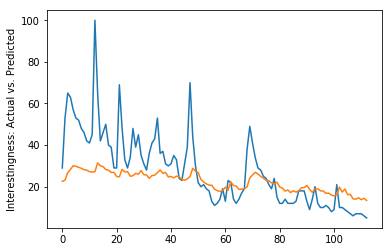

Number of filters: 256
Kernel size: 3
Number of epoches: 500
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 8.261
TEST: Mean Squared Error: 68.240
TEST: Mean Absolute Error: 8.207
TEST: Median Absolute Error: 8.227
TEST: Explained Variance: 0.272
TEST: R^2: -55.403
Number of filters: 256
Kernel size: 3
Number of epoches: 500
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 15.077
Training + Validation: Mean Squared Error: 227.317
Training + Validation: Mean Absolute Error: 10.500
Training + Validation: Median Absolute Error: 7.415
Training + Validation: Explained Variance: 0.350
Training + Validation: R^2: 0.254
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   CNN  2010-02                 22.58
2010-03   CNN  2010-03                 2

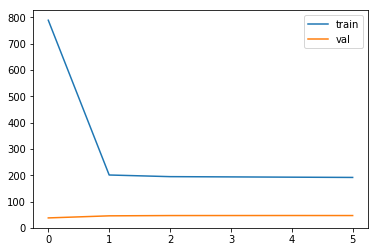

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(13.192438, 30.230286), mean=22.087908, variance=19.165585, skewness=-0.14605778455734253, kurtosis=-1.1120457085688051)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(13.192438, 18.4858), mean=14.9128, variance=3.0918756, skewness=1.0434151887893677, kurtosis=-0.20238087797299675)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


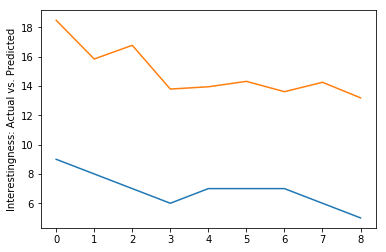

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(13.192438, 30.230286), mean=22.087908, variance=19.165585, skewness=-0.14605778455734253, kurtosis=-1.1120457085688051)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


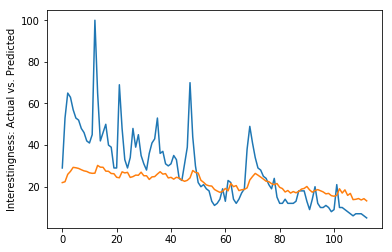

Number of filters: 256
Kernel size: 3
Number of epoches: 1000
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 8.086
TEST: Mean Squared Error: 65.387
TEST: Mean Absolute Error: 8.024
TEST: Median Absolute Error: 7.841
TEST: Explained Variance: 0.171
TEST: R^2: -53.044
Number of filters: 256
Kernel size: 3
Number of epoches: 1000
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 15.393
Training + Validation: Mean Squared Error: 236.957
Training + Validation: Mean Absolute Error: 10.697
Training + Validation: Median Absolute Error: 7.304
Training + Validation: Explained Variance: 0.336
Training + Validation: R^2: 0.222
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   CNN  2010-02                 21.98
2010-03   CNN  2010-03                

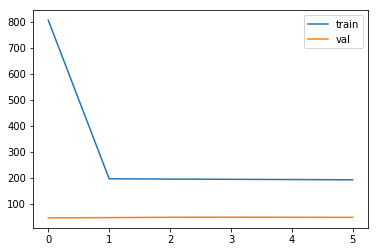

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(13.273177, 30.320292), mean=22.105843, variance=19.162876, skewness=-0.14230144023895264, kurtosis=-1.113859525437659)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)
N size: y_pred_test  9
DescribeResult(nobs=9, minmax=(13.273177, 18.317427), mean=14.895649, variance=2.7823482, skewness=1.0426859855651855, kurtosis=-0.1734636189607346)
N size: y_actual_test  9
DescribeResult(nobs=9, minmax=(5.0, 9.0), mean=6.888888888888889, variance=1.3611111111111112, skewness=0.22058433115731832, kurtosis=-0.31549354435651855)


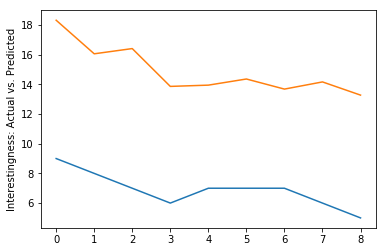

N size: y_pred_df  113
DescribeResult(nobs=113, minmax=(13.273177, 30.320292), mean=22.105843, variance=19.162876, skewness=-0.14230144023895264, kurtosis=-1.113859525437659)
N size: y_actual_df  113
DescribeResult(nobs=113, minmax=(5.0, 100.0), mean=27.964601769911503, variance=307.4808786346397, skewness=1.0390100813621799, kurtosis=1.3829022157788664)


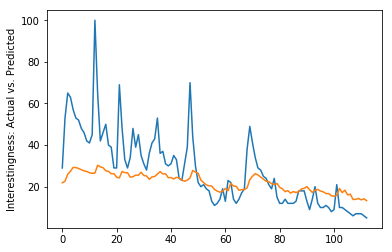

Number of filters: 256
Kernel size: 3
Number of epoches: 2000
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
TEST: Root Mean Squared Error: 8.056
TEST: Mean Squared Error: 64.898
TEST: Mean Absolute Error: 8.007
TEST: Median Absolute Error: 8.057
TEST: Explained Variance: 0.347
TEST: R^2: -52.640
Number of filters: 256
Kernel size: 3
Number of epoches: 2000
L1L2 regularization: L1: 0.01, L2: 0.01
Patience: Number of epochs before early stop: 5
Training + Validation: Root Mean Squared Error: 15.377
Training + Validation: Mean Squared Error: 236.449
Training + Validation: Mean Absolute Error: 10.687
Training + Validation: Median Absolute Error: 7.302
Training + Validation: Explained Variance: 0.337
Training + Validation: R^2: 0.224
Training + Validation: df_pred_df N size: 113
        MODEL     DATE  Pred_Interestingness
DATE                                        
2010-02   CNN  2010-02                 21.89
2010-03   CNN  2010-03                

In [0]:
# 0. import libs
from pandas import DataFrame
import numpy as np
from numpy import array
from scipy import stats
from sklearn.metrics import explained_variance_score,r2_score,mean_squared_error,mean_absolute_error,median_absolute_error 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import L1L2  # tf.keras.regularizers.L1L2
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
from matplotlib import pyplot

# 1. funcs

# a. train, val, test split func

def timeseries_train_val_test_split(df,dcol,pcol,cols,train_end,val_end):
  "Use to create static train, val and test samples for timeseries."
  # select one stock ticker
  # df1 = df.loc[df[fcol]==fval].set_index(dcol)
  # select inputs & output
  inoutcols = cols  # ['LOGPRICE','FIRST DERIVATIVE','SECOND DERIVATIVE','THIRD DERIVATIVE','FOURTH DERIVATIVE']
  # select train, validation and test data
  df, df_train, df_val, df_test = df[inoutcols], df[:train_end] [inoutcols], df[train_end:val_end] [inoutcols], df[val_end:] [inoutcols]
  print('N size: df_train, df_val, df_test = ',len(df_train),len(df_val), len(df_test))
  print('df_test descriptives')
  print(df_test.describe().T)
  # plot train, val and test data
  plt.plot(df_train[pcol])
  plt.plot(df_val[pcol]) 
  plt.plot(df_test[pcol])
  plt.ylabel(pcol)
  plt.show()
  return df, df_train, df_val, df_test


# b. multivariate multi-step data preparation func

def df2samples(df,train_df,val_df,test_df,n_steps_in=3,n_steps_out=2):
  '''Transform stacked multivariate timeseries DataFrame to X, y arrays of sequence samples. 
  Assumes response-level dataset where each row is indexed by an id-date. 

  ***IMPORTANT: assumes the LAST column is the OUTPUT and preceeding columns are 
  FEATURES used to predict the output (e.g. ['X1','X2','X3','X4','y']).'''
  
  # a. convert dfs to np arrays
  df_ar = df.to_numpy()
  print('df_ar')
  print(stats.describe(df_ar))
  train_ar = train_df.to_numpy()
  val_ar = val_df.to_numpy() 
  test_ar = test_df.to_numpy()
  print('test_ar')
  print(stats.describe(test_ar))
  
  '''print('train array dimensions')
  print(train_ar.shape)
  print('validation array dimensions')
  print(val_ar.shape)
  print('test array dimensions')
  print(test_ar.shape)'''
  
  # b. split a multivariate array into sequence samples
  def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
      # find the end of this pattern
      end_ix = i + n_steps_in
      out_end_ix = end_ix + n_steps_out-1
      # check if we are beyond the dataset
      if out_end_ix > len(sequences):
        break
      # gather input and output parts of the pattern
      seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
      X.append(seq_x)
      y.append(seq_y)
    print('X')
    print(stats.describe(X))
    print('y')
    print(stats.describe(y))
    return array(X), array(y)
  # c. create df, train, val, test samples
  X_df, y_df = split_sequences(df_ar, n_steps_in, n_steps_out)
  X_train, y_train = split_sequences(train_ar, n_steps_in, n_steps_out)
  X_val, y_val = split_sequences(val_ar, n_steps_in, n_steps_out)
  X_test, y_test = split_sequences(test_ar, n_steps_in, n_steps_out)
  return X_df, y_df, X_train, y_train, X_val, y_val, X_test, y_test


# c. multivariate multi-step cnn

# model definition, fit, eval, predict
def model_def_fit_eval(X_df,y_df,X_train,y_train,X_val,y_val,X_test,y_test,wts_fpath,n_filters=64,ksize=2,n_epochs=2000,n_patience=2,reg=L1L2(l1=0.0, l2=0.0)):  
  '''Define and Fit Model + Tune Hyper Parameters: n_filters, ksize, n_epochs, n_patience'''

  # model define - CNN (NO dropout referenced in tf 2.0 API for Conv1D - removed)
  model = tf.keras.Sequential()
  model.add(layers.Conv1D(filters=n_filters, kernel_size=ksize, activation='relu', padding='same', input_shape=(nsteps_input, nfeatures),kernel_regularizer=reg))
  model.add(layers.MaxPooling1D(pool_size=2))
  model.add(layers.Flatten())
  model.add(layers.Dense(50, activation='relu'))
  model.add(layers.Dense(nsteps_output))

  # model compile
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
  
  # early stopping
  early_stop = EarlyStopping(monitor='val_loss', patience=n_patience, verbose=1)
  # checkpoint
  # filepath="weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
  filepath= wts_fpath
  checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
  callbacks_list = [early_stop, checkpoint]
  
  # model fit
  history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=n_epochs,batch_size=1,verbose=1,callbacks=callbacks_list,shuffle=False)
  
  # model evaluate
  _, train_mse = model.evaluate(X_train, y_train, verbose=0)
  _, val_mse = model.evaluate(X_val, y_val, verbose=0)
  print(f'Train: {train_mse:.6f}, Validation: {val_mse:.6f}')
  
  # plot accuracy of model learning
  pyplot.plot(history.history['mean_squared_error'], label='train')
  pyplot.plot(history.history['val_mean_squared_error'], label='val')
  pyplot.legend()
  pyplot.show()
  
  # model predict df
  yhat_df = model.predict(X_df, verbose=0)
  # print('yhat_train: ', yhat_train)
  # predicted: select last step of predicted multistep output
  y_pred_df = np.asarray([x[-1] for x in yhat_df])
  print('N size: y_pred_df ', len(y_pred_df))
  print(stats.describe(y_pred_df))
  # actual: select last step of actual multistep output
  y_actual_df = np.asarray([x[-1] for x in y_df])
  print('N size: y_actual_df ', len(y_actual_df))
  print(stats.describe(y_actual_df))
  
  # model predict test (12 - 3 lags = 9 months)
  yhat_test = model.predict(X_test, verbose=0)
  # print('yhat_test: ', yhat_test)
  # predicted: select last step of predicted multistep output
  y_pred_test = np.asarray([x[-1] for x in yhat_test])
  # print('y_pred_test: ', y_pred_test)
  print('N size: y_pred_test ', len(y_pred_test))
  print(stats.describe(y_pred_test))
  # actual: select last step of actual multistep output
  y_actual_test = np.asarray([x[-1] for x in y_test])
  # print('y_actual_test: ', y_actual_test)
  print('N size: y_actual_test ', len(y_actual_test))
  print(stats.describe(y_actual_test))
  
  # plot actual & predicted y on test
  plt.plot(y_actual_test)
  plt.plot(y_pred_test)
  plt.ylabel('Interestingness: Actual vs. Predicted')
  plt.show()  
  
  # model predict df
  yhat_df = model.predict(X_df, verbose=0)
  # print('yhat_train: ', yhat_train)
  # predicted: select last step of predicted multistep output
  y_pred_df = np.asarray([x[-1] for x in yhat_df])
  print('N size: y_pred_df ', len(y_pred_df))
  print(stats.describe(y_pred_df))
  # actual: select last step of actual multistep output
  y_actual_df = np.asarray([x[-1] for x in y_df])
  print('N size: y_actual_df ', len(y_actual_df))
  print(stats.describe(y_actual_df))
  
  # plot actual & predicted y on df
  plt.plot(y_actual_df)
  plt.plot(y_pred_df)
  plt.ylabel('Interestingness: Actual vs. Predicted')
  plt.show()
  
  # e. model performance metrics

  # print hyper parameter values
  print(f'Number of filters: {n_filters}')
  print(f'Kernel size: {ksize}')
  print(f'Number of epoches: {n_epochs}')
  print(f'L1L2 regularization: L1: {_l1}, L2: {_l2}')
  print(f'Patience: Number of epochs before early stop: {n_patience}')
  
  # test
  "Use weights from best model to predict test sample."
  # import error metrics from sklearn
  from sklearn.metrics import explained_variance_score,r2_score,mean_squared_error,mean_absolute_error,median_absolute_error
  # compute root mean squared error of predictions
  rmse = np.sqrt(np.mean(np.square((y_actual_test - y_pred_test)),axis=0))
  print(f'TEST: Root Mean Squared Error: {rmse:.3f}')
  # compute mean squared error
  mae = mean_squared_error(y_actual_test, y_pred_test)
  print(f'TEST: Mean Squared Error: {mae:.3f}')
  # compute mean absolute error
  mae = mean_absolute_error(y_actual_test, y_pred_test)
  print(f'TEST: Mean Absolute Error: {mae:.3f}')
  # compute median absolute error
  mdae = median_absolute_error(y_actual_test, y_pred_test)
  print(f'TEST: Median Absolute Error: {mdae:.3f}')
  # compute explained_variance_score
  evar = explained_variance_score(y_actual_test, y_pred_test)
  print(f'TEST: Explained Variance: {evar:.3f}')
  # compute R2
  r2 = r2_score(y_actual_test, y_pred_test)
  print(f'TEST: R^2: {r2:.3f}')
  
  # print hyper parameter values
  print(f'Number of filters: {n_filters}')
  print(f'Kernel size: {ksize}')
  print(f'Number of epoches: {n_epochs}')
  print(f'L1L2 regularization: L1: {_l1}, L2: {_l2}')
  print(f'Patience: Number of epochs before early stop: {n_patience}')

  # df
  "Use weights from best model to predict test sample."
  # import error metrics from sklearn
  from sklearn.metrics import explained_variance_score,r2_score,mean_squared_error,mean_absolute_error,median_absolute_error
  # compute root mean squared error of predictions
  rmse = np.sqrt(np.mean(np.square((y_actual_df - y_pred_df)),axis=0))
  print(f'Training + Validation: Root Mean Squared Error: {rmse:.3f}')
  # compute mean squared error
  mae = mean_squared_error(y_actual_df, y_pred_df)
  print(f'Training + Validation: Mean Squared Error: {mae:.3f}')
  # compute mean absolute error
  mae = mean_absolute_error(y_actual_df, y_pred_df)
  print(f'Training + Validation: Mean Absolute Error: {mae:.3f}')
  # compute median absolute error
  mdae = median_absolute_error(y_actual_df, y_pred_df)
  print(f'Training + Validation: Median Absolute Error: {mdae:.3f}')
  # compute explained_variance_score
  evar = explained_variance_score(y_actual_df, y_pred_df)
  print(f'Training + Validation: Explained Variance: {evar:.3f}')
  # compute R2
  r2 = r2_score(y_actual_df, y_pred_df)
  print(f'Training + Validation: R^2: {r2:.3f}')
  
  # export results to csv
  
  # dfs - Tom needs predictions on all 12 mths of the test data for analysis
  # df_actual_train = pd.DataFrame(y_actual_train)
  df_pred_df = pd.DataFrame(y_pred_df)
  # labels
  df_date_df = pd.DataFrame(df.index[-113:])
  # df_ticker_train = pd.DataFrame([ticker]*172) 
  df_model_type_df = pd.DataFrame([model_type]*113)
  # df_sample_type_df = pd.DataFrame(['all']*113)
  # concatenate y actual pred arrays
  df_pred_df = pd.concat((df_model_type_df,df_date_df,df_pred_df), axis=1)
  # update column names
  df_pred_df.columns = ['MODEL','DATE','Pred_Interestingness']
  # Set index
  df_pred_df.set_index('DATE', inplace=True, drop=False)
  # check pred data
  print(f'Training + Validation: df_pred_df N size: {len(df_pred_df)}')
  print(df_pred_df.head())
  print(df_pred_df.tail())
  print(df_pred_df.describe().T)
  
  # test sample last 12 mnths for Tom analysis
  df_pred_test_12mth = df_pred_df['2018-07': '2019-06']
  print(f'TEST 12 months: df_pred_test_12mth N size: {len(df_pred_test_12mth)}')
  print(df_pred_test_12mth.head())
  print(df_pred_test_12mth.tail())
  print(df_pred_test_12mth.describe().T)
  
  # train sample for Tom analysis
  df_pred_train_val = df_pred_df[: '2018-06']
  print(f'Train + Validation samples: df_pred_train_val N size: {len(df_pred_train_val)}')
  print(df_pred_train_val.head())
  print(df_pred_train_val.tail())
  print(df_pred_train_val.describe().T)

  # create file name for csv
  fname_train_val = 'interestingness_train_val_' +  model_type + '.csv'
  fname_test = 'interestingness_test_12mths_' +  model_type + '.csv'
  
  # write df to csv
  df_pred_train_val.to_csv(fname_train_val)
  df_pred_test_12mth.to_csv(fname_test)
  
  return df_pred_train_val,df_pred_test_12mth,fname_train_val,fname_test


# 2. set parameters 
df = iscore
# fcol = 'TICKER'
# fval = 'EBAY' - replace with t in loop
dcol  = 'DATE'
pcol = 'DEPENDENT VARIABLE'
cols = ['FIRST','SECOND','THIRD','FOURTH','DEPENDENT VARIABLE']
train_end = 96
val_end = 104

# set model_type for output file
model_type = 'CNN'

# number INPUT STEPS
nsteps_input = 3
print(f'Number of input time steps: {nsteps_input}')
# number OUTPUT STEPS
nsteps_output = 2
print(f'Number of output time steps: {nsteps_output}')
# number FEATURES
nfeatures = 4
print(f'Number Model of Features: {nfeatures}')

# 3. run program
if __name__ == '__main__':
  """Create train, validation and test dfs."""
  # i. create train, val, test dfs
  df,train_df,val_df,test_df = timeseries_train_val_test_split(df,dcol,pcol,cols,train_end,val_end)
  print(f'Training + Validation df N size: {len(df)}')
  print(f'train_df N size: {len(train_df)}')
  print(f'val_df N size: {len(val_df)}')
  print(f'test_df N size: {len(test_df)}')

  """Create and summarize samples."""
  # ii. train, val, test dfs to samples
  # df2samples(df,train_df,val_df,test_df,n_steps_in=3,n_steps_out=2)
  X_df,y_df,X_train,y_train,X_val,y_val,X_test,y_test = df2samples(df,train_df,val_df,test_df,nsteps_input,nsteps_output)
  # summarize df SAMPLES
  print(f'Shape of input/output samples: X_train {X_df.shape}, y_train {y_df.shape}')
  # summarize TRAIN SAMPLES
  print(f'Shape of input/output samples: X_train {X_train.shape}, y_train {y_train.shape}')
  # summarize VAL SAMPLES
  print(f'Shape of input/output samples: X_val {X_val.shape}, y_val {y_val.shape}')
  # summarize TEST SAMPLES
  print(f'Shape of input/output samples: X_test {X_test.shape}, y_test {y_test.shape}') 

  # iii. file path for weights
  wts_fpath = "weights.best_cnn.hdf5"

  # iv. hyper parameter combos
  filters_f = [64, 128, 256]
  ksize_k = [2, 3]
  epochs_e = [500, 1000, 2000]  # [200,400]
  patience_p = 5  # [3,4,5]
  # dropout_d = [0.0, 0.05, 0.15, 0.25, 0.35, 0.5] - NOT referenced in tf 2.0 Conv1D layer
  _l1, _l2 = 0.01, 0.01  # elasticnet setting is 0.01, 0.01
  reg_r = L1L2(l1=_l1, l2=_l2)
  # TRY L1L2(l1=0.1, l2=0.01)
  # reg_r = [L1L2(l1=0.0, l2=0.0), L1L2(l1=0.01, l2=0.0), L1L2(l1=0.0, l2=0.01), L1L2(l1=0.01, l2=0.01)]  # error when l2=0.0

  # v. run model - use list comp for list of floats
  # use tuple for multiple actions in list comp. e.g. [(print("bla1"), print("bla2")) for i in list]
  # model_def_fit_eval(X_df,y_df,X_train,y_train,X_val,y_val,X_test,y_test,wts_fpath,n_filters=64,ksize=2,n_epochs=2000,n_patience=2,reg=L1L2(l1=0.0, l2=0.0))
  [(print(f'filters: {f}, kernel size: {k}, epochs: {e}, patience: {patience_p}, l1: {_l1}, l2: {_l2}'), model_def_fit_eval(X_df,y_df,X_train,y_train,X_val,y_val,X_test,y_test,wts_fpath,n_filters=f,ksize=k,n_epochs=e,n_patience=patience_p,reg=reg_r)) for f in filters_f for k in ksize_k for e in epochs_e]                             
      
